# Bolivia: Macroeconomía, Pobreza y Educación según Datos del Banco Mundial y en INE

API: https://data360.worldbank.org/en/api?indicatorid=WB_MPM_EDU_ENROLL&datasetid=WB_MPM#/Search/post_data360_searchv2

Los datos para este análisis provienen principalmente de la API Data360 y la API Principal del Banco Mundial y el último Censo del INE. Se seleccionaron indicadores clave relacionados con la pobreza monetaria, multidimensional, nacional, infantil y variables macroeconómicas relevantes para Bolivia y un grupo de países latinoamericanos.

# ASK

**Objetivo**: Analizar la evolución de la pobreza en Bolivia, examinando sus dimensiones monetaria y multidimensional, con un enfoque particular en la relación entre la pobreza y la educación infantil.
¿Cómo ha evolucionado la pobreza en Bolivia a lo largo de los años?

**Preguntas Clave**:
¿Cómo ha evolucionado la pobreza en Bolivia, tanto en sus medidas monetarias como en la línea de pobreza nacional?

¿Cómo se manifiesta la pobreza multidimensional en Bolivia, especialmente en el acceso a la educación y el saneamiento?

¿Cuál es la relación entre la pobreza monetaria y los indicadores de privación educativa en los niños?

¿Cómo los indicadores macroeconómicos (como el PIB per cápita, desempleo, o inflación) podrían estar relacionados con los niveles de pobreza?

¿Cómo se compara la situación de pobreza de Bolivia con la de otros países de la región?

    Preguntas de investigación específicas:
    "¿La reducción de pobreza 2001-2024 se debe más a crecimiento económico o políticas sociales?",
    "¿Qué componente de NBI es más difícil de reducir y por qué?",
    "¿Cómo afecta la alta inflación 2025 a los logros de reducción de pobreza?",
    "¿Bolivia está convergiendo o divergiendo del promedio latinoamericano?",
    "¿Qué variables predicen mejor la reducción de pobreza multidimensional?",
    "¿Existe trade-off entre reducción de pobreza monetaria y multidimensional?",
    "¿Cómo impacta la urbanización en los diferentes tipos de pobreza?"

---
Bolivia no solo atravieza una crisis económica sino el cambio gubernamental más importante del siglo, después de dos décadas de masismo y un modelo económico, social y productivo ligado al extractivismo, la informalidad y medidas de corto plazo, sin una visión de país. En el presente documento pretendo analizar la multiplicidad de indicadores de pobreza y educación del país, con vistas a un periodo cargado de incertidumbre para el sector más vulnerable, pero también con esperanza de cambio estructural.

# PREPARE

Paso 1: Entender la estructura de Data360 API y Datos del INE.

La API tiene diferentes endpoints:

*  POST /data360/searchv2 - Para buscar indicadores
*  GET /data360/data - Para obtener datos
*  POST /data360/metadata - Para metadatos

Censo nacional de Población y Vivienda 2012 y 2014:
*  https://cpv2024.ine.gob.bo/index.php/principal/descargas/

Paso 2: Buscar indicadores significativos para el análisis
---

In [1]:
import requests
import pandas as pd
import json
from datetime import datetime

# Configuración inicial
BASE_URL = "https://data360api.worldbank.org"

def buscar_indicadores_pobreza():
    """Busca indicadores de pobreza usando Data360 API"""

    search_url = f"{BASE_URL}/data360/searchv2"

    # Parámetros de búsqueda para pobreza en Bolivia
    payload = {
        "count": True,
        "select": "series_description/idno, series_description/name, series_description/database_id, series_description/topics",
        "search": "poverty Bolivia",
        "top": 100,
        "filter": "type eq 'indicator'"
    }

    try:
        print("🔍 Buscando indicadores de pobreza...")
        response = requests.post(search_url, json=payload, timeout=30)
        response.raise_for_status()

        data = response.json()

        if 'value' in data and data['value']:
            print(f"✅ Encontrados {len(data['value'])} indicadores")

            # Procesar resultados
            indicadores = []
            for item in data['value']:
                series_desc = item.get('series_description', {})
                indicadores.append({
                    'idno': series_desc.get('idno'),
                    'nombre': series_desc.get('name'),
                    'database_id': series_desc.get('database_id'),
                    'topics': [topic.get('name') for topic in series_desc.get('topics', [])] if series_desc.get('topics') else []
                })

            df = pd.DataFrame(indicadores)
            return df
        else:
            print("❌ No se encontraron indicadores")
            return pd.DataFrame()

    except Exception as e:
        print(f"❌ Error en la búsqueda: {e}")
        return pd.DataFrame()

# Ejecutar búsqueda
df_indicadores = buscar_indicadores_pobreza()

if not df_indicadores.empty:
    print("\n📋 INDICADORES ENCONTRADOS:")
    print(df_indicadores[['idno', 'nombre', 'database_id']].to_string())
else:
    print("No se encontraron indicadores")

🔍 Buscando indicadores de pobreza...
✅ Encontrados 100 indicadores

📋 INDICADORES ENCONTRADOS:
                              idno                                                                                                                                    nombre database_id
0               WB_WDI_SI_POV_MPWB                                                                   Multidimensional poverty headcount ratio (World Bank) (% of population)      WB_WDI
1               WB_WDI_SI_POV_NAHC                                                                       Poverty headcount ratio at national poverty lines (% of population)      WB_WDI
2               WB_WDI_SI_POV_GAPS                                                                                                 Poverty gap at $3.00 a day (2021 PPP) (%)      WB_WDI
3            WB_WDI_SI_POV_LMIC_GP                                                                                                 Poverty gap at $4.20 a day (2021 P

## Análisis de los resultados y clasificación de Indicadores

*  Todas medidas en relación al valor adquisitivo internacional del 2017
*   Existen 3 categorías:

1.   Pobreza extrema global: < $2.15 al día. (Tasa de pobreza internacional más severa)

2.   Pobreza moderada: < $3.65 (países de ingreso bajo-medio.)

3.   Pobreza media: < $6.85 (países de ingreso alto-medio)


---


INDICADORES HISTÓRICOS MACROECONÓMICOS, POBREZA Y EDUCACIÓN SEGÚN EL BANCO MUNDIAL

📈 A) Pobreza Monetaria:

Se define por el ingreso o el consumo de las personas. La medición se basa en si el ingreso de un individuo o un hogar está por debajo de un umbral monetario conocido como la "línea de pobreza". Esta es la forma más común de medir la pobreza a nivel global. El Banco Mundial utiliza líneas de pobreza internacionales ajustadas por Paridad de Poder Adquisitivo (PPA) para permitir comparaciones entre países. Por ejemplo, $2.15 (2017 PPP) al día es el umbral de pobreza extrema global.



*   WB_PIP_HEADCOUNT_IPL: Poverty headcount ratio (2017 PPP, $2.15) (% of population)

*   WB_PIP_HEADCOUNT_LMIC: Poverty headcount ratio (2017 PPP, $3.65) (% of population)

*   WB_PIP_HEADCOUNT_UMIC: Poverty headcount ratio (2017 PPP, $6.85) (% of population)

Existen otras versiones de estos tres primeros indicadores, vamos a usar estos porque generalmente los PIP son más refinados, ajustados, actualizados y comunes.

🎓 B) Pobreza Multidimensional:

Este enfoque va más allá del ingreso y considera las privaciones en múltiples dimensiones de bienestar, como *la salud, la educación y el nivel de vida.* Reconoce que la pobreza no es solo la falta de dinero, sino también la falta de acceso a servicios básicos (agua potable, saneamiento), a la educación, etc. Un individuo se considera multidimensionalmente pobre si experimenta privaciones en un cierto número de estas dimensiones.

1. Headcount ratio WB_MPM_HEADCOUNT

Es el indicador principal de pobreza multidimensional. Representa el porcentaje de la población que experimenta privaciones en al menos un tercio de las dimensiones analizadas (educación, nivel de vida, etc.). Este es el indicador clave de este grupo. Sus componentes son:

2. Educational enrollment deprived WB_MPM_EDU_ENROLL

3. Educational attainment deprived WB_MPM_EDU_ATT

4. Electricity deprived WB_MPM_ELEC

5. Drinking water deprived WB_MPM_WATER

6. Sanitation deprived WB_MPM_SANT

7. Monetary poverty deprived WB_MPM_MONETARY

📍 C) Pobreza Nacional:

A diferencia de las líneas de pobreza internacionales, esta medición utiliza una línea de pobreza definida por cada país. Refleja las condiciones socioeconómicas específicas del país y sus estándares de vida. A menudo se usa para la planificación de políticas nacionales y monitorear el progreso interno, pero no es adecuada para comparar la pobreza entre países.
*  WB_WDI_SI_POV_NAHC: Poverty headcount ratio at national poverty lines

Para comparativa internacional se usa:
*  SI.POV.DDAY: Poverty headcount ratio at sus3.00 a day (2021 PPP) (% of population)
¿Por qué? Es el indicador internacional clásico más difundido, ajustado por paridad de poder adquisitivo PPP, nos ayudará para comparaciones en Latam.

🌍 D) Desarrollo Urbano y Rural

*  SP.URB.TOTL.IN.ZS (población urbana como % del total)
*  SP.RUR.TOTL.IN.ZS (población rural como % del total)

💹 E) Variables Macroeconómicas
*    'NY.GDP.PCAP.PP.KD': 'PIB per cápita (PPA)',
*    'SL.UEM.TOTL.ZS': 'Tasa Desempleo',
*    'SP.POP.TOTL': 'Población Total',
*   'FP.CPI.TOTL.ZG': 'Inflación anual (%)',
*   'NY.GDP.MKTP.KD.ZG': 'Crecimiento PIB anual (%)',
*   'GC.XPN.TOTL.GD.ZS': 'Gasto público (% PIB)',
*    'NE.EXP.GNFS.ZS': 'Exportaciones (% PIB)',
*    'SL.TLF.CACT.FE.ZS': 'Participación laboral femenina',
*    'SE.XPD.TOTL.GD.ZS': 'Gasto en educación (% PIB)',
*    'SH.XPD.CHEX.GD.ZS': 'Gasto en salud (% PIB)'
¿Por qué usar (% PIB)?

Comparabilidad internacional: Permite comparar países de diferente tamaño

Sostenibilidad: Muestra el esfuerzo relativo del país

Efectividad: 5% del PIB en educación en Bolivia ≠ 5% en USA

PD: Aucencia de datos sobre pobreza de aprendizaje en Bolivia (WB_LPGD_SE_LPV_PRIM y SE.PRM.UNER)


---
INDICADORES DE POBREZA Y EDUCACIÓN SEGÚN CENSOS 2001, 2012 Y 2024 INE:

👥 F) Necesidades Básicas Insatisfechas (BNI)
*  Población por condición de NBI (número) - 2012 y 2024
*  Población por condición de NBI (porcentaje) - 2012 y 2024
*  Población por componente de NBI (2012)
*  Población por componente de NBI (2024)

🎓 G) Indicadores de Educación Pobreza Infantil
*  Tasa de alfabetismo por área (2001, 2012, 2024)
*  Tasa de alfabetismo por grupo de edad (2001, 2012, 2024)
*  Tasa de asistencia por área y grupo de edad (2001, 2012, 2024)
*  Nivel de instrucción alcanzado (2001, 2012, 2024)
*  Años promedio de estudio por área (2001, 2012, 2024)
*  Años promedio de estudio por grupo de edad (2001, 2012, 2024)
---

Consideraciones de Datos

* Es importante notar que la disponibilidad de datos varía entre indicadores y países. Por ejemplo, los datos de Pobreza Multidimensional para la comparativa regional solo están disponibles para ciertos países en el año 2022, mientras que los datos de PIB per cápita cubren un rango de años más amplio."

* Cabe destacar que la 'Pobreza Línea Nacional' se basa en umbrales definidos por cada país según sus propias condiciones socioeconómicas. Por lo tanto, este indicador no es directamente comparable entre países, a diferencia de las líneas de pobreza internacionales definidas por el Banco Mundial (sus2.15, sus2.15, sus 3.65, sus6.85).

* La cobertura de datos históricos varía significativamente en el caso de Venezuela.

*  Actualizaciones metodológicas del BM: sus 2.15/día (PPP 2017) sigue siendo la línea oficial de pobreza extrema global, sus 3.00/día (PPP 2021) es una línea más reciente y específica para países como Bolivia. Ambas refieren lo mismo.

*  Nota sobre el PIB per cápita de Bolivia (2021):

Es importante diferenciar entre:

*   **PIB per cápita (USD actuales):** Aprox. **$3,644** (Medida nominal, útil para comparar el tamaño económico directo).

*   **PIB per cápita (PPA - Paridad del Poder Adquisitivo):** Aprox. **$9,682** (Ajustado por costo de vida, refleja mejor el poder de compra y nivel de vida).

Usamos el PIB per cápita (PPA) en nuestros análisis y gráficos porque es una medida más adecuada para comparar el bienestar económico y relacionarlo con la pobreza, ya que considera cuánto pueden comprar realmente las personas con su ingreso en Bolivia.

# Process

**Plan de procesamiento**

Paso 3: Obtención de datos necesarios


Paso 4: Crear DataFrames

* df_bolivia_detailed - Análisis completo de Bolivia
* df_latam_comparison - Comparativa regional para visualizar en Tableau
* df_consolidated_analysis - Todos los datos consolidados (por si necesitamos cruzar variables)

Los datos ya están limpios - El BM provee datos oficiales ya validados

No necesitamos imputar NAs - Para análisis comparativo es mejor mantener los huecos

Las variables ya están normalizadas - Todos los indicadores están en porcentajes o unidades estandarizadas

Los nombres ya son claros - Tenemos nombres descriptivos en español

## Paso 3: Obtención de datos necesarios API Banco Mundial

In [2]:
### 3.1 Definición de Indicadores y Configuración
import pandas as pd
import numpy as np
import requests
from datetime import datetime

# Configuración de APIs
BASE_URL = "https://data360api.worldbank.org"  # Data360 API
WB_API_URL = "http://api.worldbank.org/v2"     # API Principal Banco Mundial

# DEFINICIÓN COMPLETA DE INDICADORES
indicadores_completos = {
    # POBREZA MONETARIA (BOLIVIA) - Data360
    'WB_PIP_HEADCOUNT_IPL': 'Pobreza Extrema ($2.15/día)',
    'WB_PIP_HEADCOUNT_LMIC': 'Pobreza Moderada ($3.65/día)',
    'WB_PIP_HEADCOUNT_UMIC': 'Pobreza ($6.85/día)',

    # POBREZA MULTIDIMENSIONAL (BOLIVIA) - Data360
    'SI.POV.MPWB': 'Pobreza Multidimensional',     # Código API principal
    'WB_MPM_EDU_ENROLL': 'Privación Educación - Matrícula',
    'WB_MPM_EDU_ATT': 'Privación Educación - Logro',
    'WB_MPM_ELEC': 'Privación Electricidad',
    'WB_MPM_WATER': 'Privación Agua Potable',
    'WB_MPM_SANT': 'Privación Saneamiento',
    'WB_MPM_MONETARY': 'Privación Pobreza Monetaria',

    # POBREZA NACIONAL (BOLIVIA) - Data360
    'WB_WDI_SI_POV_NAHC': 'Pobreza Línea Nacional',

    # MACROECONÓMICOS BÁSICOS (PAÍSES) - API Principal
    'NY.GDP.PCAP.PP.KD': 'PIB per cápita (PPA)',
    'SL.UEM.TOTL.ZS': 'Tasa Desempleo',
    'SP.POP.TOTL': 'Población Total',

    # NUEVAS VARIABLES MACROECONÓMICAS (% PIB) - API Principal
    'FP.CPI.TOTL.ZG': 'Inflación anual (%)',
    'NY.GDP.MKTP.KD.ZG': 'Crecimiento PIB anual (%)',
    'GC.XPN.TOTL.GD.ZS': 'Gasto público (% PIB)',
    'NE.EXP.GNFS.ZS': 'Exportaciones (% PIB)',
    'SE.XPD.TOTL.GD.ZS': 'Gasto en educación (% PIB)',
    'SH.XPD.CHEX.GD.ZS': 'Gasto en salud (% PIB)',

}

# MAPEO DE DATASETS (¿Dónde obtener cada indicador?)
mapeo_datasets = {
    # Data360
    'WB_PIP_HEADCOUNT_IPL': 'WB_PIP',
    'WB_PIP_HEADCOUNT_LMIC': 'WB_PIP',
    'WB_PIP_HEADCOUNT_UMIC': 'WB_PIP',
    'WB_MPM_EDU_ENROLL': 'WB_MPM',
    'WB_MPM_EDU_ATT': 'WB_MPM',
    'WB_MPM_ELEC': 'WB_MPM',
    'WB_MPM_WATER': 'WB_MPM',
    'WB_MPM_SANT': 'WB_MPM',
    'WB_MPM_MONETARY': 'WB_MPM',
    'WB_WDI_SI_POV_NAHC': 'WB_WDI',

    # API Principal (todos los demás)
    # Los indicadores que NO empiezan con WB_ van a API principal
}

# PAÍSES PARA COMPARACIÓN LATINOAMERICANA
paises_latam = ['BOL', 'ARG', 'BRA', 'CHL', 'COL', 'ECU', 'PER', 'PRY', 'URY', 'VEN']

### 3.2 Funciones para Obtención de Datos
def obtener_datos_indicador(database_id, indicator_id, country_code='BOL'):
    """
    Obtiene datos de Data360 API para un indicador específico

    Parameters:
    -----------
    database_id : str
        ID de la base de datos (ej: 'WB_PIP')
    indicator_id : str
        ID del indicador (ej: 'WB_PIP_HEADCOUNT_IPL')
    country_code : str
        Código de país ISO3 (ej: 'BOL')

    Returns:
    --------
    pandas.DataFrame
        Datos del indicador o DataFrame vacío si falla
    """
    params = {
        'DATABASE_ID': database_id,
        'INDICATOR': indicator_id,
        'REF_AREA': country_code,
        'format': 'json',
        'top': 1000
    }

    try:
        response = requests.get(f"{BASE_URL}/data360/data", params=params, timeout=30)

        if response.status_code == 200:
            data = response.json()

            if 'value' in data and data['value']:
                datos = []
                for item in data['value']:
                    if item.get('OBS_VALUE') is not None:
                        datos.append({
                            'year': item.get('TIME_PERIOD'),
                            'value': item.get('OBS_VALUE'),
                            'indicator_id': indicator_id,
                            'country': item.get('REF_AREA'),
                            'unit': item.get('UNIT_MEASURE')
                        })

                if datos:
                    df = pd.DataFrame(datos)
                    df['value'] = pd.to_numeric(df['value'], errors='coerce')
                    df['year'] = pd.to_numeric(df['year'], errors='coerce')
                    df = df.dropna(subset=['value', 'year'])
                    return df.sort_values('year').reset_index(drop=True)

        return pd.DataFrame()

    except Exception as e:
        print(f"Error obteniendo {indicator_id} de Data360: {e}")
        return pd.DataFrame()

def obtener_datos_wb_api(indicator_id, country_code='BO', format='json'):
    """
    Obtiene datos de la API principal del Banco Mundial

    Parameters:
    -----------
    indicator_id : str
        Código del indicador (ej: 'NY.GDP.PCAP.PP.KD')
    country_code : str
        Código de país ISO2 (ej: 'BO')
    format : str
        Formato de respuesta (default: 'json')

    Returns:
    --------
    pandas.DataFrame
        Datos del indicador o DataFrame vacío si falla
    """
    url = f"{WB_API_URL}/country/{country_code}/indicator/{indicator_id}"
    params = {'format': format, 'per_page': 1000}

    try:
        response = requests.get(url, params=params, timeout=30)

        if response.status_code == 200:
            data = response.json()

            if len(data) > 1 and data[1]:
                datos = []
                for item in data[1]:
                    if item.get('value') is not None:
                        datos.append({
                            'year': item.get('date'),
                            'value': item.get('value'),
                            'indicator_id': indicator_id,
                            'country': item.get('countryiso3code'),
                            'country_name': item.get('country', {}).get('value')
                        })

                if datos:
                    df = pd.DataFrame(datos)
                    df['value'] = pd.to_numeric(df['value'], errors='coerce')
                    df['year'] = pd.to_numeric(df['year'], errors='coerce')
                    df = df.dropna(subset=['value', 'year'])
                    return df.sort_values('year').reset_index(drop=True)

        return pd.DataFrame()

        return pd.DataFrame()

    except Exception as e:
        print(f"Error obteniendo {indicator_id} desde API principal: {e}")
        return pd.DataFrame()

### 3.2.1 - Función unificada CORREGIDA
def obtener_datos_unificado(indicator_id, country_code='BOL'):
    """
    Función unificada que maneja correctamente ambas APIs y códigos de país
    """
    try:
        # MAPEO DE CÓDIGOS DE PAÍS (ISO3 to ISO2)
        codigos_pais = {
            'ARG': 'AR', 'BOL': 'BO', 'BRA': 'BR', 'CHL': 'CL', 'COL': 'CO',
            'ECU': 'EC', 'PER': 'PE', 'PRY': 'PY', 'URY': 'UY', 'VEN': 'VE'
        }

        if indicator_id.startswith('WB_'):
            # DATA360 API - usa código ISO3
            database_id = mapeo_datasets.get(indicator_id, 'WB_WDI')
            df = obtener_datos_indicador(database_id, indicator_id, country_code)
        else:
            # API PRINCIPAL - convertir ISO3 a ISO2
            codigo_iso2 = codigos_pais.get(country_code, country_code[:2])
            df = obtener_datos_wb_api(indicator_id, codigo_iso2)

        return df

    except Exception as e:
        print(f"Error obteniendo {indicator_id} para {country_code}: {e}")
        return pd.DataFrame()

### 3.3 Obtención de Datos para Bolivia
print("=== OBTENIENDO DATOS PARA BOLIVIA ===\n")
datos_bolivia = {}

for indicator_id, nombre_legible in indicadores_completos.items():
    print(f"📥 {nombre_legible}...", end=" ")

    df = obtener_datos_unificado(indicator_id, 'BOL')

    if not df.empty:
        df['indicador_nombre'] = nombre_legible
        datos_bolivia[indicator_id] = df
        print(f"✅ {len(df)} registros ({df['year'].min()}-{df['year'].max()})")
    else:
        print("❌ Sin datos")

### 3.4 Obtención de Datos para Comparativa Latinoamericana - VERSIÓN CORREGIDA
print("\n=== OBTENIENDO DATOS COMPARATIVOS LATINOAMÉRICA ===\n")
datos_latam = pd.DataFrame()

# SOLO excluir indicadores realmente problemáticos
indicadores_excluir = ['SE.PRM.UNER']  # Solo este da problemas reales

for country_code in paises_latam:
    print(f"🌎 {country_code}:")
    indicadores_obtenidos = 0

    for indicator_id, nombre_legible in indicadores_completos.items():
        if indicator_id in indicadores_excluir:
            continue

        print(f"   📊 {nombre_legible}...", end=" ")

        # Usar función corregida
        df = obtener_datos_unificado(indicator_id, country_code)

        if not df.empty:
            df['indicador_nombre'] = nombre_legible
            datos_latam = pd.concat([datos_latam, df], ignore_index=True)
            indicadores_obtenidos += 1
            print(f"✅ {len(df)} registros")
        else:
            print("❌ Sin datos")

    print(f"   → {indicadores_obtenidos} indicadores obtenidos\n")

### 3.4.1 - VERIFICACIÓN DETALLADA DE DATOS OBTENIDOS
print("=== VERIFICACIÓN DETALLADA POR PAÍS E INDICADOR ===\n")

# Análisis detallado de qué se obtuvo
for country_code in paises_latam:
    print(f"📋 {country_code}:")
    datos_pais = datos_latam[datos_latam['country'] == country_code]

    if datos_pais.empty:
        print("   ❌ NO SE OBTUVO NINGÚN DATO")
        continue

    # Agrupar por indicador
    for indicador in sorted(datos_pais['indicador_nombre'].unique()):
        datos_indicador = datos_pais[datos_pais['indicador_nombre'] == indicador]
        años = sorted(datos_indicador['year'].unique())
        print(f"   ✅ {indicador}: {len(datos_indicador)} registros ({min(años)}-{max(años)})")

    print()

### 3.4.2 - IDENTIFICACIÓN DE FALTANTES ESPECÍFICOS
print("=== INDICADORES FALTANTES POR PAÍS ===\n")

for country_code in paises_latam:
    datos_pais = datos_latam[datos_latam['country'] == country_code]
    indicadores_obtenidos = datos_pais['indicador_nombre'].unique()
    indicadores_faltantes = []

    for indicator_id, nombre_legible in indicadores_completos.items():
        if indicator_id not in indicadores_excluir and nombre_legible not in indicadores_obtenidos:
            indicadores_faltantes.append(nombre_legible)

    if indicadores_faltantes:
        print(f"🔍 {country_code} - Indicadores faltantes ({len(indicadores_faltantes)}):")
        for indicador in indicadores_faltantes[:3]:  # Mostrar solo 3 para no saturar
            print(f"   ❌ {indicador}")
        if len(indicadores_faltantes) > 3:
            print(f"   ... y {len(indicadores_faltantes) - 3} más")
        print()

=== OBTENIENDO DATOS PARA BOLIVIA ===

📥 Pobreza Extrema ($2.15/día)... ✅ 48 registros (1990-2021)
📥 Pobreza Moderada ($3.65/día)... ✅ 48 registros (1990-2021)
📥 Pobreza ($6.85/día)... ✅ 48 registros (1990-2021)
📥 Pobreza Multidimensional... ✅ 13 registros (2011-2023)
📥 Privación Educación - Matrícula... ✅ 11 registros (2011-2021)
📥 Privación Educación - Logro... ✅ 11 registros (2011-2021)
📥 Privación Electricidad... ✅ 11 registros (2011-2021)
📥 Privación Agua Potable... ✅ 11 registros (2011-2021)
📥 Privación Saneamiento... ✅ 11 registros (2011-2021)
📥 Privación Pobreza Monetaria... ✅ 11 registros (2011-2021)
📥 Pobreza Línea Nacional... ✅ 21 registros (2000-2022)
📥 PIB per cápita (PPA)... ✅ 35 registros (1990-2024)
📥 Tasa Desempleo... ✅ 34 registros (1991-2024)
📥 Población Total... ✅ 65 registros (1960-2024)
📥 Inflación anual (%)... ✅ 65 registros (1960-2024)
📥 Crecimiento PIB anual (%)... ✅ 64 registros (1961-2024)
📥 Gasto público (% PIB)... ✅ 22 registros (1986-2007)
📥 Exportaciones 

In [3]:
### 3.4.4 - VERIFICACIÓN FINAL MEJORADA
print("=== VERIFICACIÓN FINAL - DATOS OBTENIDOS ===\n")

print("PAÍS\t\tPIBpc\tPobExt\tDesemp\tTotal")
print("-" * 45)

for country_code in paises_latam:
    datos_pais = datos_latam[datos_latam['country'] == country_code]

    pib = "✅" if not datos_pais[datos_pais['indicador_nombre'] == 'PIB per cápita (PPA)'].empty else "❌"
    pobreza = "✅" if not datos_pais[datos_pais['indicador_nombre'] == 'Pobreza Extrema ($2.15/día)'].empty else "❌"
    desempleo = "✅" if not datos_pais[datos_pais['indicador_nombre'] == 'Tasa Desempleo'].empty else "❌"

    total_indicadores = datos_pais['indicador_nombre'].nunique()

    print(f"{country_code}\t\t{pib}\t{pobreza}\t{desempleo}\t{total_indicadores}")

print(f"\n📊 TOTAL DATOS OBTENIDOS: {len(datos_latam)} registros")
print(f"🌍 PAÍSES CON DATOS: {datos_latam['country'].nunique()}/{len(paises_latam)}")
print(f"📈 INDICADORES OBTENIDOS: {datos_latam['indicador_nombre'].nunique()}/{len(indicadores_completos) - len(indicadores_excluir)}")

=== VERIFICACIÓN FINAL - DATOS OBTENIDOS ===

PAÍS		PIBpc	PobExt	Desemp	Total
---------------------------------------------
BOL		✅	✅	✅	20
ARG		✅	✅	✅	19
BRA		✅	✅	✅	19
CHL		✅	✅	✅	20
COL		✅	✅	✅	20
ECU		✅	✅	✅	20
PER		✅	✅	✅	20
PRY		✅	✅	✅	20
URY		✅	✅	✅	20
VEN		❌	✅	✅	11

📊 TOTAL DATOS OBTENIDOS: 6210 registros
🌍 PAÍSES CON DATOS: 10/10
📈 INDICADORES OBTENIDOS: 20/19


In [4]:
### 3.5 Consolidación Básica (sin INE todavía)
print("=== CONSOLIDACIÓN BÁSICA ===\n")

# Consolidar datos Bolivia (solo datos de APIs por ahora)
df_bolivia_basico = pd.DataFrame()
for indicator_id, df in datos_bolivia.items():
    if not df.empty:
        df_temp = df[['year', 'value', 'indicador_nombre', 'country']].copy()
        df_temp['codigo_indicador'] = indicator_id
        df_temp['fuente'] = 'Banco Mundial'
        df_bolivia_basico = pd.concat([df_bolivia_basico, df_temp], ignore_index=True)

# Guardar versión básica
df_bolivia_basico.to_csv('bolivia_pobreza_basico.csv', index=False, encoding='utf-8-sig')
datos_latam.to_csv('latam_comparison.csv', index=False, encoding='utf-8-sig')

print(f"📊 Datos Bolivia básicos: {len(df_bolivia_basico)} registros")
print(f"🌍 Datos Latinoamérica: {len(datos_latam)} registros")
print("💾 Archivos básicos exportados")

=== CONSOLIDACIÓN BÁSICA ===

📊 Datos Bolivia básicos: 637 registros
🌍 Datos Latinoamérica: 6210 registros
💾 Archivos básicos exportados


## Paso 3.1: Procesamiento de Datos de Necesidades Básicas Insatisfechas (NBI) y Educación del INE Bolivia

In [6]:
import pandas as pd
import numpy as np

print("Cargando datos paso a paso...")

# Define the desired order for 'area'
area_order = ['Total', 'Urbana', 'Rural']

# 1. CARGAR DATOS DE EDUCACIÓN
print("\n=== DATOS DE EDUCACIÓN ===")

datos_educacion = {}

# Alfabetismo1 - CORREGIDO (10 columnas)
# Using header=1 correctly skips the first row (title)
alfabetismo1 = pd.read_excel('Bolivia_Educación.xlsx', sheet_name='Alfabetismo1', header=1)
print(f"Alfabetismo1: {alfabetismo1.shape[1]} columnas")

# Check if the first column is unnamed and drop it if so
if alfabetismo1.columns[0].startswith('Unnamed'):
     alfabetismo1 = alfabetismo1.iloc[:, 1:].copy() # Use .copy() to avoid SettingWithCopyWarning

if alfabetismo1.shape[1] == 9:
    alfabetismo1.columns = ['año', 'area', 'poblacion_total', 'hombres', 'mujeres',
                           'tasa_total', 'tasa_hombres', 'tasa_mujeres', 'brecha']
    # Convert 'area' to categorical with specified order
    if 'area' in alfabetismo1.columns:
        alfabetismo1['area'] = pd.Categorical(alfabetismo1['area'], categories=area_order, ordered=True)
    datos_educacion['alfabetismo_area'] = alfabetismo1
    print("✓ Alfabetismo por área cargado correctamente (10→9 columnas)")
else:
    print("❌ Error: Alfabetismo1 no tiene el número esperado de columnas después de procesar.")


# Alfabetismo2
alfabetismo2 = pd.read_excel('Bolivia_Educación.xlsx', sheet_name='Alfabetismo2', header=1) # header=1 to skip first row
print(f"Alfabetismo2: {alfabetismo2.shape[1]} columnas")
if alfabetismo2.shape[1] == 9:
    alfabetismo2.columns = ['año', 'grupo_edad', 'poblacion_total', 'hombres', 'mujeres',
                           'tasa_total', 'tasa_hombres', 'tasa_mujeres', 'brecha']
    # Convert 'grupo_edad' to categorical if a specific order is needed, otherwise leave as object
    # For now, keep as object as no specific order was requested
    datos_educacion['alfabetismo_edad'] = alfabetismo2
    print("✓ Alfabetismo por edad cargado correctamente")
else:
    print("❌ Error: Alfabetismo2 no tiene 9 columnas después de saltar filas.")


# Asistencia
asistencia = pd.read_excel('Bolivia_Educación.xlsx', sheet_name='Asistencia', header=1) # header=1 to skip first row
print(f"Asistencia: {asistencia.shape[1]} columnas")
if asistencia.shape[1] == 9:
    asistencia.columns = ['año', 'grupo_edad', 'area', 'poblacion_total', 'hombres', 'mujeres',
                         'tasa_total', 'tasa_hombres', 'tasa_mujeres']
    # Convert 'area' to categorical with specified order
    if 'area' in asistencia.columns:
        asistencia['area'] = pd.Categorical(asistencia['area'], categories=area_order, ordered=True)
    datos_educacion['asistencia'] = asistencia
    print("✓ Asistencia cargada correctamente")
else:
    print("❌ Error: Asistencia no tiene 9 columnas después de saltar filas.")


# Nivel_Instrucción
nivel_instruccion = pd.read_excel('Bolivia_Educación.xlsx', sheet_name='Nivel_Instrucción', header=1) # header=1 to skip first row
print(f"Nivel_Instrucción: {nivel_instruccion.shape[1]} columnas")
if nivel_instruccion.shape[1] == 9:
    nivel_instruccion.columns = ['año', 'nivel', 'sexo', 'poblacion_total', 'urbana', 'rural',
                                'tasa_total', 'tasa_urbana', 'tasa_rural']
    # No 'area' column here, but 'nivel' and 'sexo' might benefit from categorical if order matters
    # For now, keep as object
    datos_educacion['nivel_instruccion'] = nivel_instruccion
    print("✓ Nivel de instrucción cargado correctamente")
else:
    print("❌ Error: Nivel_Instrucción no tiene 9 columnas después de saltar filas.")


# Años_Estudio
anos_estudio = pd.read_excel('Bolivia_Educación.xlsx', sheet_name='Años_Estudio', header=1) # header=1 to skip first row
print(f"Años_Estudio: {anos_estudio.shape[1]} columnas")
if anos_estudio.shape[1] == 8:
    anos_estudio.columns = ['año', 'area', 'poblacion_total', 'hombres', 'mujeres',
                           'anos_total', 'anos_hombres', 'anos_mujeres']
    # Convert 'area' to categorical with specified order
    if 'area' in anos_estudio.columns:
        anos_estudio['area'] = pd.Categorical(anos_estudio['area'], categories=area_order, ordered=True)
    datos_educacion['anos_estudio_area'] = anos_estudio
    print("✓ Años de estudio por área cargado correctamente")
else:
     print("❌ Error: Años_Estudio no tiene 8 columnas después de saltar filas.")


# Años_Estudio2
anos_estudio2 = pd.read_excel('Bolivia_Educación.xlsx', sheet_name='Años_Estudio2', header=1) # header=1 to skip first row
print(f"Años_Estudio2: {anos_estudio2.shape[1]} columnas")
if anos_estudio2.shape[1] == 8:
    anos_estudio2.columns = ['año', 'grupo_edad', 'poblacion_total', 'hombres', 'mujeres',
                           'anos_total', 'anos_hombres', 'anos_mujeres']
    # Convert 'grupo_edad' to categorical if a specific order is needed
    datos_educacion['anos_estudio_edad'] = anos_estudio2
    print("✓ Años de estudio por edad cargado correctamente")
else:
    print("❌ Error: Años_Estudio2 no tiene 8 columnas después de saltar filas.")


# 2. CARGAR DATOS DE POBREZA
print("\n=== DATOS DE POBREZA ===")

datos_pobreza = {}

# NBI
nbi = pd.read_excel('Bolivia_NecesidadesBásicasInsatisfechas.xlsx', sheet_name='NBI', header=1) # header=1 to skip first row
print(f"NBI: {nbi.shape[1]} columnas")
if nbi.shape[1] == 10:
    nbi.columns = ['año', 'area', 'poblacion_referencia', 'no_pobre_total',
                  'necesidades_satisfechas', 'umbral_pobreza', 'pobre_total',
                  'pobreza_moderada', 'indigencia', 'marginalidad']
    # Convert relevant columns to numeric, coercing errors
    for col in ['poblacion_referencia', 'no_pobre_total', 'necesidades_satisfechas', 'umbral_pobreza',
                  'pobre_total', 'pobreza_moderada', 'indigencia', 'marginalidad']:
        nbi[col] = pd.to_numeric(nbi[col], errors='coerce')
    # Convert 'area' to categorical with specified order
    if 'area' in nbi.columns:
        nbi['area'] = pd.Categorical(nbi['area'], categories=area_order, ordered=True)
    datos_pobreza['nbi_poblacion'] = nbi
    print("✓ NBI población cargado correctamente")
else:
    print("❌ Error: NBI no tiene 10 columnas después de saltar filas.")


# NBI_Tasa
nbi_tasa = pd.read_excel('Bolivia_NecesidadesBásicasInsatisfechas.xlsx', sheet_name='NBI_Tasa', header=1) # header=1 to skip first row
print(f"NBI_Tasa: {nbi_tasa.shape[1]} columnas")
if nbi_tasa.shape[1] == 10:
    nbi_tasa.columns = ['año', 'area', 'poblacion_referencia', 'no_pobre_total',
                       'necesidades_satisfechas', 'umbral_pobreza', 'pobre_total',
                       'pobreza_moderada', 'indigencia', 'marginalidad']
    # Convert relevant columns to numeric, coercing errors
    for col in ['poblacion_referencia', 'no_pobre_total', 'necesidades_satisfechas', 'umbral_pobreza',
                  'pobre_total', 'pobreza_moderada', 'indigencia', 'marginalidad']:
        nbi_tasa[col] = pd.to_numeric(nbi_tasa[col], errors='coerce')
    # Convert 'area' to categorical with specified order
    if 'area' in nbi_tasa.columns:
        nbi_tasa['area'] = pd.Categorical(nbi_tasa['area'], categories=area_order, ordered=True)
    datos_pobreza['nbi_tasa'] = nbi_tasa
    print("✓ NBI tasa cargado correctamente")
else:
    print("❌ Error: NBI_Tasa no tiene 10 columnas después de saltar filas.")


# NBI_Componentes2012
nbi_comp2012 = pd.read_excel('Bolivia_NecesidadesBásicasInsatisfechas.xlsx', sheet_name='NBI_Componentes2012', header=1) # header=1 to skip first row
print(f"NBI_Componentes2012: {nbi_comp2012.shape[1]} columnas")
if nbi_comp2012.shape[1] == 11:
    nbi_comp2012.columns = ['componente', 'area', 'año', 'poblacion_referencia', 'no_pobre_total',
                           'necesidades_satisfechas', 'umbral_pobreza', 'pobre_total',
                           'pobreza_moderada', 'indigencia', 'marginalidad']
    # Convert relevant columns to numeric, coercing errors
    for col in ['poblacion_referencia', 'no_pobre_total', 'necesidades_satisfechas', 'umbral_pobreza',
                  'pobre_total', 'pobreza_moderada', 'indigencia', 'marginalidad']:
        nbi_comp2012[col] = pd.to_numeric(nbi_comp2012[col], errors='coerce')
    # Convert 'area' to categorical with specified order
    if 'area' in nbi_comp2012.columns:
        nbi_comp2012['area'] = pd.Categorical(nbi_comp2012['area'], categories=area_order, ordered=True)
    datos_pobreza['nbi_componentes_2012'] = nbi_comp2012
    print("✓ NBI componentes 2012 cargado correctamente")
else:
    print("❌ Error: NBI_Componentes2012 no tiene 11 columnas después de saltar filas.")


# NBI_Componentes2024
nbi_comp2024 = pd.read_excel('Bolivia_NecesidadesBásicasInsatisfechas.xlsx', sheet_name='NBI_Componentes2024', header=1) # header=1 to skip first row
print(f"NBI_Componentes2024: {nbi_comp2024.shape[1]} columnas")
if nbi_comp2024.shape[1] == 11:
    nbi_comp2024.columns = ['componente', 'area', 'año', 'poblacion_referencia', 'no_pobre_total',
                           'necesidades_satisfechas', 'umbral_pobreza', 'pobre_total',
                           'pobreza_moderada', 'indigencia', 'marginalidad']
    # Convert relevant columns to numeric, coercing errors
    for col in ['poblacion_referencia', 'no_pobre_total', 'necesidades_satisfechas', 'umbral_pobreza',
                  'pobre_total', 'pobreza_moderada', 'indigencia', 'marginalidad']:
        nbi_comp2024[col] = pd.to_numeric(nbi_comp2024[col], errors='coerce')
    # Convert 'area' to categorical with specified order
    if 'area' in nbi_comp2024.columns:
        nbi_comp2024['area'] = pd.Categorical(nbi_comp2024['area'], categories=area_order, ordered=True)
    datos_pobreza['nbi_componentes_2024'] = nbi_comp2024
    print("✓ NBI componentes 2024 cargado correctamente")
else:
    print("❌ Error: NBI_Componentes2024 no tiene 11 columnas después de saltar filas.")


# 3. MOSTRAR RESUMEN FINAL
print("\n=== RESUMEN FINAL ===")
print(f"Tablas de educación cargadas: {len(datos_educacion)}")
print(f"Tablas de pobreza cargadas: {len(datos_pobreza)}")

print("\nPrimeras filas de alfabetismo_area para verificación:")
if 'alfabetismo_area' in datos_educacion:
    display(datos_educacion['alfabetismo_area'].head(2))
    print(f"Columnas: {list(datos_educacion['alfabetismo_area'].columns)}")

print("\nPrimeras filas de nbi_tasa para verificación de orden y valores:")
if 'nbi_tasa' in datos_pobreza:
    display(datos_pobreza['nbi_tasa'].head(5)) # Display a few more rows to see different areas
    print(f"Columnas: {list(datos_pobreza['nbi_tasa'].columns)}")


print("\n¡Todas las tablas cargadas y ordenadas correctamente! ✅")

Cargando datos paso a paso...

=== DATOS DE EDUCACIÓN ===
Alfabetismo1: 10 columnas
✓ Alfabetismo por área cargado correctamente (10→9 columnas)
Alfabetismo2: 9 columnas
✓ Alfabetismo por edad cargado correctamente
Asistencia: 9 columnas
✓ Asistencia cargada correctamente
Nivel_Instrucción: 9 columnas
✓ Nivel de instrucción cargado correctamente
Años_Estudio: 8 columnas
✓ Años de estudio por área cargado correctamente
Años_Estudio2: 8 columnas
✓ Años de estudio por edad cargado correctamente

=== DATOS DE POBREZA ===
NBI: 10 columnas
✓ NBI población cargado correctamente
NBI_Tasa: 10 columnas
✓ NBI tasa cargado correctamente
NBI_Componentes2012: 11 columnas
✓ NBI componentes 2012 cargado correctamente
NBI_Componentes2024: 11 columnas
✓ NBI componentes 2024 cargado correctamente

=== RESUMEN FINAL ===
Tablas de educación cargadas: 6
Tablas de pobreza cargadas: 4

Primeras filas de alfabetismo_area para verificación:


,año,area,poblacion_total,hombres,mujeres,tasa_total,tasa_hombres,tasa_mujeres,brecha
0,2001,Total,5047139,2469749,2577390,86.723667,93.057473,80.654383,12.403090
1,2001,Urbana,3262226,1547133,1715093,93.558202,97.518571,89.985674,7.532897


Columnas: ['año', 'area', 'poblacion_total', 'hombres', 'mujeres', 'tasa_total', 'tasa_hombres', 'tasa_mujeres', 'brecha']

Primeras filas de nbi_tasa para verificación de orden y valores:


,año,area,poblacion_referencia,no_pobre_total,necesidades_satisfechas,umbral_pobreza,pobre_total,pobreza_moderada,indigencia,marginalidad
0,2012,Total,100,55.082742,25.231859,29.850883,44.917258,35.286339,9.210461,0.420458
1,2012,Urbana,100,71.823678,35.134615,36.689063,28.176322,25.851728,2.290450,0.034145
2,2012,Rural,100,20.220370,4.609741,15.610630,79.779630,54.933562,23.621125,1.224942
3,2024,Total,100,70.161067,30.024825,40.136242,29.838933,26.085920,3.633460,0.119553
4,2024,Urbana,100,84.213158,39.606848,44.606310,15.786842,15.078897,0.696407,0.011537


Columnas: ['año', 'area', 'poblacion_referencia', 'no_pobre_total', 'necesidades_satisfechas', 'umbral_pobreza', 'pobre_total', 'pobreza_moderada', 'indigencia', 'marginalidad']

¡Todas las tablas cargadas y ordenadas correctamente! ✅


Los datos del INE me están dando un dolor de cabeza.


In [7]:
# PRIMERO: Explorar estructura exacta de los datos
print("=== EXPLORACIÓN DE ESTRUCTURAS ===\n")

print("📊 DATOS_EDUCACION - ESTRUCTURA:")
for nombre, df in datos_educacion.items():
    print(f"\n🔍 {nombre}:")
    print(f"   Dimensiones: {df.shape}")
    print(f"   Columnas: {list(df.columns)}")
    print(f"   Años únicos: {df['año'].unique() if 'año' in df.columns else 'No tiene año'}")
    print(f"   Primeras filas:")
    print(df.head(2))
    print("-" * 50)

print("\n📊 DATOS_POBREZA - ESTRUCTURA:")
for nombre, df in datos_pobreza.items():
    print(f"\n🔍 {nombre}:")
    print(f"   Dimensiones: {df.shape}")
    print(f"   Columnas: {list(df.columns)}")
    print(f"   Años únicos: {df['año'].unique() if 'año' in df.columns else 'No tiene año'}")
    print(f"   Primeras filas:")
    print(df.head(2))
    print("-" * 50)

# VERIFICAR BOLIVIA_POBREZA_BASICO
print("\n📊 BOLIVIA_POBREZA_BASICO - ESTRUCTURA:")
try:
    if 'df_final' in locals():
        df_bm = df_final
        print("✅ Usando df_final de memoria")
    else:
        df_bm = pd.read_csv('bolivia_pobreza_basico.csv')
        print("✅ Cargado desde archivo")

    print(f"   Dimensiones: {df_bm.shape}")
    print(f"   Columnas: {list(df_bm.columns)}")
    print(f"   Años únicos: {df_bm['year'].unique()}")
    print(f"   Indicadores: {df_bm['indicador_nombre'].nunique()}")
    print(f"   Primeras filas:")
    print(df_bm.head(2))

except Exception as e:
    print(f"❌ Error: {e}")
    df_bm = pd.DataFrame()

print("\n🎯 BASADO EN ESTA EXPLORACIÓN, ¿PROCEDEMOS CON LA INTEGRACIÓN?")

=== EXPLORACIÓN DE ESTRUCTURAS ===

📊 DATOS_EDUCACION - ESTRUCTURA:

🔍 alfabetismo_area:
   Dimensiones: (9, 9)
   Columnas: ['año', 'area', 'poblacion_total', 'hombres', 'mujeres', 'tasa_total', 'tasa_hombres', 'tasa_mujeres', 'brecha']
   Años únicos: [2001 2012 2024]
   Primeras filas:
    año    area  poblacion_total  hombres  mujeres  tasa_total  tasa_hombres  \
0  2001   Total          5047139  2469749  2577390   86.723667     93.057473   
1  2001  Urbana          3262226  1547133  1715093   93.558202     97.518571   

   tasa_mujeres     brecha  
0     80.654383  12.403090  
1     89.985674   7.532897  
--------------------------------------------------

🔍 alfabetismo_edad:
   Dimensiones: (15, 9)
   Columnas: ['año', 'grupo_edad', 'poblacion_total', 'hombres', 'mujeres', 'tasa_total', 'tasa_hombres', 'tasa_mujeres', 'brecha']
   Años únicos: [2001 2012 2024]
   Primeras filas:
    año grupo_edad  poblacion_total  hombres  mujeres  tasa_total  \
0  2001      Total          50471

## Paso 4: Crear DataFrames

Primero integramos los datos del INE + BM

Luego creamos
📊 5 TABLAS PRINCIPALES:

*  latam_comparison.csv - Análisis regional (formato largo)

*  latam_wide_tableau.csv - Visualización Tableau regional (formato ancho)

*  consolidated_analysis.csv - Cruces Bolivia vs Latinoamérica

*  bolivia_detailed_completo.csv - Análisis profundo Bolivia

*  bolivia_wide_tableau.csv - Visualización Tableau Bolivia

Para los curiosos creamos
📋 2 TABLAS METADATA:
metadata_indicadores.csv - Diccionario de variables

disponibilidad_temporal.csv - Guía de años disponibles

 **Agregar dato de Inflación de Bolivia (Agosto 2025) del Banco Central**

Como el dato de inflación para el 2025 proviene de una fuente diferente (Banco Central de Bolivia) y solo tenemos un punto específico (Agosto 2025), lo añadiremos manualmente al DataFrame `df_bolivia_detailed` después de que haya sido creado y consolidado con los datos del Banco Mundial y del INE.

bolivia_detailed_completo

In [8]:
### INTEGRACIÓN COMPLETA - INCLUYENDO DATOS DE POBLACIÓN

print("=== INTEGRACIÓN COMPLETA CON DATOS DE POBLACIÓN ===\n")

dataframes_a_integrar = []

# 1. DATOS BANCO MUNDIAL (ya está en formato correcto)
df_bm = pd.read_csv('bolivia_pobreza_basico.csv')
dataframes_a_integrar.append(df_bm)
print(f"✅ Datos BM: {len(df_bm)} registros")

# 2. DATOS EDUCACIÓN - INCLUYENDO POBLACIÓN
print("\n📚 Integrando datos educación (con población)...")

# A. Alfabetismo por área (TASAS + POBLACIÓN)
df_alfab_area = datos_educacion['alfabetismo_area'].melt(
    id_vars=['año', 'area'],
    value_vars=['tasa_total', 'tasa_hombres', 'tasa_mujeres', 'brecha',
                'poblacion_total', 'hombres', 'mujeres'],  # ¡INCLUYENDO POBLACIÓN!
    var_name='indicador_nombre',
    value_name='value'
)
df_alfab_area['indicador_nombre'] = df_alfab_area['indicador_nombre'].replace({
    'tasa_total': 'Tasa Alfabetismo Total',
    'tasa_hombres': 'Tasa Alfabetismo Hombres',
    'tasa_mujeres': 'Tasa Alfabetismo Mujeres',
    'brecha': 'Brecha Alfabetismo H-M',
    'poblacion_total': 'Población Alfabetismo - Total',  # NUEVO
    'hombres': 'Población Alfabetismo - Hombres',       # NUEVO
    'mujeres': 'Población Alfabetismo - Mujeres'        # NUEVO
})
df_alfab_area['fuente'] = 'INE Bolivia'
df_alfab_area['tipo'] = 'Educación'
df_alfab_area['country'] = 'BOL'
df_alfab_area['codigo_indicador'] = 'INE_ALFABETISMO_AREA'
df_alfab_area = df_alfab_area.rename(columns={'año': 'year'})
dataframes_a_integrar.append(df_alfab_area)
print(f"✅ Alfabetismo área: {len(df_alfab_area)} registros (incluye población)")

# B. Alfabetismo por edad (TASAS + POBLACIÓN)
df_alfab_edad = datos_educacion['alfabetismo_edad'].melt(
    id_vars=['año', 'grupo_edad'],
    value_vars=['tasa_total', 'tasa_hombres', 'tasa_mujeres', 'brecha',
                'poblacion_total', 'hombres', 'mujeres'],  # ¡INCLUYENDO POBLACIÓN!
    var_name='indicador_nombre',
    value_name='value'
)
df_alfab_edad['indicador_nombre'] = df_alfab_edad['indicador_nombre'].replace({
    'tasa_total': 'Tasa Alfabetismo por Edad - Total',
    'tasa_hombres': 'Tasa Alfabetismo por Edad - Hombres',
    'tasa_mujeres': 'Tasa Alfabetismo por Edad - Mujeres',
    'brecha': 'Brecha Alfabetismo por Edad H-M',
    'poblacion_total': 'Población Alfabetismo Edad - Total',  # NUEVO
    'hombres': 'Población Alfabetismo Edad - Hombres',       # NUEVO
    'mujeres': 'Población Alfabetismo Edad - Mujeres'        # NUEVO
})
df_alfab_edad['fuente'] = 'INE Bolivia'
df_alfab_edad['tipo'] = 'Educación'
df_alfab_edad['country'] = 'BOL'
df_alfab_edad['codigo_indicador'] = 'INE_ALFABETISMO_EDAD'
df_alfab_edad = df_alfab_edad.rename(columns={'año': 'year'})
dataframes_a_integrar.append(df_alfab_edad)
print(f"✅ Alfabetismo edad: {len(df_alfab_edad)} registros (incluye población)")

# C. Asistencia escolar (TASAS + POBLACIÓN)
df_asistencia = datos_educacion['asistencia'].melt(
    id_vars=['año', 'grupo_edad', 'area'],
    value_vars=['tasa_total', 'tasa_hombres', 'tasa_mujeres',
                'poblacion_total', 'hombres', 'mujeres'],  # ¡INCLUYENDO POBLACIÓN!
    var_name='indicador_nombre',
    value_name='value'
)
df_asistencia['indicador_nombre'] = df_asistencia['indicador_nombre'].replace({
    'tasa_total': 'Tasa Asistencia Escolar - Total',
    'tasa_hombres': 'Tasa Asistencia Escolar - Hombres',
    'tasa_mujeres': 'Tasa Asistencia Escolar - Mujeres',
    'poblacion_total': 'Población en Edad Escolar - Total',  # NUEVO
    'hombres': 'Población en Edad Escolar - Hombres',       # NUEVO
    'mujeres': 'Población en Edad Escolar - Mujeres'        # NUEVO
})
df_asistencia['fuente'] = 'INE Bolivia'
df_asistencia['tipo'] = 'Educación'
df_asistencia['country'] = 'BOL'
df_asistencia['codigo_indicador'] = 'INE_ASISTENCIA'
df_asistencia = df_asistencia.rename(columns={'año': 'year'})
dataframes_a_integrar.append(df_asistencia)
print(f"✅ Asistencia: {len(df_asistencia)} registros (incluye población)")

# D. Años de estudio por área (PROMEDIOS + POBLACIÓN)
df_anos_area = datos_educacion['anos_estudio_area'].melt(
    id_vars=['año', 'area'],
    value_vars=['anos_total', 'anos_hombres', 'anos_mujeres',
                'poblacion_total', 'hombres', 'mujeres'],  # ¡INCLUYENDO POBLACIÓN!
    var_name='indicador_nombre',
    value_name='value'
)
df_anos_area['indicador_nombre'] = df_anos_area['indicador_nombre'].replace({
    'anos_total': 'Años de Estudio por Área - Total',
    'anos_hombres': 'Años de Estudio por Área - Hombres',
    'anos_mujeres': 'Años de Estudio por Área - Mujeres',
    'poblacion_total': 'Población Estudio por Área - Total',  # NUEVO
    'hombres': 'Población Estudio por Área - Hombres',       # NUEVO
    'mujeres': 'Población Estudio por Área - Mujeres'        # NUEVO
})
df_anos_area['fuente'] = 'INE Bolivia'
df_anos_area['tipo'] = 'Educación'
df_anos_area['country'] = 'BOL'
df_anos_area['codigo_indicador'] = 'INE_ANOS_ESTUDIO_AREA'
df_anos_area = df_anos_area.rename(columns={'año': 'year'})
dataframes_a_integrar.append(df_anos_area)
print(f"✅ Años estudio área: {len(df_anos_area)} registros (incluye población)")

# 3. DATOS POBREZA - INCLUYENDO POBLACIÓN
print("\n🏚️ Integrando datos pobreza (con población)...")

# A. NBI Población (VALORES ABSOLUTOS + TASAS)
df_nbi_poblacion = datos_pobreza['nbi_poblacion'].melt(
    id_vars=['año', 'area'],
    value_vars=['pobre_total', 'pobreza_moderada', 'indigencia', 'marginalidad',
                'poblacion_referencia', 'no_pobre_total', 'necesidades_satisfechas', 'umbral_pobreza'],  # ¡TODOS LOS DATOS!
    var_name='indicador_nombre',
    value_name='value'
)
df_nbi_poblacion['indicador_nombre'] = df_nbi_poblacion['indicador_nombre'].replace({
    'pobre_total': 'NBI - Pobreza Total',
    'pobreza_moderada': 'NBI - Pobreza Moderada',
    'indigencia': 'NBI - Indigencia',
    'marginalidad': 'NBI - Marginalidad',
    'poblacion_referencia': 'NBI - Población Referencia',          # NUEVO
    'no_pobre_total': 'NBI - No Pobre Total',                     # NUEVO
    'necesidades_satisfechas': 'NBI - Necesidades Satisfechas',   # NUEVO
    'umbral_pobreza': 'NBI - Umbral Pobreza'                      # NUEVO
})
df_nbi_poblacion['fuente'] = 'INE Bolivia'
df_nbi_poblacion['tipo'] = 'Pobreza'
df_nbi_poblacion['country'] = 'BOL'
df_nbi_poblacion['codigo_indicador'] = 'INE_NBI_POBLACION'
df_nbi_poblacion = df_nbi_poblacion.rename(columns={'año': 'year'})
dataframes_a_integrar.append(df_nbi_poblacion)
print(f"✅ NBI Población: {len(df_nbi_poblacion)} registros (valores absolutos)")

# B. NBI Tasa (PORCENTAJES - ya son tasas)
df_nbi_tasa = datos_pobreza['nbi_tasa'].melt(
    id_vars=['año', 'area'],
    value_vars=['pobre_total', 'pobreza_moderada', 'indigencia', 'marginalidad'],
    var_name='indicador_nombre',
    value_name='value'
)
df_nbi_tasa['indicador_nombre'] = df_nbi_tasa['indicador_nombre'].replace({
    'pobre_total': 'NBI Tasa - Pobreza Total',
    'pobreza_moderada': 'NBI Tasa - Pobreza Moderada',
    'indigencia': 'NBI Tasa - Indigencia',
    'marginalidad': 'NBI Tasa - Marginalidad'
})
df_nbi_tasa['fuente'] = 'INE Bolivia'
df_nbi_tasa['tipo'] = 'Pobreza'
df_nbi_tasa['country'] = 'BOL'
df_nbi_tasa['codigo_indicador'] = 'INE_NBI_TASA'
df_nbi_tasa = df_nbi_tasa.rename(columns={'año': 'year'})
dataframes_a_integrar.append(df_nbi_tasa)
print(f"✅ NBI Tasa: {len(df_nbi_tasa)} registros (porcentajes)")

# 4. INTEGRACIÓN FINAL
print(f"\n🔗 Integrando {len(dataframes_a_integrar)} dataframes...")
df_bolivia_detailed = pd.concat(dataframes_a_integrar, ignore_index=True)


# === START OF NEW CODE ===
# Añadir el dato de inflación de Agosto 2025 del BCB a df_bolivia_detailed
print("\n📊 Añadiendo dato de inflación de Bolivia (Agosto 2025) del BCB...")

# Crear una nueva fila de DataFrame para el dato de inflación de 2025
new_inflation_row = {
    'year': 2025,
    'value': 24.15,
    'indicador_nombre': 'Inflación anual (%)', # Usar el mismo nombre de indicador del BM
    'country': 'BOL',
    'codigo_indicador': 'BCB_INFLACION_ANUAL', # Usar un nuevo código para diferenciar la fuente
    'fuente': 'Banco Central de Bolivia', # Indicar la nueva fuente
    'area': None, # No aplica para este dato nacional
    'tipo': 'Macroeconómicos', # Clasificar como macroeconómico
    'grupo_edad': None, # No aplica
    'indicator_id': 'FP.CPI.TOTL.ZG', # Usar el ID del BM como referencia, o None si prefieres
    'unit': '%', # Unidad
    'country_name': 'Bolivia', # Nombre del país
    'pais_nombre': 'Bolivia' # Nombre del país (consistente con consolidated_analysis)
}

# Convertir el diccionario a un DataFrame
df_new_row = pd.DataFrame([new_inflation_row])

# Ensure df_bolivia_detailed has all necessary columns before checking common_cols
# Check if any columns from new_inflation_row are missing in df_bolivia_detailed
missing_in_existing = list(set(df_new_row.columns) - set(df_bolivia_detailed.columns))

# Add missing columns to df_bolivia_detailed if they exist in df_new_row
for col in missing_in_existing:
    df_bolivia_detailed[col] = pd.NA # Or None, or np.nan depending on preference


# Now, proceed with column alignment and concatenation
common_cols = list(set(df_bolivia_detailed.columns) & set(df_new_row.columns))
missing_in_new = list(set(df_bolivia_detailed.columns) - set(df_new_row.columns))


# Añadir columns faltantes a la nueva fila con valores NaN
for col in missing_in_new:
    df_new_row[col] = pd.NA # Or None


# Asegurar el mismo orden de columnas
df_new_row = df_new_row[df_bolivia_detailed.columns]

# Concatenar la nueva fila al DataFrame existente
df_bolivia_detailed = pd.concat([df_bolivia_detailed, df_new_row], ignore_index=True)

print(f"✅ Dato de inflación de 2025 añadido. Total registros ahora: {len(df_bolivia_detailed)}")

# Opcional: Verificar que el dato se añadió correctamente
print("\nVerificando el dato de inflación de 2025:")
display(df_bolivia_detailed[
    (df_bolivia_detailed['year'] == 2025) &
    (df_bolivia_detailed['indicador_nombre'] == 'Inflación anual (%)')
])
# === END OF NEW CODE ===


# 5. VERIFICACIÓN COMPLETA
print(f"\n{'='*60}")
print("VERIFICACIÓN - DF_BOLIVIA_DETAILED COMPLETO")
print(f"{'='*60}")

print(f"📊 Total registros: {len(df_bolivia_detailed):,}")
print(f"📈 Indicadores únicos: {df_bolivia_detailed['indicador_nombre'].nunique()}")
print(f"📅 Rango años: {int(df_bolivia_detailed['year'].min())} - {int(df_bolivia_detailed['year'].max())}") # Ensure years are integers for display
print(f"🏷️  Fuentes: {df_bolivia_detailed['fuente'].value_counts().to_dict()}")

print(f"\n🔍 Tipos de indicadores:")
tipos_indicadores = df_bolivia_detailed['indicador_nombre'].unique()
poblacion_indicadores = [ind for ind in tipos_indicadores if 'Población' in ind or 'poblacion' in ind.lower()]
print(f"   • Indicadores de población: {len(poblacion_indicadores)}")
for ind in poblacion_indicadores[:5]:  # Mostrar primeros 5
    print(f"     - {ind}")

print(f"\n📋 Estructura final:")
display(df_bolivia_detailed[['year', 'area', 'indicador_nombre', 'value', 'fuente']].head())

# 6. EXPORTAR
df_bolivia_detailed.to_csv('bolivia_detailed_completo.csv', index=False, encoding='utf-8-sig')
print(f"\n💾 Exportado: bolivia_detailed_completo.csv")
print("🎯 ¡INTEGRACIÓN COMPLETA CON POBLACIÓN EXITOSA!")

=== INTEGRACIÓN COMPLETA CON DATOS DE POBLACIÓN ===

✅ Datos BM: 637 registros

📚 Integrando datos educación (con población)...
✅ Alfabetismo área: 63 registros (incluye población)
✅ Alfabetismo edad: 105 registros (incluye población)
✅ Asistencia: 216 registros (incluye población)
✅ Años estudio área: 54 registros (incluye población)

🏚️ Integrando datos pobreza (con población)...
✅ NBI Población: 48 registros (valores absolutos)
✅ NBI Tasa: 24 registros (porcentajes)

🔗 Integrando 7 dataframes...

📊 Añadiendo dato de inflación de Bolivia (Agosto 2025) del BCB...
✅ Dato de inflación de 2025 añadido. Total registros ahora: 1148

Verificando el dato de inflación de 2025:


/tmp/ipython-input-401702582.py:215: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_bolivia_detailed = pd.concat([df_bolivia_detailed, df_new_row], ignore_index=True)


,year,value,indicador_nombre,country,codigo_indicador,fuente,area,tipo,grupo_edad,indicator_id,country_name,unit,pais_nombre
1147,2025,24.15,Inflación anual (%),BOL,BCB_INFLACION_ANUAL,Banco Central de Bolivia,NaN,Macroeconómicos,None,FP.CPI.TOTL.ZG,Bolivia,%,Bolivia



VERIFICACIÓN - DF_BOLIVIA_DETAILED COMPLETO
📊 Total registros: 1,148
📈 Indicadores únicos: 58
📅 Rango años: 1960 - 2025
🏷️  Fuentes: {'Banco Mundial': 637, 'INE Bolivia': 510, 'Banco Central de Bolivia': 1}

🔍 Tipos de indicadores:
   • Indicadores de población: 14
     - Población Total
     - Población Alfabetismo - Total
     - Población Alfabetismo - Hombres
     - Población Alfabetismo - Mujeres
     - Población Alfabetismo Edad - Total

📋 Estructura final:


,year,area,indicador_nombre,value,fuente
0,1990,NaN,Pobreza Extrema ($2.15/día),1.08,Banco Mundial
1,1990,NaN,Pobreza Extrema ($2.15/día),1.10,Banco Mundial
2,1992,NaN,Pobreza Extrema ($2.15/día),8.70,Banco Mundial
3,1992,NaN,Pobreza Extrema ($2.15/día),8.74,Banco Mundial
4,1997,NaN,Pobreza Extrema ($2.15/día),15.54,Banco Mundial



💾 Exportado: bolivia_detailed_completo.csv
🎯 ¡INTEGRACIÓN COMPLETA CON POBLACIÓN EXITOSA!


* latam_wide_tableau
* consolidated_analysis
* bolivia_wide_tableau
* metadata_indicadores
* disponibilidad_temporal

In [9]:
### CREACIÓN DE TABLAS FALTANTES - COMPLETANDO EL PLAN

print("=== CREANDO TABLAS FALTANTES DEL PLAN ===\n")

# 1. df_latam_wide - VERSIÓN WIDE PARA TABLEAU (COMPARATIVA REGIONAL)
print("📊 Creando df_latam_wide (formato wide para Tableau)...")

# Primero asegurémonos que datos_latam esté limpio
df_latam_clean = datos_latam.dropna(subset=['value']).copy()

# Crear versión wide
df_latam_wide = df_latam_clean.pivot_table(
    index=['year', 'country'],
    columns='indicador_nombre',
    values='value',
    aggfunc='first'
).reset_index()

print(f"✅ df_latam_wide creado: {df_latam_wide.shape[0]} filas × {df_latam_wide.shape[1]} columnas")

# 2. df_consolidated_analysis - TODO INTEGRADO (CRUCES COMPLEJOS)
print("\n🔗 Creando df_consolidated_analysis (todo integrado)...")

# Combinar Bolivia detallado con Latinoamérica
df_consolidated = pd.concat([
    df_bolivia_detailed,
    df_latam_clean.rename(columns={'country_name': 'pais_nombre'})  # Mantener metadatos
], ignore_index=True)

print(f"✅ df_consolidated_analysis creado: {len(df_consolidated)} registros")

# 3. df_bolivia_wide - VERSIÓN WIDE DE BOLIVIA PARA TABLEAU
print("\n🇧🇴 Creando df_bolivia_wide (formato wide para Tableau Bolivia)...")

df_bolivia_wide = df_bolivia_detailed.pivot_table(
    index=['year', 'area', 'country'],
    columns='indicador_nombre',
    values='value',
    aggfunc='first'
).reset_index()

print(f"✅ df_bolivia_wide creado: {df_bolivia_wide.shape[0]} filas × {df_bolivia_wide.shape[1]} columnas")



=== CREANDO TABLAS FALTANTES DEL PLAN ===

📊 Creando df_latam_wide (formato wide para Tableau)...
✅ df_latam_wide creado: 650 filas × 22 columnas

🔗 Creando df_consolidated_analysis (todo integrado)...
✅ df_consolidated_analysis creado: 7358 registros

🇧🇴 Creando df_bolivia_wide (formato wide para Tableau Bolivia)...
✅ df_bolivia_wide creado: 9 filas × 34 columnas


/tmp/ipython-input-2714390109.py:35: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_bolivia_wide = df_bolivia_detailed.pivot_table(


In [10]:
### CORRECIÓN - CREACIÓN DE TABLAS METADATA

print("📋 Corrigiendo y creando tabla de metadatos de indicadores...")

# 1. PRIMERO: Añadir codigo_indicador a datos_latam si no existe
if 'codigo_indicador' not in df_latam_clean.columns:
    print("   🔄 Añadiendo codigo_indicador a datos_latam...")

    # Crear mapeo de indicador_nombre a codigo_indicador
    mapeo_codigos = {}
    for indicator_id, nombre_legible in indicadores_completos.items():
        mapeo_codigos[nombre_legible] = indicator_id

    # Aplicar mapeo
    df_latam_clean['codigo_indicador'] = df_latam_clean['indicador_nombre'].map(mapeo_codigos)

    # Para los que no encontró, usar el nombre como código
    df_latam_clean['codigo_indicador'] = df_latam_clean['codigo_indicador'].fillna(
        df_latam_clean['indicador_nombre'].str.replace(' ', '_').str.upper()
    )

# 2. CREAR METADATA DE INDICADORES (VERSIÓN CORREGIDA)
unique_indicators_bolivia = df_bolivia_detailed[['indicador_nombre', 'codigo_indicador', 'fuente', 'tipo']].drop_duplicates()
unique_indicators_latam = df_latam_clean[['indicador_nombre', 'codigo_indicador']].drop_duplicates()
unique_indicators_latam['fuente'] = 'Banco Mundial'
unique_indicators_latam['tipo'] = 'Regional'

df_metadata_indicadores = pd.concat([
    unique_indicators_bolivia,
    unique_indicators_latam
]).drop_duplicates().reset_index(drop=True)

print(f"✅ Metadata indicadores: {len(df_metadata_indicadores)} indicadores únicos")

# 3. CREAR DISPONIBILIDAD TEMPORAL (VERSIÓN CORREGIDA)
print("📅 Creando tabla de disponibilidad temporal...")

disponibilidad_temporal = []

# Para Bolivia
for indicador in df_bolivia_detailed['indicador_nombre'].unique():
    years = df_bolivia_detailed[df_bolivia_detailed['indicador_nombre'] == indicador]['year'].unique()
    if len(years) > 0:
        disponibilidad_temporal.append({
            'indicador_nombre': indicador,
            'fuente': 'INE Bolivia',
            'primer_año': int(min(years)),
            'ultimo_año': int(max(years)),
            'total_años': len(years),
            'rango_años': f"{int(min(years))}-{int(max(years))}"
        })

# Para Latinoamérica
for indicador in df_latam_clean['indicador_nombre'].unique():
    years = df_latam_clean[df_latam_clean['indicador_nombre'] == indicador]['year'].unique()
    if len(years) > 0:
        disponibilidad_temporal.append({
            'indicador_nombre': indicador,
            'fuente': 'Banco Mundial',
            'primer_año': int(min(years)),
            'ultimo_año': int(max(years)),
            'total_años': len(years),
            'rango_años': f"{int(min(years))}-{int(max(years))}"
        })

df_disponibilidad = pd.DataFrame(disponibilidad_temporal)
print(f"✅ Disponibilidad temporal: {len(df_disponibilidad)} registros")

# 4. EXPORTACIÓN CORREGIDA
print(f"\n💾 EXPORTANDO TABLAS CORREGIDAS...")

archivos_exportar = {
    # Tablas principales (ya creadas)
    'latam_comparison.csv': df_latam_clean,  # Ahora con codigo_indicador
    'latam_wide_tableau.csv': df_latam_wide,
    'consolidated_analysis.csv': df_consolidated,
    'bolivia_detailed_completo.csv': df_bolivia_detailed,
    'bolivia_wide_tableau.csv': df_bolivia_wide,

    # Tablas metadata (corregidas)
    'metadata_indicadores.csv': df_metadata_indicadores,
    'disponibilidad_temporal.csv': df_disponibilidad
}

for nombre, df in archivos_exportar.items():
    df.to_csv(nombre, index=False, encoding='utf-8-sig')
    print(f"   ✅ {nombre}: {len(df)} registros")

# 5. VERIFICACIÓN FINAL CORREGIDA
print(f"\n{'='*60}")
print("VERIFICACIÓN FINAL - TABLAS COMPLETADAS")
print(f"{'='*60}")

print("📊 TABLAS PRINCIPALES:")
print(f"   • latam_comparison.csv: {len(df_latam_clean)} registros")
print(f"   • latam_wide_tableau.csv: {df_latam_wide.shape[0]} filas × {df_latam_wide.shape[1]} columnas")
print(f"   • consolidated_analysis.csv: {len(df_consolidated)} registros")
print(f"   • bolivia_detailed_completo.csv: {len(df_bolivia_detailed)} registros")
print(f"   • bolivia_wide_tableau.csv: {df_bolivia_wide.shape[0]} filas × {df_bolivia_wide.shape[1]} columnas")

print("\n📋 TABLAS METADATA:")
print(f"   • metadata_indicadores.csv: {len(df_metadata_indicadores)} indicadores")
print(f"   • disponibilidad_temporal.csv: {len(df_disponibilidad)} registros")

print(f"\n🔍 METADATA DE LATAM_CLEAN:")
print(f"   Columnas: {list(df_latam_clean.columns)}")
print(f"   ¿Tiene codigo_indicador? {'codigo_indicador' in df_latam_clean.columns}")

print(f"\n🎯 ¡TODAS LAS TABLAS CREADAS EXITOSAMENTE!")

📋 Corrigiendo y creando tabla de metadatos de indicadores...
   🔄 Añadiendo codigo_indicador a datos_latam...
✅ Metadata indicadores: 79 indicadores únicos
📅 Creando tabla de disponibilidad temporal...
✅ Disponibilidad temporal: 78 registros

💾 EXPORTANDO TABLAS CORREGIDAS...
   ✅ latam_comparison.csv: 6210 registros
   ✅ latam_wide_tableau.csv: 650 registros
   ✅ consolidated_analysis.csv: 7358 registros
   ✅ bolivia_detailed_completo.csv: 1148 registros
   ✅ bolivia_wide_tableau.csv: 9 registros
   ✅ metadata_indicadores.csv: 79 registros
   ✅ disponibilidad_temporal.csv: 78 registros

VERIFICACIÓN FINAL - TABLAS COMPLETADAS
📊 TABLAS PRINCIPALES:
   • latam_comparison.csv: 6210 registros
   • latam_wide_tableau.csv: 650 filas × 22 columnas
   • consolidated_analysis.csv: 7358 registros
   • bolivia_detailed_completo.csv: 1148 registros
   • bolivia_wide_tableau.csv: 9 filas × 34 columnas

📋 TABLAS METADATA:
   • metadata_indicadores.csv: 79 indicadores
   • disponibilidad_temporal.cs

# Analize

In [11]:
# Paso 1: Revisión y entendimiento de los datos consolidados

print("=== REVISIÓN Y ENTENDIMIENTO DE df_bolivia_detailed ===")
print("\nInformación general del DataFrame:")
# Muestra el índice, tipo de columna y valores no nulos
display(df_bolivia_detailed.info())

print("\nPrimeras 5 filas del DataFrame:")
# Muestra las primeras filas para ver el formato de los datos
display(df_bolivia_detailed.head())

print("\nEstadísticas descriptivas de las columnas numéricas:")
# Muestra estadísticas como media, desviación estándar, min, max, etc.
display(df_bolivia_detailed.describe())

print("\nAños únicos presentes en el DataFrame:")
# Muestra todos los años para verificar el rango temporal
display(df_bolivia_detailed['year'].unique())

print("\nIndicadores únicos presentes y su conteo de registros:")
# Muestra la lista de indicadores y cuántos registros hay para cada uno
display(df_bolivia_detailed['indicador_nombre'].value_counts())

print("\nFuentes de datos presentes y su conteo de registros:")
# Muestra las diferentes fuentes de datos y cuántos registros provienen de cada una
display(df_bolivia_detailed['fuente'].value_counts())

print("\nTipos de indicadores presentes y su conteo de registros:")
# Muestra los tipos de indicadores (si la columna 'tipo' existe)
if 'tipo' in df_bolivia_detailed.columns:
    display(df_bolivia_detailed['tipo'].value_counts())
else:
    print("Columna 'tipo' no encontrada en el DataFrame.")

print("\nÁreas geográficas presentes (si aplica) y su conteo:")
# Muestra las áreas geográficas (urbana/rural/total) si la columna 'area' existe
if 'area' in df_bolivia_detailed.columns:
    display(df_bolivia_detailed['area'].value_counts())
else:
    print("Columna 'area' no encontrada en el DataFrame.")

print("\nGrupos de edad presentes (si aplica) y su conteo:")
# Muestra los grupos de edad si la columna 'grupo_edad' existe
if 'grupo_edad' in df_bolivia_detailed.columns:
    display(df_bolivia_detailed['grupo_edad'].value_counts())
else:
    print("Columna 'grupo_edad' no encontrada en el DataFrame.")

print("\n=== FIN DE LA REVISIÓN INICIAL ===")

=== REVISIÓN Y ENTENDIMIENTO DE df_bolivia_detailed ===

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   year              1148 non-null   int64   
 1   value             1148 non-null   float64 
 2   indicador_nombre  1148 non-null   object  
 3   country           1148 non-null   object  
 4   codigo_indicador  1148 non-null   object  
 5   fuente            1148 non-null   object  
 6   area              405 non-null    category
 7   tipo              511 non-null    object  
 8   grupo_edad        321 non-null    object  
 9   indicator_id      1 non-null      object  
 10  country_name      1 non-null      object  
 11  unit              1 non-null      object  
 12  pais_nombre       1 non-null      object  
dtypes: category(1), float64(1), int64(1), object(10)
memory usage: 109.0+ KB


None


Primeras 5 filas del DataFrame:


,year,value,indicador_nombre,country,codigo_indicador,fuente,area,tipo,grupo_edad,indicator_id,country_name,unit,pais_nombre
0,1990,1.08,Pobreza Extrema ($2.15/día),BOL,WB_PIP_HEADCOUNT_IPL,Banco Mundial,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990,1.10,Pobreza Extrema ($2.15/día),BOL,WB_PIP_HEADCOUNT_IPL,Banco Mundial,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992,8.70,Pobreza Extrema ($2.15/día),BOL,WB_PIP_HEADCOUNT_IPL,Banco Mundial,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1992,8.74,Pobreza Extrema ($2.15/día),BOL,WB_PIP_HEADCOUNT_IPL,Banco Mundial,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1997,15.54,Pobreza Extrema ($2.15/día),BOL,WB_PIP_HEADCOUNT_IPL,Banco Mundial,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Estadísticas descriptivas de las columnas numéricas:


,year,value
count,1148.000000,1.148000e+03
mean,2007.212544,8.016139e+05
std,14.547105,2.101808e+06
min,1960.000000,-8.737884e+00
25%,2001.000000,8.446578e+00
50%,2012.000000,4.219000e+01
75%,2018.000000,2.038582e+05
max,2025.000000,1.241332e+07



Años únicos presentes en el DataFrame:


array([1990, 1992, 1997, 1999, 2000, 2001, 2002, 2004, 2005, 2006, 2007,
       2008, 2009, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022, 2023, 1991, 1993, 1994, 1995, 1996, 1998, 2003,
       2010, 2024, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 2025])


Indicadores únicos presentes y su conteo de registros:


,count
indicador_nombre,
Inflación anual (%),66
Población Total,65
Exportaciones (% PIB),64
Crecimiento PIB anual (%),64
Pobreza Extrema ($2.15/día),48
Pobreza Moderada ($3.65/día),48
Pobreza ($6.85/día),48
Población en Edad Escolar - Mujeres,36
Tasa Asistencia Escolar - Mujeres,36



Fuentes de datos presentes y su conteo de registros:


,count
fuente,
Banco Mundial,637
INE Bolivia,510
Banco Central de Bolivia,1



Tipos de indicadores presentes y su conteo de registros:


,count
tipo,
Educación,438
Pobreza,72
Macroeconómicos,1



Áreas geográficas presentes (si aplica) y su conteo:


,count
area,
Total,135
Urbana,135
Rural,135



Grupos de edad presentes (si aplica) y su conteo:


,count
grupo_edad,
Total,75
12 a 17,54
6 a 11,54
4 a 5,54
40 a 59,21
25 a 39,21
15 a 24,21
60 o más,21



=== FIN DE LA REVISIÓN INICIAL ===


## Plan de Análisis

🎯 OBJETIVOS PRINCIPALES:
* Diagnóstico de indicadores de pobreza
* Diagnostico de Educación
* Diagnóstico Macroeconómico
* Análisis comparativo regional Latinoamérica
* Predictores clave de reducción de pobreza
* Impacto de políticas sociales y económicas

📊 FASES DE ANÁLISIS

FASE 1: ANÁLISIS DESCRIPTIVO BOLIVIA

    "1.1": Evolución histórica de pobreza Bolivia
    "1.2": "Impacto inflación 2025 en poder adquisitivo",
    "1.3": "Brechas urbano-rural en educación y pobreza",
    "1.4": "Análisis de componentes NBI (qué depriva más)",
    "1.5": "Correlación educación-pobreza por departamento"


## Pobreza

In [12]:
# ANÁLISIS DE SENSIBILIDAD DIFERENTES LÍNEAS DE POBREZA
import plotly.express as px

print("=== COMPARACIÓN DIFERENTES LÍNEAS DE POBREZA (Histórico) ===\n")

lineas_pobreza = ['Pobreza Extrema ($2.15/día)', 'Pobreza Moderada ($3.65/día)', 'Pobreza ($6.85/día)','Pobreza Línea Nacional', 'Pobreza Multidimensional',]
df_lineas = df_bolivia_detailed[df_bolivia_detailed['indicador_nombre'].isin(lineas_pobreza)]

fig_lineas = px.area(df_lineas, x='year', y='value', color='indicador_nombre',
                    title='Comparación Diferentes Líneas de Pobreza (Histórico), (Banco Mundial)',
                    labels={'value': 'Porcentaje de población', 'year': 'Año'})
fig_lineas.update_traces(mode='lines+markers')
fig_lineas.update_layout(hovermode='x unified')
fig_lineas.show()

=== COMPARACIÓN DIFERENTES LÍNEAS DE POBREZA (Histórico) ===



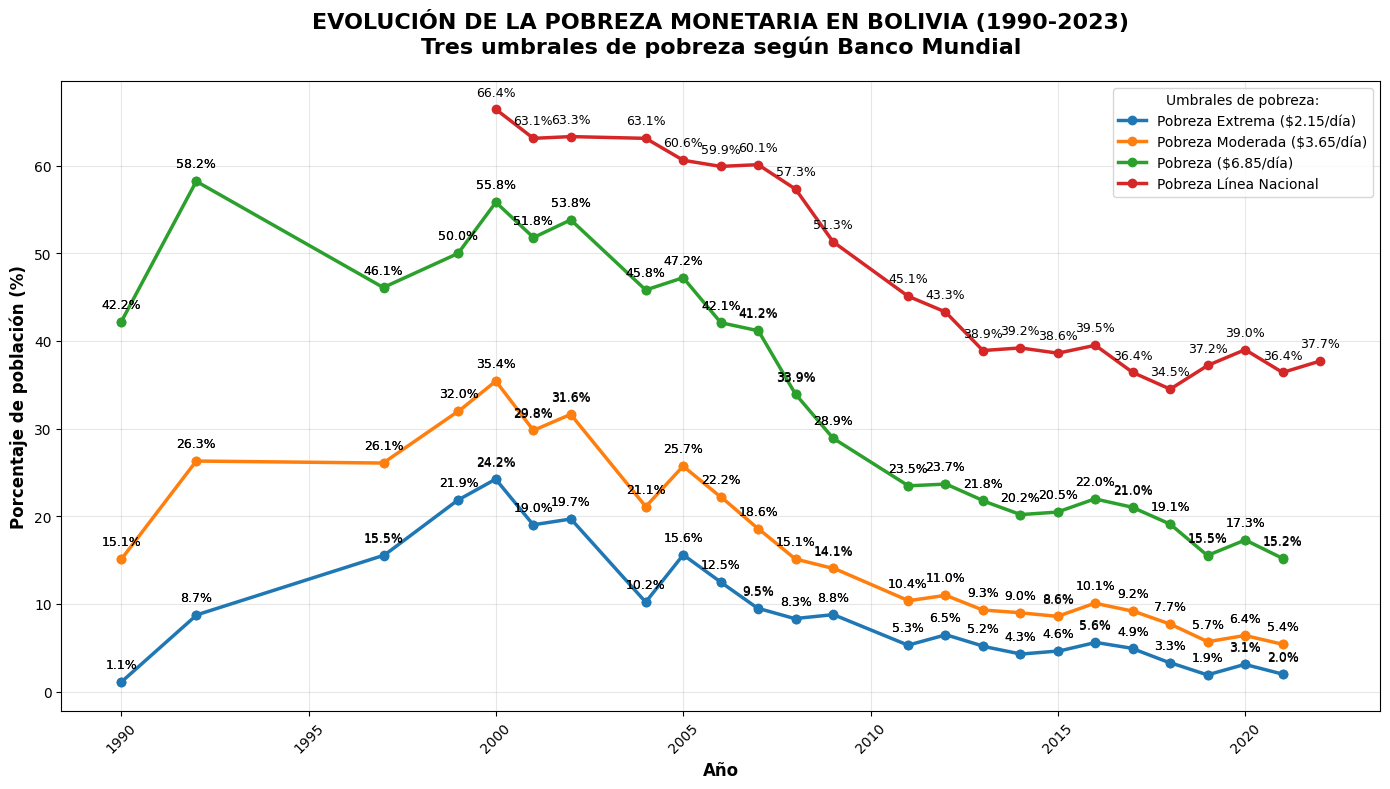

In [13]:
# Gráfico de líneas múltiples con valores anotados
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
for indicador in [
        'Pobreza Extrema ($2.15/día)', # WB (Percentage)
        'Pobreza Moderada ($3.65/día)',# WB (Percentage)
        'Pobreza ($6.85/día)',         # WB (Percentage)
        'Pobreza Línea Nacional'  ]:
    # Assuming df_bolivia_detailed is the correct DataFrame to use
    datos = df_bolivia_detailed[df_bolivia_detailed['indicador_nombre'] == indicador].sort_values('year')
    plt.plot(datos['year'], datos['value'], marker='o', linewidth=2.5, markersize=6, label=indicador)
    # Anotar valores en cada punto
    for x, y in zip(datos['year'], datos['value']):
        plt.annotate(f'{y:.1f}%', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

plt.title('EVOLUCIÓN DE LA POBREZA MONETARIA EN BOLIVIA (1990-2023)\nTres umbrales de pobreza según Banco Mundial',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Año', fontsize=12, fontweight='bold')
plt.ylabel('Porcentaje de población (%)', fontsize=12, fontweight='bold')
plt.legend(title='Umbrales de pobreza:')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
### 1.1.2 ANÁLISIS DE COMPOSICIÓN POR COMPONENTES Y NBI ===
print("=== COMPOSICIÓN DE POBREZA MULTIDIMENSIONAL Y NBI ===\n")

import plotly.express as px
import pandas as pd # Ensure pandas is imported

# A. Pobreza Multidimensional por Componentes (Último año disponible)
componentes_multidimensional = [
    'Privación Educación - Matrícula', 'Privación Educación - Logro',
    'Privación Electricidad', 'Privación Agua Potable',
    'Privación Saneamiento', 'Privación Pobreza Monetaria'
]

# Ensure df_bolivia_detailed is available
if 'df_bolivia_detailed' not in locals():
    print("Error: df_bolivia_detailed not found. Please run the previous steps to load and process data.")
else:
    # Encuentra el último año con datos para estos indicadores
    latest_year_mpm = df_bolivia_detailed[
        df_bolivia_detailed['indicador_nombre'].isin(componentes_multidimensional)
    ]['year'].max()

    if pd.isna(latest_year_mpm):
        print("No se encontró ningún año con datos para los indicadores de pobreza multidimensional.")
    else:
        df_componentes_latest = df_bolivia_detailed[
            (df_bolivia_detailed['indicador_nombre'].isin(componentes_multidimensional)) &
            (df_bolivia_detailed['year'] == latest_year_mpm)
        ].dropna(subset=['value']).copy() # Drop rows where value is NaN

        if not df_componentes_latest.empty:
            fig_componentes = px.pie(df_componentes_latest, values='value', names='indicador_nombre',
                                    title=f'Composición Pobreza Multidimensional {latest_year_mpm} (%) (Banco Mundial)')
            fig_componentes.show()
        else:
            print(f"No hay datos disponibles para la Pobreza Multidimensional por Componentes en {latest_year_mpm}.")


    # B. NBI por Componentes (2024) - Urbano vs Rural
    # Note: NBI components data is likely structured differently, check your data
    # Assuming you want to plot 'NBI Tasa - Pobreza Total' by area for 2024
    indicador_nbi_tasa = 'NBI Tasa - Pobreza Total'
    df_nbi_area_2024 = df_bolivia_detailed[
        (df_bolivia_detailed['indicador_nombre'] == indicador_nbi_tasa) &
        (df_bolivia_detailed['year'] == 2024)
    ].dropna(subset=['value']).copy() # Drop rows where value is NaN

    # Get the total poor population for 2024 from nbi_poblacion
    # Based on previous inspection, 'pobre_total' is the correct column for total poor population
    total_pobre_nbi_2024 = datos_pobreza['nbi_poblacion'][
        (datos_pobreza['nbi_poblacion']['año'] == 2024) &
        (datos_pobreza['nbi_poblacion']['area'] == 'Total')
    ]['pobre_total'].iloc[0] if not datos_pobreza['nbi_poblacion'][
        (datos_pobreza['nbi_poblacion']['año'] == 2024) &
        (datos_pobreza['nbi_poblacion']['area'] == 'Total')
    ].empty else None


    if not df_nbi_area_2024.empty:
        # Define the desired order for the 'area' column, including 'Total'
        area_order = ['Total', 'Urbana', 'Rural']

        # Convert 'area' column to a categorical type with the specified order
        df_nbi_area_2024['area'] = pd.Categorical(df_nbi_area_2024['area'], categories=area_order, ordered=True)

        # Sort by area to ensure correct plotting order
        df_nbi_area_2024 = df_nbi_area_2024.sort_values('area')


        # Define custom colors for the areas, including 'Total'
        color_map = {'Total': 'blue', 'Urbana': 'red', 'Rural': 'green'}

        fig_nbi = px.bar(df_nbi_area_2024,
                         x='area',
                         y='value',
                         color='area', # Color by area
                         color_discrete_map=color_map, # Use custom color map
                         title=f'{indicador_nbi_tasa} por Área en 2024, (INE)<br><sub>Población Total Pobre por NBI en 2024: {total_pobre_nbi_2024:,.0f}</sub>', # Add total poor population to title
                         labels={'value': 'Porcentaje', 'area': 'Área'},
                         text='value' # Add text labels on bars
                        )

        fig_nbi.update_traces(texttemplate='%{text:.1f}%', textposition='outside') # Format text as percentage with one decimal
        fig_nbi.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')


        fig_nbi.show()
    else:
        print(f"No hay datos disponibles para '{indicador_nbi_tasa}' por Área en 2024.")

=== COMPOSICIÓN DE POBREZA MULTIDIMENSIONAL Y NBI ===



In [15]:
# Inspect unique indicator names related to NBI in df_bolivia_detailed
print("Unique NBI indicator names in df_bolivia_detailed:")
display(df_bolivia_detailed[df_bolivia_detailed['indicador_nombre'].str.contains('NBI', na=False)]['indicador_nombre'].unique())

Unique NBI indicator names in df_bolivia_detailed:


array(['NBI - Pobreza Total', 'NBI - Pobreza Moderada',
       'NBI - Indigencia', 'NBI - Marginalidad',
       'NBI - Población Referencia', 'NBI - No Pobre Total',
       'NBI - Necesidades Satisfechas', 'NBI - Umbral Pobreza',
       'NBI Tasa - Pobreza Total', 'NBI Tasa - Pobreza Moderada',
       'NBI Tasa - Indigencia', 'NBI Tasa - Marginalidad'], dtype=object)

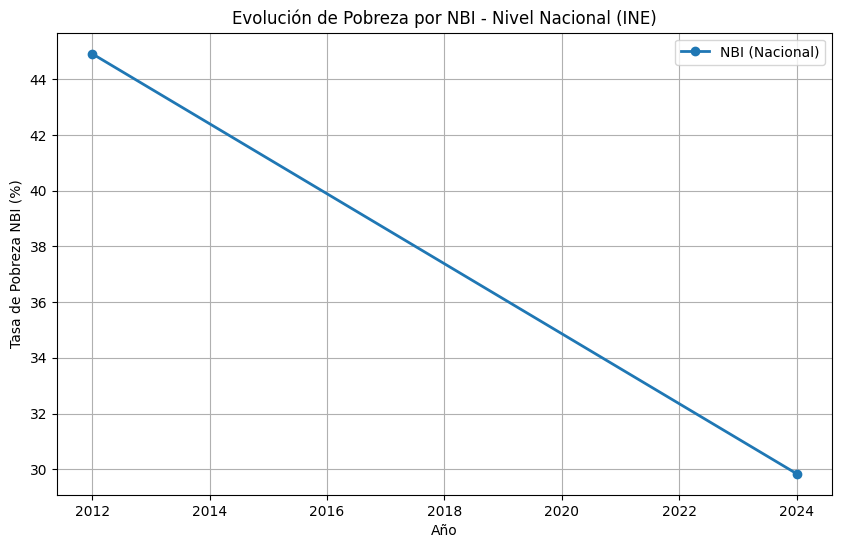

In [16]:
import matplotlib.pyplot as plt

# Gráfico 1: Evolución nacional (SOLO Total)
nbi_nacional = datos_pobreza['nbi_tasa'][datos_pobreza['nbi_tasa']['area'] == 'Total']
plt.figure(figsize=(10, 6))
plt.plot(nbi_nacional['año'], nbi_nacional['pobre_total'], 'o-', linewidth=2, label='NBI (Nacional)')
plt.title('Evolución de Pobreza por NBI - Nivel Nacional (INE)')
plt.xlabel('Año')
plt.ylabel('Tasa de Pobreza NBI (%)')
plt.grid(True)
plt.legend()
plt.show()


In [17]:
### 1.1.4 ANÁLISIS ADICIONALES SUGERIDOS
from plotly.subplots import make_subplots
import plotly.graph_objects as go
# B. ANÁLISIS DE INFLACIÓN vs POBREZA
print("=== RELACIÓN ENTRE INFLACIÓN Y POBREZA (Histórico) ===\n")

# Comparar tendencia inflación y pobreza en todo el período disponible
df_inflacion_impacto = df_bolivia_detailed[
    df_bolivia_detailed['indicador_nombre'].isin(['Pobreza Línea Nacional', 'Inflación anual (%)'])
]

fig_inflacion = make_subplots(specs=[[{"secondary_y": True}]])

# Plot Pobreza Línea Nacional
pobreza_data = df_inflacion_impacto[df_inflacion_impacto['indicador_nombre'] == 'Pobreza Línea Nacional'].sort_values('year')
if not pobreza_data.empty:
    fig_inflacion.add_trace(
        go.Scatter(x=pobreza_data['year'],
                  y=pobreza_data['value'],
                  name="Pobreza Línea Nacional"),
        secondary_y=False
    )
    fig_inflacion.update_yaxes(title_text="Porcentaje de población (%)", secondary_y=False)


# Plot Inflación anual (%)
inflacion_data = df_inflacion_impacto[df_inflacion_impacto['indicador_nombre'] == 'Inflación anual (%)'].sort_values('year')
if not inflacion_data.empty:
    fig_inflacion.add_trace(
        go.Scatter(x=inflacion_data['year'],
                  y=inflacion_data['value'],
                  name="Inflación anual (%)"),
        secondary_y=True
    )
    fig_inflacion.update_yaxes(title_text="Tasa de Inflación (%)", secondary_y=True)


fig_inflacion.update_layout(
    title="Relación entre Inflación y Pobreza en Bolivia (Histórico), (Banco Mundial)",
    hovermode='x unified',
    xaxis_title="Año"
)

fig_inflacion.show()


=== RELACIÓN ENTRE INFLACIÓN Y POBREZA (Histórico) ===



In [18]:
### 1.1.4 ANÁLISIS ADICIONALES CON DATOS INE

print("=== ANÁLISIS AVANZADO CON DATOS INE ===\n")

# A. BRECHAS URBANO-RURAL CON DATOS INE
print("📊 BRECHAS URBANO-RURAL EN POBREZA NBI (INE)")

# Usar directamente los datos del INE
if 'nbi_tasa' in datos_pobreza:
    urbano = datos_pobreza['nbi_tasa'][datos_pobreza['nbi_tasa']['area'] == 'Urbana'].copy() # Use .copy() to avoid SettingWithCopyWarning
    rural = datos_pobreza['nbi_tasa'][datos_pobreza['nbi_tasa']['area'] == 'Rural'].copy() # Use .copy() to avoid SettingWithCopyWarning


    fig = go.Figure()
    fig.add_trace(go.Scatter(x=urbano['año'], y=urbano['pobre_total'],
                            mode='lines+markers', name='NBI Urbano', line=dict(width=3)))
    fig.add_trace(go.Scatter(x=rural['año'], y=rural['pobre_total'], # CORRECTED: Use 'pobre_total' column
                            mode='lines+markers', name='NBI Rural', line=dict(width=3)))

    fig.update_layout(
        title='Desigualdad Urbano-Rural en Pobreza por NBI (INE)',
        xaxis_title='Año',
        yaxis_title='Tasa de Pobreza NBI (%)',
        hovermode='x unified',
        height=500
    )
    fig.show()

    # Calcular brecha
    if not urbano.empty and not rural.empty:
        # Ensure both dataframes have the same years to calculate difference
        merged_nbi = pd.merge(rural, urbano, on='año', suffixes=('_rural', '_urbano'))
        if not merged_nbi.empty:
             brecha = merged_nbi['pobre_total_rural'].mean() - merged_nbi['pobre_total_urbano'].mean()
             print(f"📈 Brecha rural-urbana promedio (años disponibles): {brecha:.1f} puntos porcentuales")
        else:
             print("⚠️ No se encontraron años comunes entre datos urbanos y rurales para calcular la brecha.")
    else:
         print("⚠️ Datos urbanos o rurales de NBI están vacíos, no se puede calcular la brecha.")


# B. COMPOSICIÓN DE POBREZA POR COMPONENTES NBI (CORREGIDO)
print("\n📋 COMPOSICIÓN DE POBREZA POR COMPONENTES NBI 2024")

if 'nbi_componentes_2024' in datos_pobreza:
    componentes_2024 = datos_pobreza['nbi_componentes_2024'].copy()

    # Ajustar la lista de componentes principales para que coincida con los datos
    # Checking the dataframe `componentes_2024` head in the output above, the components are:
    # 'Materiales de la vivienda', 'Espacios en la vivienda', 'Servicios de agua y saneamiento',
    # 'Insumos energéticos', 'Educación', 'Salud'
    componentes_principales = [
        'Materiales de la vivienda',
        'Espacios en la vivienda',
        'Servicios de agua y saneamiento ',
        'Insumos energéticos',
        'Educación',
        'Salud'
    ]

    # Asegurarse de que la columna 'componente' existe y filtrar
    if 'componente' in componentes_2024.columns:
        # Filtrar solo los componentes que necesitamos y que existen en los datos
        componentes_filtrados = componentes_2024[
            componentes_2024['componente'].isin(componentes_principales)
        ].copy()

        # Usar la tasa de pobreza total para la composición
        # Pivotear para tener áreas como columnas y componentes como filas
        if not componentes_filtrados.empty:
            df_pivot_componentes = componentes_filtrados.pivot_table(
                index='componente',
                columns='area',
                values='pobre_total' # Usar la tasa de pobreza total por componente
            ).reset_index()

            # Reordenar columnas de área si es necesario
            area_order_cols = [col for col in ['componente', 'Total', 'Urbana', 'Rural'] if col in df_pivot_componentes.columns]
            df_pivot_componentes = df_pivot_componentes[area_order_cols]

            # Crear gráfico de barras apiladas
            fig_componentes = px.bar(df_pivot_componentes,
                                     x='componente',
                                     y=['Total', 'Urbana', 'Rural'] if 'Total' in df_pivot_componentes.columns else ['Urbana', 'Rural'], # Usar áreas disponibles
                                     title='Composición de Pobreza NBI por Componente y Área 2024, (INE)',
                                     labels={'value': 'Porcentaje de población (%)', 'componente': 'Componente de NBI', 'variable': 'Área'},
                                     barmode='group' # Usar group para barras separadas por área
                                    )
            fig_componentes.update_layout(xaxis_tickangle=-45)
            fig_componentes.show()
        else:
             print("⚠️ No se encontraron datos para los componentes principales de NBI en 2024.")
    else:
        print("❌ La columna 'componente' no se encontró en los datos de componentes NBI 2024.")

=== ANÁLISIS AVANZADO CON DATOS INE ===

📊 BRECHAS URBANO-RURAL EN POBREZA NBI (INE)


📈 Brecha rural-urbana promedio (años disponibles): 48.8 puntos porcentuales

📋 COMPOSICIÓN DE POBREZA POR COMPONENTES NBI 2024


/tmp/ipython-input-615406201.py:71: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



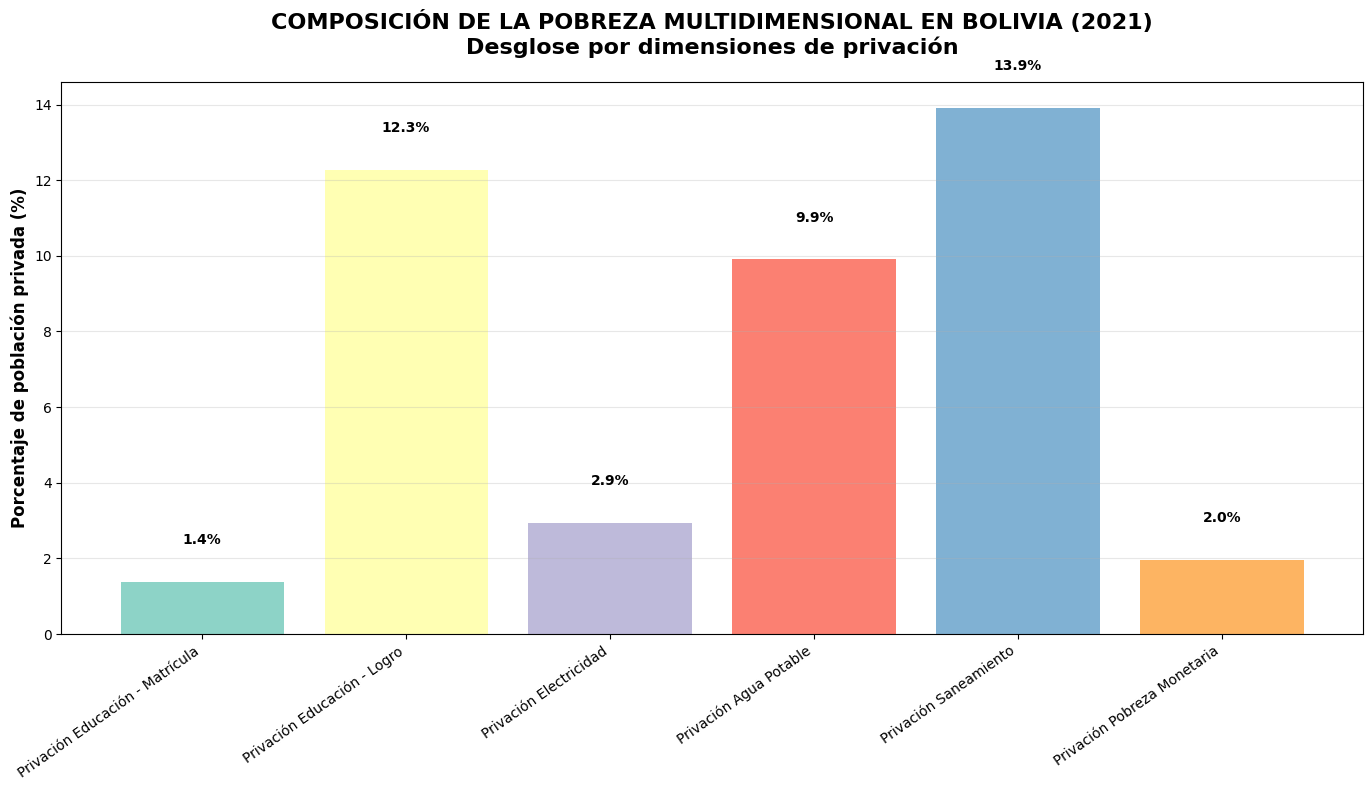

In [19]:
# Radar chart o gráfico de barras apiladas
# Mostrar composición de la pobreza multidimensional
plt.figure(figsize=(14, 8))
datos_mpm = df_bolivia_detailed[df_bolivia_detailed['indicador_nombre'].str.contains('Privación')]
ultimo_año = datos_mpm['year'].max()
datos_recientes = datos_mpm[datos_mpm['year'] == ultimo_año]

plt.bar(datos_recientes['indicador_nombre'], datos_recientes['value'],
        color=plt.cm.Set3(np.arange(len(datos_recientes))))
plt.title('COMPOSICIÓN DE LA POBREZA MULTIDIMENSIONAL EN BOLIVIA ({})\nDesglose por dimensiones de privación'.format(ultimo_año),
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Porcentaje de población privada (%)', fontsize=12, fontweight='bold')
plt.xticks(rotation=35, ha='right')
plt.grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for i, v in enumerate(datos_recientes['value']):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

*  Privación Educación - Matrícula: Porcentaje de población en edad escolar que no está matriculada en el sistema educativo.

*  Privación Educación - Logro: Porcentaje de población que no ha completado el nivel educativo esperado para su edad (analfabetismo, deserción escolar, etc).

Ejemplo: Un niño de 12 años que debería estar en primaria pero:

No matriculado: No va a la escuela

Logro educativo: Va a la escuela pero está en grado inferior al que debería

In [20]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

print("=== ANÁLISIS DETALLADO DE NBI (INE) ===")

# Asegurarse de que los datos de pobreza están disponibles
if 'datos_pobreza' not in locals():
    print("Error: datos_pobreza no encontrado. Por favor, ejecuta los pasos anteriores.")
else:
    # Usar los dataframes cargados
    df_nbi_tasa = datos_pobreza.get('nbi_tasa')
    df_nbi_poblacion = datos_pobreza.get('nbi_poblacion')

    if df_nbi_tasa is None or df_nbi_poblacion is None:
        print("Error: DataFrames 'nbi_tasa' o 'nbi_poblacion' no encontrados en datos_pobreza.")
    else:
        # Filtrar solo las áreas 'Total', 'Urbana', 'Rural' si existen
        areas_a_mostrar = ['Total', 'Urbana', 'Rural']
        df_nbi_tasa_filtrado = df_nbi_tasa[df_nbi_tasa['area'].isin(areas_a_mostrar)].copy()
        df_nbi_poblacion_filtrado = df_nbi_poblacion[df_nbi_poblacion['area'].isin(areas_a_mostrar)].copy()

        # Ordenar por área para consistencia en los gráficos
        area_order = ['Total', 'Urbana', 'Rural']
        df_nbi_tasa_filtrado['area'] = pd.Categorical(df_nbi_tasa_filtrado['area'], categories=area_order, ordered=True)
        df_nbi_poblacion_filtrado['area'] = pd.Categorical(df_nbi_poblacion_filtrado['area'], categories=area_order, ordered=True)
        df_nbi_tasa_filtrado = df_nbi_tasa_filtrado.sort_values(['año', 'area'])
        df_nbi_poblacion_filtrado = df_nbi_poblacion_filtrado.sort_values(['año', 'area'])


        # 1. Visualizar la población No pobre (total, urbano y rural)
        print("\n📊 Población No Pobre por Área (INE)")
        fig_no_pobre_pob = px.bar(df_nbi_poblacion_filtrado,
                                x='area',
                                y='no_pobre_total',
                                color='area',
                                facet_col='año',
                                title='Población No Pobre por Área (Valores Absolutos), según INE',
                                labels={'no_pobre_total': 'Población No Pobre', 'area': 'Área'},
                                text='no_pobre_total'
                                )
        fig_no_pobre_pob.update_traces(texttemplate='%{text:,.0f}', textposition='outside')
        fig_no_pobre_pob.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
        fig_no_pobre_pob.show()

        # Visualizar la tasa de población No pobre
        print("\n📊 Tasa de Población No Pobre por Área (INE)")
        fig_no_pobre_tasa = px.bar(df_nbi_tasa_filtrado,
                                 x='area',
                                 y='no_pobre_total',
                                 color='area',
                                 facet_col='año',
                                 title='Tasa de Población No Pobre por Área (%), según INE',
                                 labels={'no_pobre_total': 'Tasa No Pobre (%)', 'area': 'Área'},
                                 text='no_pobre_total'
                                 )
        fig_no_pobre_tasa.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
        fig_no_pobre_tasa.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
        fig_no_pobre_tasa.show()


        # 2. Visualizar necesidades básicas satisfechas
        print("\n📊 Necesidades Básicas Satisfechas por Área (INE)")
        fig_sat_pob = px.bar(df_nbi_poblacion_filtrado,
                           x='area',
                           y='necesidades_satisfechas',
                           color='area',
                           facet_col='año',
                           title='Población con Necesidades Básicas Satisfechas por Área (Valores Absolutos), según INE',
                           labels={'necesidades_satisfechas': 'Población', 'area': 'Área'},
                           text='necesidades_satisfechas'
                           )
        fig_sat_pob.update_traces(texttemplate='%{text:,.0f}', textposition='outside')
        fig_sat_pob.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
        fig_sat_pob.show()


        # 3. Visualizar Umbral de pobreza
        print("\n📊 Población en el Umbral de Pobreza por Área (INE)")
        fig_umbral_pob = px.bar(df_nbi_poblacion_filtrado,
                              x='area',
                              y='umbral_pobreza',
                              color='area',
                              facet_col='año',
                              title='Población en el Umbral de Pobreza por Área (Valores Absolutos), según INE',
                              labels={'umbral_pobreza': 'Población', 'area': 'Área'},
                              text='umbral_pobreza'
                              )
        fig_umbral_pob.update_traces(texttemplate='%{text:,.0f}', textposition='outside')
        fig_umbral_pob.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
        fig_umbral_pob.show()


        # 4. Visualizar Pobreza Moderada, Indigencia y Marginalidad
        print("\n📊 Niveles de Pobreza NBI por Área (Tasas, INE)")
        df_pobreza_niveles = df_nbi_tasa_filtrado.melt(
            id_vars=['año', 'area'],
            value_vars=['pobreza_moderada', 'indigencia', 'marginalidad'],
            var_name='Nivel de Pobreza',
            value_name='Tasa'
        )

        fig_niveles_pobreza = px.bar(df_pobreza_niveles,
                                     x='area',
                                     y='Tasa',
                                     color='Nivel de Pobreza',
                                     facet_col='año',
                                     barmode='group', # Usar group para barras separadas por nivel y área
                                     title='Niveles de Pobreza NBI por Área (%), según INE',
                                     labels={'Tasa': 'Porcentaje (%)', 'area': 'Área'},
                                     text='Tasa'
                                     )
        fig_niveles_pobreza.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
        fig_niveles_pobreza.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
        fig_niveles_pobreza.show()


=== ANÁLISIS DETALLADO DE NBI (INE) ===

📊 Población No Pobre por Área (INE)



📊 Tasa de Población No Pobre por Área (INE)



📊 Necesidades Básicas Satisfechas por Área (INE)



📊 Población en el Umbral de Pobreza por Área (INE)



📊 Niveles de Pobreza NBI por Área (Tasas, INE)


In [21]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

print("=== ANÁLISIS DE COMPOSICIÓN DE POBREZA NBI POR COMPONENTE (INE) ===")

# Asegurarse de que los dataframes de componentes NBI están disponibles
if 'datos_pobreza' not in locals() or 'nbi_componentes_2012' not in datos_pobreza or 'nbi_componentes_2024' not in datos_pobreza:
    print("Error: DataFrames de componentes NBI (2012 o 2024) no encontrados en datos_pobreza.")
else:
    df_comp_2012 = datos_pobreza['nbi_componentes_2012'].copy()
    df_comp_2024 = datos_pobreza['nbi_componentes_2024'].copy()

    # Lista de componentes principales a analizar (basada en la inspección previa)
    componentes_principales = [
        'Materiales de la vivienda',
        'Espacios en la vivienda',
        'Servicios de agua y saneamiento ', # Corrected component name with trailing space
        'Insumos energéticos',
        'Educación',
        'Salud'
    ]

    # Filtrar y preparar datos para 2012 y 2024
    df_comp_2012_filtered = df_comp_2012[df_comp_2012['componente'].isin(componentes_principales)].copy()
    df_comp_2024_filtered = df_comp_2024[df_comp_2024['componente'].isin(componentes_principales)].copy()

    # Combine data from 2012 and 2024 for comparative visualization
    df_combined_comp = pd.concat([df_comp_2012_filtered, df_comp_2024_filtered], ignore_index=True)

    # Pivot the combined data to have 'area' and 'año' as columns
    # Use the total poverty rate by component ('pobre_total')
    if not df_combined_comp.empty:
        # Check unique components in the combined dataframe before pivoting
        print("\nUnique components in combined data before pivoting:", df_combined_comp['componente'].unique())

        df_pivot_comp = df_combined_comp.pivot_table(
            index=['componente', 'año'],
            columns='area',
            values='pobre_total'
        ).reset_index()

        # Reorder area columns if necessary
        area_order_cols = [col for col in ['componente', 'año', 'Total', 'Urbana', 'Rural'] if col in df_pivot_comp.columns]
        df_pivot_comp = df_pivot_comp[area_order_cols]

        # Visualización: Gráfico de barras agrupadas por componente y año, con barras separadas por área
        print("\n📊 Composición de Pobreza NBI por Componente, Año y Área")
        fig_comp = px.bar(df_pivot_comp,
                          x='componente',
                          y=['Total', 'Urbana', 'Rural'] if 'Total' in df_pivot_comp.columns else ['Urbana', 'Rural'], # Usar áreas disponibles
                          facet_col='año', # Separar por año
                          barmode='group', # Barras agrupadas por componente, separadas por área
                          title='Composición de Pobreza NBI por Componente, Año y Área, según INE',
                          labels={'value': 'Porcentaje de población (%)', 'componente': 'Componente de NBI', 'variable': 'Área'},
                          text='value' # Añadir texto en las barras
                         )

        fig_comp.update_layout(xaxis_tickangle=-45)
        fig_comp.update_traces(texttemplate='%{text:.1f}%', textposition='outside') # Formato porcentaje con 1 decimal
        fig_comp.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')


        fig_comp.show()
    else:
        print("⚠️ No se encontraron datos suficientes para los componentes de NBI en 2012 y 2024.")


print("\n=== COMPARACIÓN DE TENDENCIAS NBI (INE) vs POBREZA MONETARIA (BM) ===")

# Ensure df_bolivia_detailed is available
if 'df_bolivia_detailed' not in locals():
     print("Error: df_bolivia_detailed no encontrado. Por favor, ejecuta los pasos anteriores.")
else:
    # Select key indicators for comparison
    # Based on previous output and user request: NBI Tasa - Pobreza Moderada, Indigencia, Marginalidad, and NBI - Umbral Pobreza
    # Also include relevant WB indicators for comparison
    indicadores_comparar = [
        'NBI Tasa - Pobreza Moderada', # NBI from INE (Percentage)
        'NBI Tasa - Indigencia',       # NBI from INE (Percentage)
        'NBI Tasa - Marginalidad',     # NBI from INE (Percentage)
        'Pobreza Extrema ($2.15/día)', # WB (Percentage)
        'Pobreza Moderada ($3.65/día)',# WB (Percentage)
        'Pobreza ($6.85/día)',         # WB (Percentage)
        'Pobreza Línea Nacional'       # WB (Percentage)
    ]

    # Filter data for these indicators in Bolivia
    # Keep only 'Total' area for NBI indicators and all data for WB indicators (where area is NaN)
    df_comparativa_tendencias = df_bolivia_detailed[
        (df_bolivia_detailed['indicador_nombre'].isin(indicadores_comparar)) &
        ((df_bolivia_detailed['area'].isna()) | (df_bolivia_detailed['area'] == 'Total')) # Filter for NaN area (BM) or 'Total' area (INE)
    ].dropna(subset=['value']).copy() # Remove rows with NaN values for plotting


    # Visualization: Line chart to compare trends
    if not df_comparativa_tendencias.empty:
        fig_tendencias = px.line(df_comparativa_tendencias,
                                 x='year',
                                 y='value',
                                 color='indicador_nombre',
                                 title='Comparación de Tendencias de Pobreza: NBI (INE) vs Monetaria (Banco Mundial) en Bolivia',
                                 labels={'value': 'Valor', 'year': 'Año'}, # Changed y-axis label as units vary
                                 hover_data={'value': ':.1f'} # Adjusted hover data format
                                )

        fig_tendencias.update_traces(mode='lines+markers')
        fig_tendencias.update_layout(hovermode='x unified')
        fig_tendencias.show()
    else:
        print("⚠️ No hay datos suficientes para comparar las tendencias de pobreza NBI e Indicadores del Banco Mundial.")

=== ANÁLISIS DE COMPOSICIÓN DE POBREZA NBI POR COMPONENTE (INE) ===

Unique components in combined data before pivoting: ['Materiales de la vivienda' 'Espacios en la vivienda'
 'Servicios de agua y saneamiento ' 'Insumos energéticos' 'Educación'
 'Salud']

📊 Composición de Pobreza NBI por Componente, Año y Área


/tmp/ipython-input-4177532587.py:37: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior




=== COMPARACIÓN DE TENDENCIAS NBI (INE) vs POBREZA MONETARIA (BM) ===


## Educación

In [22]:
print("=== ANÁLISIS ESPECÍFICO DE ALFABETISMO Y POBREZA RURAL (INE) ===")

# Asegurarse de que los datos necesarios están disponibles
if 'datos_educacion' not in locals() or 'df_bolivia_detailed' not in locals():
    print("Error: datos_educacion o df_bolivia_detailed no encontrado. Por favor, ejecuta los pasos anteriores.")
else:
    # A. Tasa de alfabetismo total, por géneros (hombre - mujer) en los años 2001, 2012, 2024
    print("\n🎓 Tasa de Alfabetismo Total por Género (2001, 2012, 2024)")

    if 'alfabetismo_area' in datos_educacion:
        df_alfabetismo_area = datos_educacion['alfabetismo_area'].copy()

        # Filter for the specified years and sexes ('Hombres', 'Mujeres') and area 'Total'
        years_of_interest = [2001, 2012, 2024]
        sexes_of_interest = ['Hombres', 'Mujeres']

        # Filter for 'Total' area
        df_alfabetismo_total = df_alfabetismo_area[df_alfabetismo_area['area'] == 'Total'].copy()

        # Melt the dataframe to have sexes as a variable for plotting
        df_alfabetismo_gender = df_alfabetismo_total.melt(
            id_vars=['año', 'area'],
            value_vars=['tasa_hombres', 'tasa_mujeres'],
            var_name='Género',
            value_name='Tasa de Alfabetismo (%)'
        )

        # Rename gender values for clarity
        df_alfabetismo_gender['Género'] = df_alfabetismo_gender['Género'].map({
            'tasa_hombres': 'Hombres',
            'tasa_mujeres': 'Mujeres'
        })

        # Filter for the specified years and sexes
        df_alfabetismo_gender_filtered = df_alfabetismo_gender[
            (df_alfabetismo_gender['año'].isin(years_of_interest)) &
            (df_alfabetismo_gender['Género'].isin(sexes_of_interest)) # Ensure only selected sexes are included
        ].copy()

        # Ensure 'año' is categorical for discrete bars
        df_alfabetismo_gender_filtered['año'] = df_alfabetismo_gender_filtered['año'].astype(str)

        if not df_alfabetismo_gender_filtered.empty:
            fig_alfabetismo_gender = px.bar(df_alfabetismo_gender_filtered,
                                           x='año',
                                           y='Tasa de Alfabetismo (%)',
                                           color='Género',
                                           barmode='group',
                                           title='Tasa de Alfabetismo Total por Género (2001, 2012, 2024), según INE',
                                           labels={'año': 'Año'},
                                           text='Tasa de Alfabetismo (%)' # Add text labels
                                          )
            fig_alfabetismo_gender.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
            fig_alfabetismo_gender.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

            fig_alfabetismo_gender.show()
        else:
            print("⚠️ No hay datos suficientes para graficar la Tasa de Alfabetismo Total por Género para los años especificados.")

    else:
        print("⚠️ Datos de alfabetismo por área (alfabetismo_area) no encontrados.")

=== ANÁLISIS ESPECÍFICO DE ALFABETISMO Y POBREZA RURAL (INE) ===

🎓 Tasa de Alfabetismo Total por Género (2001, 2012, 2024)


In [23]:
print("=== ANÁLISIS DE BRECHAS URBANO-RURALES Y GÉNERO EN EDUCACIÓN (INE) ===")

# Asegurarse de que los datos de educación están disponibles
if 'datos_educacion' not in locals():
    print("Error: datos_educacion no encontrado. Por favor, ejecuta los pasos anteriores.")
else:
    # A. EVOLUCIÓN ALFABETISMO URBANO-RURAL Y GÉNERO
    print("\n🎓 EVOLUCIÓN DE BRECHAS EN ALFABETISMO (Área y Género)")

    if 'alfabetismo_area' in datos_educacion:
        df_alfabetismo_area = datos_educacion['alfabetismo_area'].copy()
        df_alfabetismo_edad = datos_educacion['alfabetismo_edad'].copy()


        # Ensure 'area' column is categorical with specific order for consistent plotting
        area_order = ['Total', 'Urbana', 'Rural']
        if 'area' in df_alfabetismo_area.columns:
             df_alfabetismo_area['area'] = pd.Categorical(df_alfabetismo_area['area'], categories=area_order, ordered=True)
             df_alfabetismo_area = df_alfabetismo_area.sort_values(['año', 'area']) # Sort for plotting

        # Plot Literacy Rate by Area
        if 'tasa_total' in df_alfabetismo_area.columns:
            fig_alfabetismo_area = px.line(df_alfabetismo_area,
                                      x='año',
                                      y='tasa_total',
                                      color='area',
                                      title='Evolución de Tasa de Alfabetismo por Área, según INE',
                                      labels={'tasa_total': 'Tasa de Alfabetismo (%)', 'año': 'Año'},
                                      hover_data={'tasa_total': ':.1f'}
                                     )
            fig_alfabetismo_area.update_traces(mode='lines+markers')
            fig_alfabetismo_area.update_layout(hovermode='x unified')
            fig_alfabetismo_area.show()
        else:
             print("⚠️ La columna 'tasa_total' no se encontró en los datos de alfabetismo por área.")


        # Plot Gender Gap in Literacy
        if 'brecha' in df_alfabetismo_area.columns:
             fig_alfabetismo_genero_area = px.line(df_alfabetismo_area,
                                                 x='año',
                                                 y='brecha', # Use 'brecha' column for gender gap
                                                 color='area',
                                                 title='Brecha de Género en Alfabetismo por Área (Hombres - Mujeres), según INE',
                                                 labels={'brecha': 'Brecha Hombres - Mujeres (p.p.)', 'año': 'Año'},
                                                 hover_data={'brecha': ':.1f'}
                                                )
             fig_alfabetismo_genero_area.update_traces(mode='lines+markers')
             fig_alfabetismo_genero_area.update_layout(hovermode='x unified')
             fig_alfabetismo_genero_area.show()
        else:
            print("⚠️ La columna 'brecha' (brecha de género) no se encontró en los datos de alfabetismo por área.")


    # B. ANÁLISIS DE ASISTENCIA ESCOLAR POR EDAD Y ÁREA
    print("\n👨‍🎓 ASISTENCIA ESCOLAR POR GRUPO DE EDAD Y ÁREA (Último Año)")

    if 'asistencia' in datos_educacion:
        df_asistencia = datos_educacion['asistencia'].copy()

        # Find the latest year available in the assistance data
        latest_year_asistencia = df_asistencia['año'].max()
        print(f"   Analizando datos del último año disponible: {latest_year_asistencia}")

        df_asistencia_latest = df_asistencia[
            df_asistencia['año'] == latest_year_asistencia
        ].copy()

        # Use 'tasa_total' column for plotting assistance rate
        if 'tasa_total' in df_asistencia_latest.columns:
            # Ensure expected areas are present before filtering and plotting
            areas_presentes = df_asistencia_latest['area'].unique()
            areas_a_graficar = [area for area in ['Total', 'Urbana', 'Rural'] if area in areas_presentes]


            if not df_asistencia_latest[df_asistencia_latest['area'].isin(areas_a_graficar)].empty and areas_a_graficar:
                # Ensure 'area' column is categorical with specific order for consistent plotting
                df_asistencia_latest['area'] = pd.Categorical(df_asistencia_latest['area'], categories=area_order, ordered=True)
                df_asistencia_latest = df_asistencia_latest.sort_values(['grupo_edad', 'area']) # Sort for plotting


                fig_asistencia = px.bar(df_asistencia_latest[df_asistencia_latest['area'].isin(areas_a_graficar)], # Filter by areas to plot
                                   x='grupo_edad',
                                   y='tasa_total', # Use 'tasa_total' column
                                   color='area',
                                   barmode='group',
                                   title=f'Tasa de Asistencia Escolar por Grupo de Edad y Área {latest_year_asistencia}, según INE',
                                   labels={'tasa_total': 'Tasa de Asistencia (%)', 'grupo_edad': 'Grupo de Edad'},
                                   text='tasa_total' # Add text labels on bars
                                  )
                fig_asistencia.update_layout(xaxis_tickangle=-45)
                fig_asistencia.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
                fig_asistencia.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

                fig_asistencia.show()
            else:
                print(f"⚠️ No hay datos suficientes o áreas esperadas para graficar la Tasa de Asistencia Escolar Total en {latest_year_asistencia}.")
        else:
            print(f"⚠️ La columna 'tasa_total' no se encontró en los datos de asistencia para {latest_year_asistencia}.")


    # C. ANÁLISIS DE AÑOS DE ESTUDIO PROMEDIO
    print("\n📚 AÑOS DE ESTUDIO PROMEDIO (Área y Grupo de Edad)")

    if 'anos_estudio_area' in datos_educacion:
        df_anos_area = datos_educacion['anos_estudio_area'].copy()

        # Ensure 'area' column is categorical with specific order
        if 'area' in df_anos_area.columns:
            df_anos_area['area'] = pd.Categorical(df_anos_area['area'], categories=area_order, ordered=True)
            df_anos_area = df_anos_area.sort_values(['año', 'area'])


        # Plot Average Years of Study by Area
        if 'anos_total' in df_anos_area.columns:
            fig_anos_area = px.line(df_anos_area,
                                    x='año',
                                    y='anos_total', # Use 'anos_total' column
                                    color='area',
                                    title='Evolución de Años de Estudio Promedio por Área, según INE',
                                    labels={'anos_total': 'Años de Estudio Promedio', 'año': 'Año'},
                                    hover_data={'anos_total': ':.1f'}
                                   )
            fig_anos_area.update_traces(mode='lines+markers')
            fig_anos_area.update_layout(hovermode='x unified')
            fig_anos_area.show()
        else:
            print("⚠️ La columna 'anos_total' no se encontró en los datos de años de estudio por área.")

    if 'anos_estudio_edad' in datos_educacion:
        df_anos_edad = datos_educacion['anos_estudio_edad'].copy()

        # Plot Average Years of Study by Age Group (Latest Year)
        latest_year_anos_edad = df_anos_edad['año'].max()
        df_anos_edad_latest = df_anos_edad[
            df_anos_edad['año'] == latest_year_anos_edad
        ].copy()

        if 'anos_total' in df_anos_edad_latest.columns:
             fig_anos_edad = px.bar(df_anos_edad_latest,
                                    x='grupo_edad',
                                    y='anos_total', # Use 'anos_total' column
                                    title=f'Años de Estudio Promedio por Grupo de Edad {latest_year_anos_edad}, según INE',
                                    labels={'anos_total': 'Años de Estudio Promedio', 'grupo_edad': 'Grupo de Edad'},
                                    text='anos_total' # Add text labels
                                   )
             fig_anos_edad.update_layout(xaxis_tickangle=-45)
             fig_anos_edad.update_traces(texttemplate='%{text:.1f}', textposition='outside')
             fig_anos_edad.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
             fig_anos_edad.show()
        else:
            print(f"⚠️ La columna 'anos_total' no se encontró en los datos de años de estudio por edad para {latest_year_anos_edad}.")


=== ANÁLISIS DE BRECHAS URBANO-RURALES Y GÉNERO EN EDUCACIÓN (INE) ===

🎓 EVOLUCIÓN DE BRECHAS EN ALFABETISMO (Área y Género)



👨‍🎓 ASISTENCIA ESCOLAR POR GRUPO DE EDAD Y ÁREA (Último Año)
   Analizando datos del último año disponible: 2024



📚 AÑOS DE ESTUDIO PROMEDIO (Área y Grupo de Edad)


In [24]:
    # 4. Nivel de instrucción alcanzado por hombres y mujeres
    print("\n📚 NIVEL DE INSTRUCCIÓN ALCANZADO POR GÉNERO")

    if 'nivel_instruccion' in datos_educacion:
        df_nivel_instruccion = datos_educacion['nivel_instruccion'].copy()

        # Filter for relevant levels of instruction and sexes ('Hombres', 'Mujeres')
        niveles_interes = ['Ninguno', 'Primaria', 'Secundaria', 'Superior']
        sexos_interes = ['Hombres', 'Mujeres'] # Exclude 'Total' from this plot

        df_nivel_instruccion_filtered = df_nivel_instruccion[
            (df_nivel_instruccion['nivel'].isin(niveles_interes)) &
            (df_nivel_instruccion['sexo'].isin(sexos_interes))
        ].copy()

        # Ensure 'sexo' and 'nivel' columns are categorical with specific order for plotting
        gender_order = ['Hombres', 'Mujeres'] # Only include Hombres and Mujeres for this plot
        nivel_order = niveles_interes # Use the defined order for levels

        if 'sexo' in df_nivel_instruccion_filtered.columns:
             df_nivel_instruccion_filtered['sexo'] = pd.Categorical(df_nivel_instruccion_filtered['sexo'], categories=gender_order, ordered=True)
        if 'nivel' in df_nivel_instruccion_filtered.columns:
             df_nivel_instruccion_filtered['nivel'] = pd.Categorical(df_nivel_instruccion_filtered['nivel'], categories=nivel_order, ordered=True)


        # Plot the data using 'tasa_total' which represents the rate for each level and sex
        if not df_nivel_instruccion_filtered.empty and 'tasa_total' in df_nivel_instruccion_filtered.columns:
            fig_nivel = px.bar(df_nivel_instruccion_filtered,
                                x='año',
                                y='tasa_total', # Use 'tasa_total' as the value
                                color='sexo', # Color by gender
                                facet_col='nivel', # Separate charts by level of instruction
                                barmode='group', # Group bars by year and level, separated by gender
                                title='Nivel de Instrucción Alcanzado por Género y Año (Tasas, INE)',
                                labels={'tasa_total': 'Porcentaje de población (%)', 'año': 'Año', 'sexo': 'Género', 'nivel': 'Nivel de Instrucción'},
                                text='tasa_total' # Add text labels
                               )

            fig_nivel.update_layout(xaxis_tickangle=-45)
            fig_nivel.update_traces(texttemplate='%{text:.1f}%', textposition='outside') # Format text as percentage
            fig_nivel.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

            fig_nivel.show()
        else:
            print("⚠️ No hay datos suficientes (o falta la columna 'tasa_total') para graficar los niveles de instrucción por género.")

    else:
        print("⚠️ Datos de nivel de instrucción (nivel_instruccion) no encontrados.")



📚 NIVEL DE INSTRUCCIÓN ALCANZADO POR GÉNERO


=== CÁLCULO DE CORRELACIONES: EDUCACIÓN vs POBREZA ===
⚠️ Poverty indicator column 'Pobreza Extrema ($2.15/día)' not found in df_bolivia_detailed (Total area).
⚠️ Poverty indicator column 'Pobreza Moderada ($3.65/día)' not found in df_bolivia_detailed (Total area).
⚠️ Poverty indicator column 'Pobreza ($6.85/día)' not found in df_bolivia_detailed (Total area).
⚠️ Poverty indicator column 'Pobreza Línea Nacional' not found in df_bolivia_detailed (Total area).
⚠️ Poverty indicator column 'NBI Tasa - Pobreza Total' not found in df_bolivia_detailed (Total area).
⚠️ Poverty indicator column 'NBI Tasa - Pobreza Moderada' not found in df_bolivia_detailed (Total area).
⚠️ Poverty indicator column 'NBI Tasa - Indigencia' not found in df_bolivia_detailed (Total area).
⚠️ Poverty indicator column 'NBI Tasa - Marginalidad' not found in df_bolivia_detailed (Total area).

DataFrame used for correlation calculation (showing common years with data):


,Tasa Alfabetismo Total (INE),Años Estudio Promedio Total (INE)
year,,
2001,86.723667,7.428634
2012,94.910022,8.952906
2024,95.863329,10.563961



Calculating correlation matrix for 3 common years...


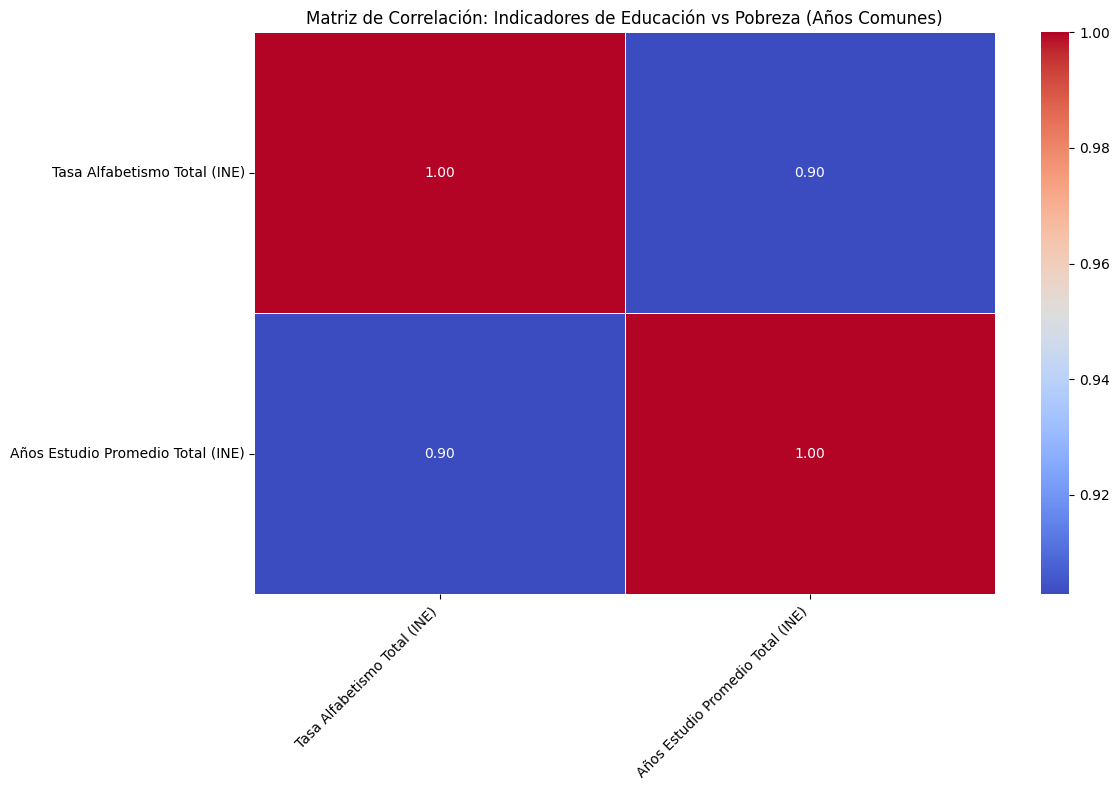

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("=== CÁLCULO DE CORRELACIONES: EDUCACIÓN vs POBREZA ===")

# Asegurarse de que los datos necesarios están disponibles
if 'datos_educacion' not in locals() or 'df_bolivia_detailed' not in locals():
    print("Error: datos_educacion o df_bolivia_detailed no encontrado. Por favor, ejecuta los pasos anteriores.")
else:
    # Identificar indicadores clave para la correlación
    # Indicadores de Educación (usando datos de INE)
    # Usaremos 'tasa_total' de alfabetismo_area y anos_estudio_area
    edu_indicators_ine = {
        'Tasa Alfabetismo Total (INE)': ('alfabetismo_area', 'tasa_total'),
        'Años Estudio Promedio Total (INE)': ('anos_estudio_area', 'anos_total')
        # Podríamos añadir más si son relevantes y tienen datos temporales
    }

    # Indicadores de Pobreza (usando datos de BM y NBI del INE en df_bolivia_detailed)
    # Usaremos la tasa total para la comparación
    poverty_indicators = [
        'Pobreza Extrema ($2.15/día)',       # BM
        'Pobreza Moderada ($3.65/día)',      # BM
        'Pobreza ($6.85/día)',               # BM
        'Pobreza Línea Nacional',             # BM (o INE si es la misma serie)
        'NBI Tasa - Pobreza Total',          # INE
        'NBI Tasa - Pobreza Moderada',       # INE
        'NBI Tasa - Indigencia',             # INE
        'NBI Tasa - Marginalidad'            # INE
    ]

    # Recopilar datos de educación y pobreza en un solo DataFrame para correlación
    df_correlation = pd.DataFrame()

    # Add Education Indicators (from datos_educacion)
    for edu_name, (df_key, col_name) in edu_indicators_ine.items():
        if df_key in datos_educacion and col_name in datos_educacion[df_key].columns:
            df_edu = datos_educacion[df_key].copy()
            # Assuming 'Total' area if area column exists, otherwise use data as is
            if 'area' in df_edu.columns:
                df_edu = df_edu[df_edu['area'] == 'Total'].copy() # Filter for Total area
            if 'año' in df_edu.columns:
                 df_edu = df_edu.rename(columns={'año': 'year'}) # Rename year column to match df_bolivia_detailed
                 df_correlation[edu_name] = df_edu.set_index('year')[col_name]
            else:
                 print(f"⚠️ DataFrame '{df_key}' does not have an 'año' column.")
        else:
            print(f"⚠️ Education data '{df_key}' or column '{col_name}' not found.")

    # Add Poverty Indicators (from df_bolivia_detailed - wide format)
    if 'year' in df_bolivia_detailed.columns and 'area' in df_bolivia_detailed.columns:
        # Filter df_bolivia_detailed for 'Total' area for poverty indicators
        df_poverty_total = df_bolivia_detailed[df_bolivia_detailed['area'] == 'Total'].copy()
        df_poverty_total = df_poverty_total.set_index('year') # Set year as index

        for pov_name in poverty_indicators:
            if pov_name in df_poverty_total.columns:
                df_correlation[pov_name] = df_poverty_total[pov_name]
            else:
                print(f"⚠️ Poverty indicator column '{pov_name}' not found in df_bolivia_detailed (Total area).")
    else:
         print("⚠️ df_bolivia_detailed does not have 'year' or 'area' columns.")


    # Ensure index (year) is aligned and drop rows with NaN for correlation calculation
    df_correlation = df_correlation.dropna()

    if not df_correlation.empty:
        print("\nDataFrame used for correlation calculation (showing common years with data):")
        display(df_correlation.head())
        print(f"\nCalculating correlation matrix for {len(df_correlation)} common years...")

        # Calculate the correlation matrix
        correlation_matrix = df_correlation.corr()

        # Visualize the correlation matrix using a heatmap
        plt.figure(figsize=(12, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
        plt.title('Matriz de Correlación: Indicadores de Educación vs Pobreza (Años Comunes)')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()

    else:
        print("\n⚠️ No hay años comunes con datos disponibles para todos los indicadores seleccionados para calcular la correlación.")

mencionar que correlación no implica causalidad directa. Un crecimiento del PIB puede estar asociado con la reducción de la pobreza, pero hay muchos otros factores influyentes.

## MACROECONÓMICOS

In [26]:
# Inspect the columns of df_bolivia_detailed to understand its current format
print("Current columns in df_bolivia_detailed:")
if 'df_bolivia_detailed' in locals():
    display(df_bolivia_detailed.columns.tolist())
else:
    print("df_bolivia_detailed not found.")

Current columns in df_bolivia_detailed:


['year',
 'value',
 'indicador_nombre',
 'country',
 'codigo_indicador',
 'fuente',
 'area',
 'tipo',
 'grupo_edad',
 'indicator_id',
 'country_name',
 'unit',
 'pais_nombre']

In [27]:
# Primero: Preparar datos macroeconómicos de Bolivia
print("=== PREPARACIÓN DE DATOS MACROECONÓMICOS ===\\n")

# Lista de indicadores macroeconómicos clave
indicadores_macro = [
    'PIB per cápita (PPA)', 'Tasa Desempleo', 'Población Total',
    'Inflación anual (%)', 'Crecimiento PIB anual (%)',
    'Gasto público (% PIB)', 'Exportaciones (% PIB)',
    'Gasto en educación (% PIB)', 'Gasto en salud (% PIB)'
]

# Filtrar solo datos macroeconómicos de Bolivia
df_macro_bolivia = df_bolivia_detailed[
    (df_bolivia_detailed['indicador_nombre'].isin(indicadores_macro)) &
    (df_bolivia_detailed['country'] == 'BOL')
].copy()

# Convertir value a numérico
df_macro_bolivia['value'] = pd.to_numeric(df_macro_bolivia['value'], errors='coerce')

# Pivotear a formato wide para análisis temporal
df_macro_wide = df_macro_bolivia.pivot_table(
    index='year',
    columns='indicador_nombre',
    values='value',
    aggfunc='first'
).reset_index()

# Convertir year a numérico y ordenar
df_macro_wide['year'] = pd.to_numeric(df_macro_wide['year'], errors='coerce')
df_macro_wide = df_macro_wide.sort_values('year').dropna(subset=['year'])

print(f"📈 Datos macroeconómicos preparados: {df_macro_wide.shape[0]} años")
print(f"📊 Variables disponibles: {list(df_macro_wide.columns[1:])}")

# Mostrar años disponibles
print(f"📅 Rango temporal: {int(df_macro_wide['year'].min())}-{int(df_macro_wide['year'].max())}")

=== PREPARACIÓN DE DATOS MACROECONÓMICOS ===\n
📈 Datos macroeconómicos preparados: 66 años
📊 Variables disponibles: ['Crecimiento PIB anual (%)', 'Exportaciones (% PIB)', 'Gasto en educación (% PIB)', 'Gasto en salud (% PIB)', 'Gasto público (% PIB)', 'Inflación anual (%)', 'PIB per cápita (PPA)', 'Población Total', 'Tasa Desempleo']
📅 Rango temporal: 1960-2025


\n=== ANÁLISIS TEMPORAL DE VARIABLES MACROECONÓMICAS ===\n


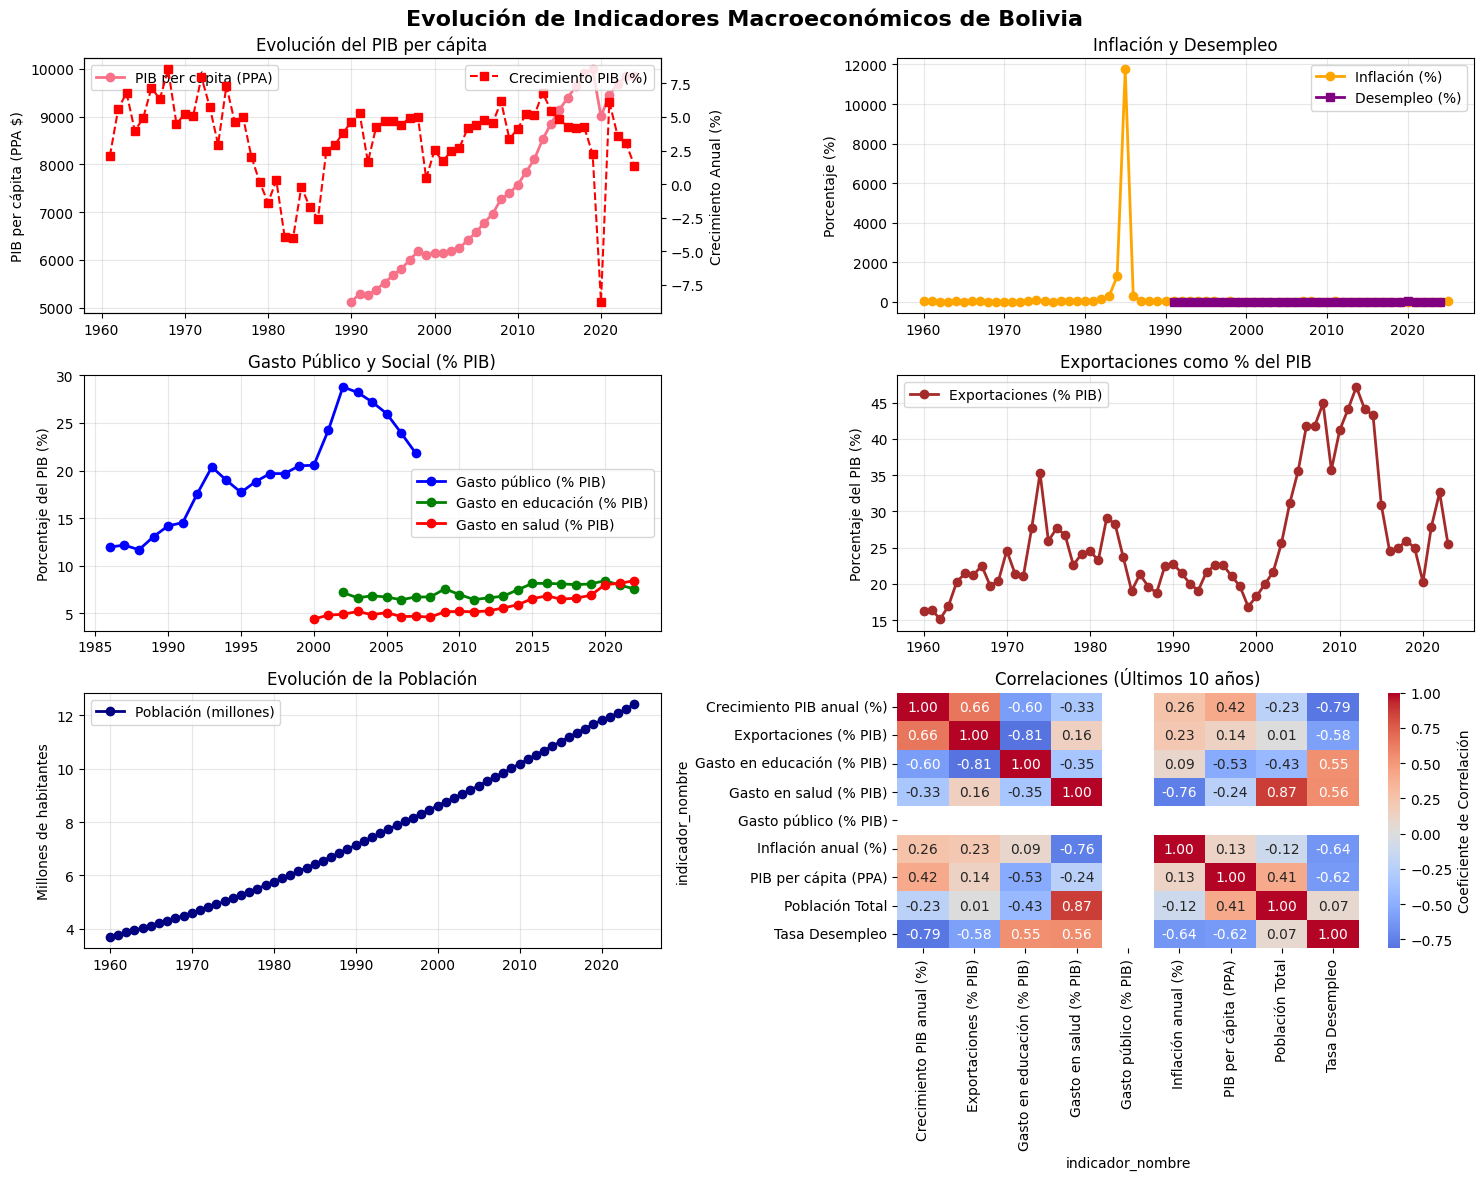

\n=== ESTADÍSTICAS DESCRIPTIVAS ===\n
Estadísticas descriptivas de variables macroeconómicas:


indicador_nombre,year,Crecimiento PIB anual (%),Exportaciones (% PIB),Gasto en educación (% PIB),Gasto en salud (% PIB),Gasto público (% PIB),Inflación anual (%),PIB per cápita (PPA),Población Total,Tasa Desempleo
count,66.000000,64.000000,64.000000,21.000000,23.000000,22.000000,66.000000,35.000000,6.500000e+01,34.000000
mean,1992.500000,3.440367,25.927254,7.316436,5.803064,19.620964,216.468699,7406.992544,7.630777e+06,2.985235
std,19.196354,3.044693,8.098050,0.673471,1.211972,5.288384,1450.642148,1660.197736,2.660481e+06,1.060347
min,1960.000000,-8.737884,15.149240,6.434220,4.395541,11.679237,-0.706357,5124.487981,3.702323e+06,2.021000
25%,1976.250000,2.401790,20.388788,6.720490,4.879804,15.286831,3.636064,6122.244908,5.256496e+06,2.479500
50%,1992.500000,4.266608,23.021654,7.195048,5.202305,19.682576,6.731708,6967.569880,7.430336e+06,2.648500
75%,2008.750000,5.078071,27.948206,8.015870,6.577322,23.406290,13.611480,9071.452031,9.850858e+06,3.088250
max,2025.000000,8.529443,47.166197,8.437110,8.431429,28.784435,11749.639632,9985.230485,1.241332e+07,7.903000


\nCrecimiento del PIB por décadas:


,mean,std,count
decada,,,
1960,5.536359,1.927626,9
1970,4.602342,2.355488,10
1980,-0.436484,2.794427,10
1990,3.993544,1.612193,10
2000,3.685013,1.363993,10
2010,4.646632,1.181698,10
2020,1.089163,5.748585,5


In [28]:
# Segundo: Análisis temporal de variables macroeconómicas
print("\\n=== ANÁLISIS TEMPORAL DE VARIABLES MACROECONÓMICAS ===\\n")

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Configurar estilo de gráficos
plt.style.use('default')
sns.set_palette("husl")

# Crear figura con subgráficos
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Evolución de Indicadores Macroeconómicos de Bolivia', fontsize=16, fontweight='bold')

# 1. PIB per cápita y Crecimiento
ax1 = axes[0, 0]
ax1.plot(df_macro_wide['year'], df_macro_wide['PIB per cápita (PPA)'],
         marker='o', linewidth=2, label='PIB per cápita (PPA)')
ax1.set_ylabel('PIB per cápita (PPA $)')
ax1.set_title('Evolución del PIB per cápita')
ax1.grid(True, alpha=0.3)
ax1.legend()

ax1_twin = ax1.twinx()
ax1_twin.plot(df_macro_wide['year'], df_macro_wide['Crecimiento PIB anual (%)'],
              marker='s', color='red', linestyle='--', label='Crecimiento PIB (%)')
ax1_twin.set_ylabel('Crecimiento Anual (%)')
ax1_twin.legend(loc='upper right')

# 2. Inflación y Desempleo
ax2 = axes[0, 1]
ax2.plot(df_macro_wide['year'], df_macro_wide['Inflación anual (%)'],
         marker='o', linewidth=2, label='Inflación (%)', color='orange')
ax2.plot(df_macro_wide['year'], df_macro_wide['Tasa Desempleo'],
         marker='s', linewidth=2, label='Desempleo (%)', color='purple')
ax2.set_title('Inflación y Desempleo')
ax2.set_ylabel('Porcentaje (%)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Gasto Público y Social
ax3 = axes[1, 0]
gasto_vars = ['Gasto público (% PIB)', 'Gasto en educación (% PIB)', 'Gasto en salud (% PIB)']
colors = ['blue', 'green', 'red']

for i, var in enumerate(gasto_vars):
    if var in df_macro_wide.columns:
        ax3.plot(df_macro_wide['year'], df_macro_wide[var],
                marker='o', linewidth=2, label=var, color=colors[i])

ax3.set_title('Gasto Público y Social (% PIB)')
ax3.set_ylabel('Porcentaje del PIB (%)')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Exportaciones
ax4 = axes[1, 1]
if 'Exportaciones (% PIB)' in df_macro_wide.columns:
    ax4.plot(df_macro_wide['year'], df_macro_wide['Exportaciones (% PIB)'],
             marker='o', linewidth=2, color='brown', label='Exportaciones (% PIB)')
    ax4.set_title('Exportaciones como % del PIB')
    ax4.set_ylabel('Porcentaje del PIB (%)')
    ax4.legend()
    ax4.grid(True, alpha=0.3)

# 5. Población
ax5 = axes[2, 0]
if 'Población Total' in df_macro_wide.columns:
    # Convertir a millones para mejor visualización
    poblacion_millones = df_macro_wide['Población Total'] / 1e6
    ax5.plot(df_macro_wide['year'], poblacion_millones,
             marker='o', linewidth=2, color='navy', label='Población (millones)')
    ax5.set_title('Evolución de la Población')
    ax5.set_ylabel('Millones de habitantes')
    ax5.legend()
    ax5.grid(True, alpha=0.3)

# 6. Heatmap de correlaciones (últimos 10 años)
ax6 = axes[2, 1]
# Filtrar últimos 10 años disponibles
df_reciente = df_macro_wide[df_macro_wide['year'] >= (df_macro_wide['year'].max() - 10)]
corr_vars = df_reciente.select_dtypes(include=[np.number]).columns.tolist()
corr_vars = [v for v in corr_vars if v != 'year']

if len(corr_vars) > 1:
    correlation_matrix = df_reciente[corr_vars].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                ax=ax6, fmt='.2f', cbar_kws={'label': 'Coeficiente de Correlación'})
    ax6.set_title('Correlaciones (Últimos 10 años)')

plt.tight_layout()
plt.show()

# Tercero: Análisis estadístico descriptivo
print("\\n=== ESTADÍSTICAS DESCRIPTIVAS ===\\n")
print("Estadísticas descriptivas de variables macroeconómicas:")
display(df_macro_wide.describe())

# Calcular crecimiento promedio por décadas
df_macro_wide['decada'] = (df_macro_wide['year'] // 10) * 10
if 'Crecimiento PIB anual (%)' in df_macro_wide.columns:
    crecimiento_decadal = df_macro_wide.groupby('decada')['Crecimiento PIB anual (%)'].agg(['mean', 'std', 'count'])
    print("\\nCrecimiento del PIB por décadas:")
    display(crecimiento_decadal)

Nuevamente mencionar que correlación no implica causalidad directa. Un crecimiento del PIB puede estar asociado con la reducción de la pobreza, pero hay muchos otros factores influyentes.

In [29]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

print("=== ANÁLISIS MACROECONÓMICO PARA BOLIVIA ===")

# Define macroeconomic indicators of interest
macro_indicators = [
    'PIB per cápita (PPA)',
    'Tasa Desempleo',
    'Inflación anual (%)',
    'Crecimiento PIB anual (%)',
    'Gasto público (% PIB)',
    'Exportaciones (% PIB)',
    'Gasto en educación (% PIB)',
    'Gasto en salud (% PIB)',
    'Población Total' # Including population as a key macro variable
]

# Filter df_bolivia_detailed for macroeconomic indicators
df_macro = df_bolivia_detailed[df_bolivia_detailed['indicador_nombre'].isin(macro_indicators)].copy()

if df_macro.empty:
    print("No se encontraron datos para los indicadores macroeconómicos seleccionados en df_bolivia_detailed.")
else:
    print(f"Analizando {df_macro['indicador_nombre'].nunique()} indicadores macroeconómicos con {len(df_macro)} registros.")

    # Group indicators by type for better visualization
    macro_groups = {
        'Crecimiento y Precios': ['PIB per cápita (PPA)', 'Crecimiento PIB anual (%)', 'Inflación anual (%)'],
        'Mercado Laboral y Población': ['Tasa Desempleo', 'Población Total'],
        'Gasto Público y Comercio Exterior': ['Gasto público (% PIB)', 'Exportaciones (% PIB)', 'Gasto en educación (% PIB)', 'Gasto en salud (% PIB)']
    }

    for group_name, indicators in macro_groups.items():
        # Filter indicators that are actually in the dataframe
        indicators_to_plot = [ind for ind in indicators if ind in df_macro['indicador_nombre'].unique()]

        if indicators_to_plot:
            df_group = df_macro[df_macro['indicador_nombre'].isin(indicators_to_plot)].copy()

            print(f"\n📊 Visualizando: {group_name}")

            # Create a line plot for the group of indicators
            fig_group = px.line(df_group,
                                x='year',
                                y='value',
                                color='indicador_nombre',
                                title=f'Evolución Histórica de Indicadores: {group_name} en Bolivia',
                                labels={'value': 'Valor', 'year': 'Año'}, # Y-axis label is generic as values vary
                                hover_data={'value': ':.2f', 'year': True, 'indicador_nombre': True}
                                )

            fig_group.update_traces(mode='lines+markers')
            fig_group.update_layout(hovermode='x unified')
            fig_group.show()
        else:
            print(f"\n⚠️ No hay datos disponibles en df_bolivia_detailed para los indicadores en el grupo '{group_name}'.")

print("\n=== ANÁLISIS MACROECONÓMICO COMPLETADO ===")

=== ANÁLISIS MACROECONÓMICO PARA BOLIVIA ===
Analizando 9 indicadores macroeconómicos con 394 registros.

📊 Visualizando: Crecimiento y Precios



📊 Visualizando: Mercado Laboral y Población



📊 Visualizando: Gasto Público y Comercio Exterior



=== ANÁLISIS MACROECONÓMICO COMPLETADO ===


## COMPARATIVA PAÍSES LATINOAMÉRICA

In [30]:
# Primero: Explorar ambos datasets
print("=== EXPLORACIÓN DE DATASETS LATINOAMERICANOS ===\\n")

# Cargar ambos datasets
df_latam_long = pd.read_csv('latam_comparison.csv')
df_latam_wide = pd.read_csv('latam_wide_tableau.csv')


=== EXPLORACIÓN DE DATASETS LATINOAMERICANOS ===\n


Año con mayores datos: 2017

🌎 ANÁLISIS COMPARATIVO REGIONAL - DATOS CONFIRMADOS
✅ DATOS CONFIRMADOS:
   • 10 países: ['ARG', 'BOL', 'BRA', 'CHL', 'COL', 'ECU', 'PER', 'PRY', 'URY', 'VEN']
   • 20 indicadores macroeconómicos y de pobreza
   • 65 años de datos (1960-2024)
   • Formato wide optimizado para análisis comparativo

📅 BUSCANDO EL AÑO CON MÁXIMA COMPLETITUD DE DATOS...
🎯 AÑO SELECCIONADO: 2017
   • 8 de 10 países con datos completos
   • 20 indicadores disponibles

📋 INDICADORES DISPONIBLES PARA 2017:
   • PIB per cápita (PPA): 9/10 países
   • Pobreza Extrema ($2.15/día): 9/10 países
   • Pobreza Moderada ($3.65/día): 9/10 países
   • Pobreza Multidimensional: 9/10 países
   • Tasa Desempleo: 10/10 países
   • Gasto en educación (% PIB): 8/10 países
   • Gasto en salud (% PIB): 9/10 países
   • Gasto público (% PIB): 8/10 países
   • Exportaciones (% PIB): 9/10 países
   • Inflación anual (%): 8/10 países
   • Población Total: 10/10 países

🔥 MATRIZ DE CORRELACIONES - AÑO 2017


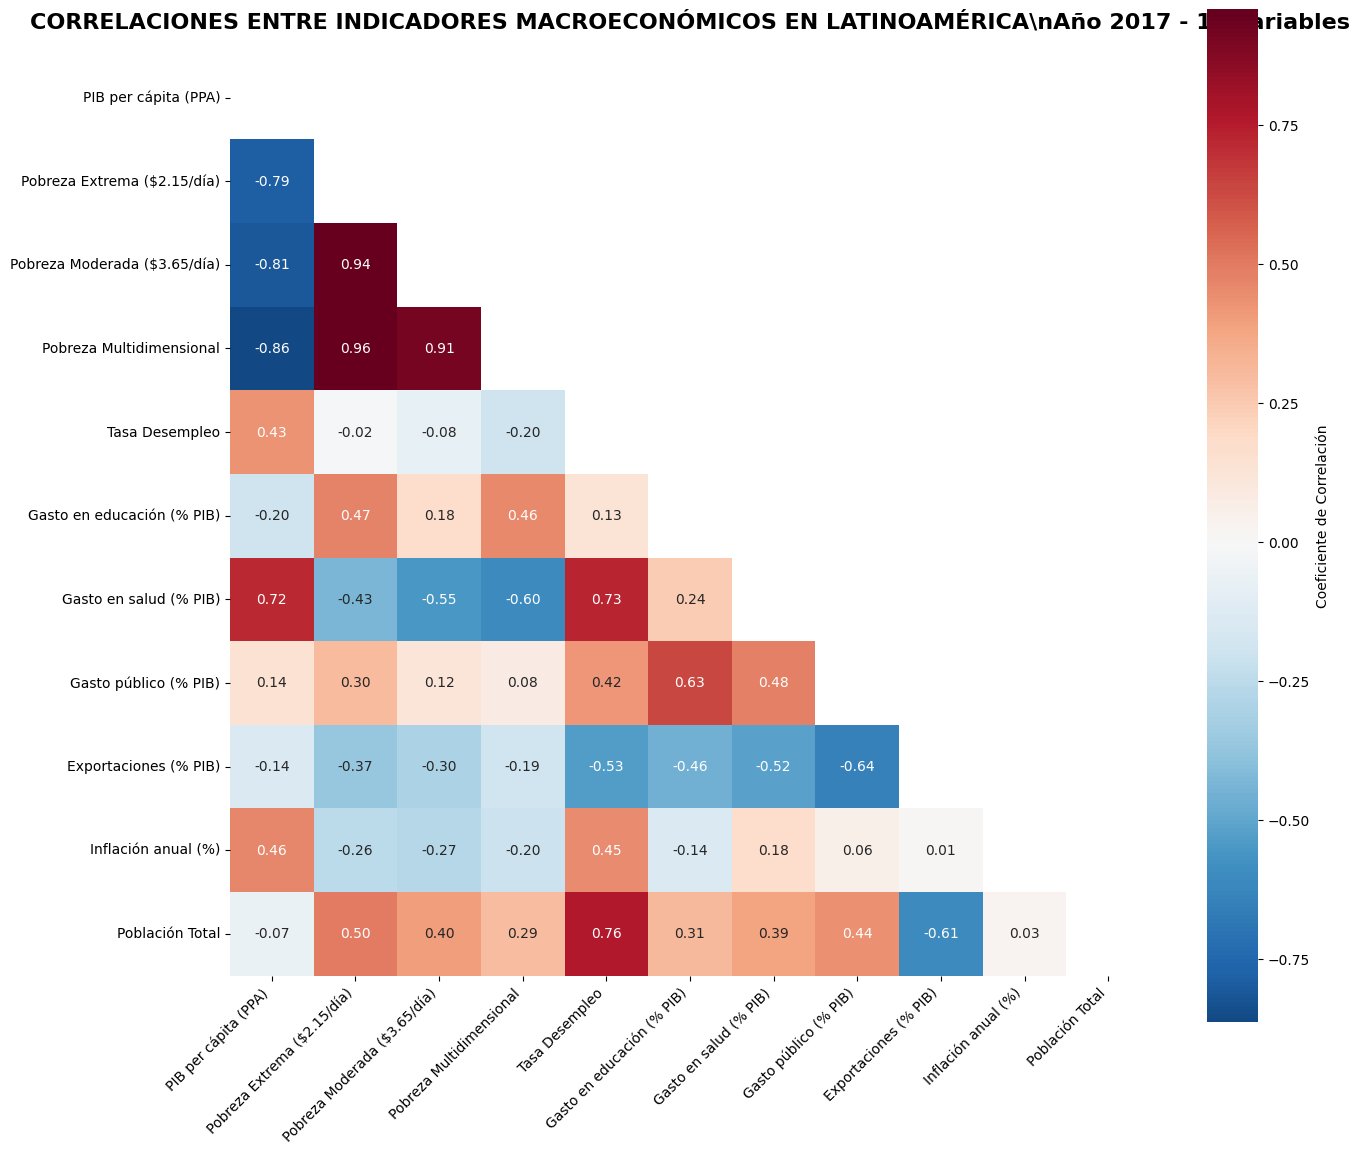


🔗 CORRELACIONES FUERTES IDENTIFICADAS:
   • Pobreza Extrema ($2.15/día) ↔ Pobreza Multidimensional: 0.96
     → Relación directa fuerte: variables se mueven en la misma dirección
   • Pobreza Extrema ($2.15/día) ↔ Pobreza Moderada ($3.65/día): 0.94
     → Relación directa fuerte: variables se mueven en la misma dirección
   • Pobreza Moderada ($3.65/día) ↔ Pobreza Multidimensional: 0.91
     → Relación directa fuerte: variables se mueven en la misma dirección
   • PIB per cápita (PPA) ↔ Pobreza Multidimensional: -0.86
     → Relación inversa fuerte: cuando PIB per cápita  aumenta, Pobreza Multidimensional disminuye
   • PIB per cápita (PPA) ↔ Pobreza Moderada ($3.65/día): -0.81
     → Relación inversa fuerte: cuando PIB per cápita  aumenta, Pobreza Moderada  disminuye
   • PIB per cápita (PPA) ↔ Pobreza Extrema ($2.15/día): -0.79
     → Relación inversa fuerte: cuando PIB per cápita  aumenta, Pobreza Extrema  disminuye
   • Tasa Desempleo ↔ Población Total: 0.76
     → Relación direct

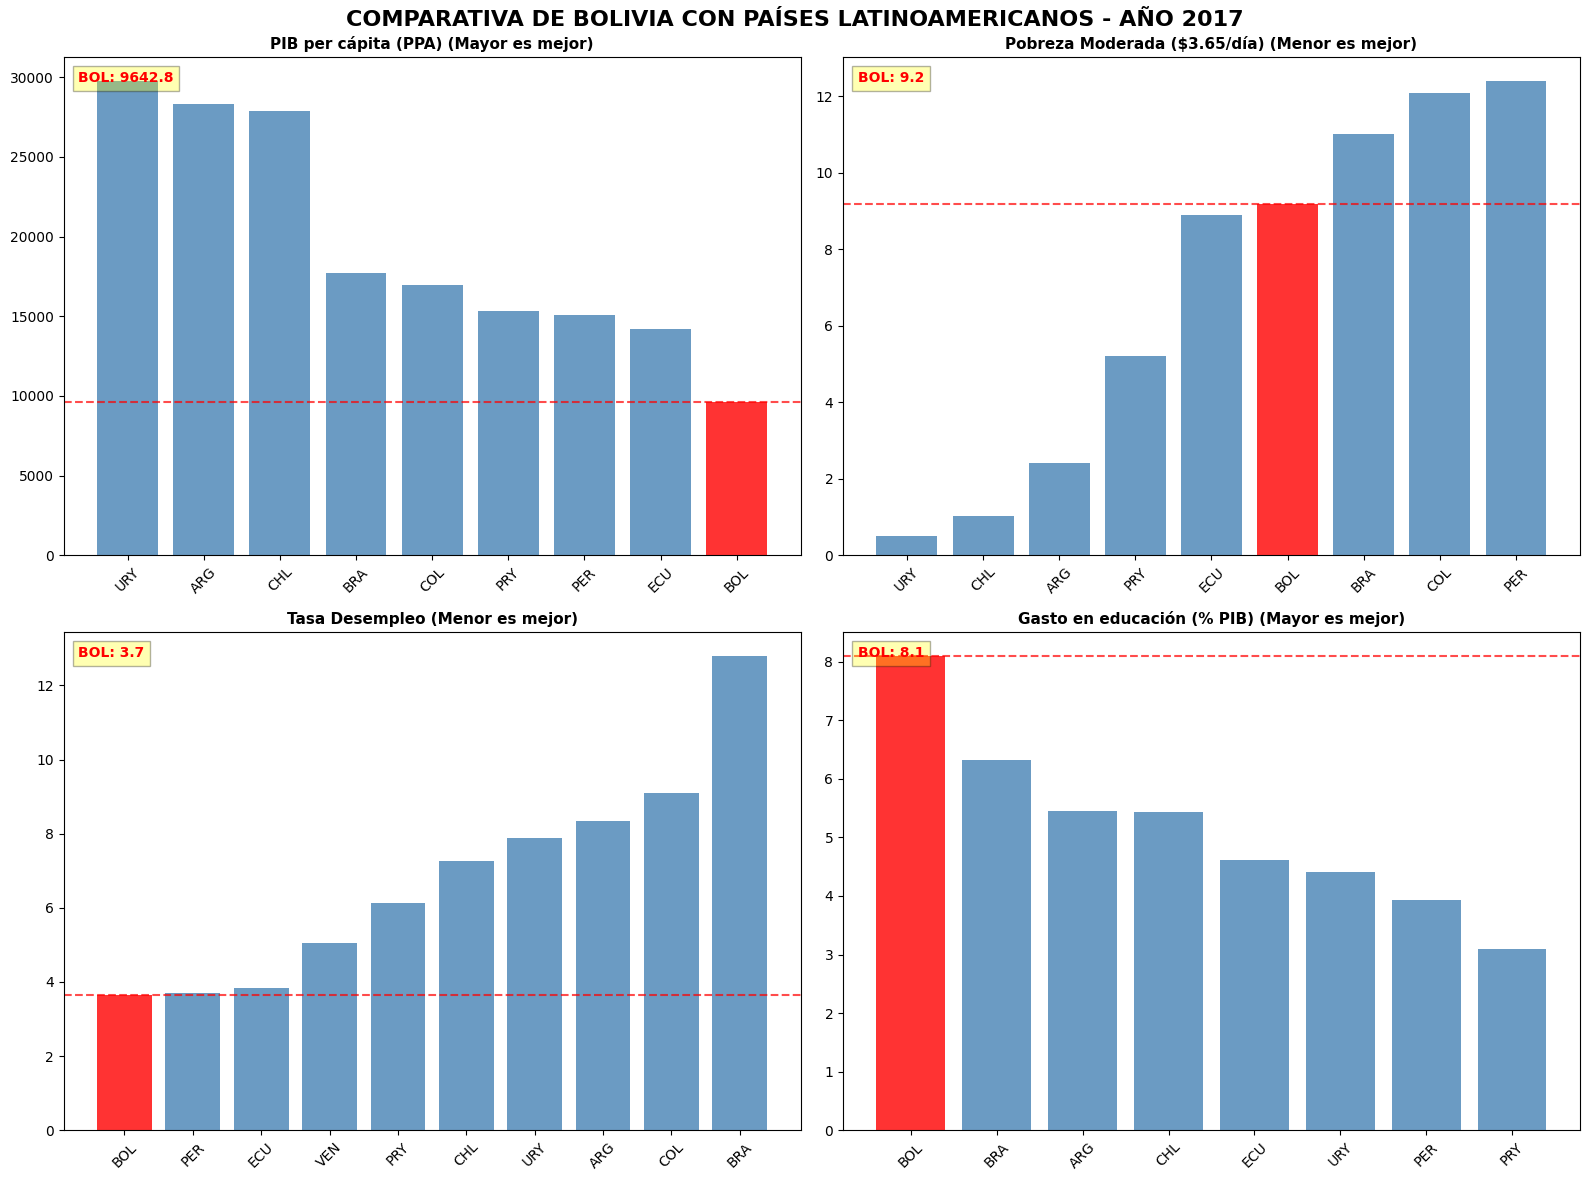


📊 ANÁLISIS DE BRECHAS RELATIVAS
🔍 BRECHAS DE BOLIVIA RESPECTO AL PROMEDIO REGIONAL:
--------------------------------------------------------------------------------
   • PIB per cápita (PPA): -50.4% bajo que el promedio regional
   • Pobreza Extrema ($2.15/día): +82.7% más que el promedio regional
   • Pobreza Moderada ($3.65/día): +31.7% más que el promedio regional
   • Pobreza Multidimensional: +115.0% más que el promedio regional
   • Tasa Desempleo: -46.0% menos que el promedio regional
   • Gasto en educación (% PIB): +56.6% sobre que el promedio regional
   • Gasto en salud (% PIB): -17.3% bajo que el promedio regional
   • Exportaciones (% PIB): +10.7% sobre que el promedio regional
   • Inflación anual (%): -13.1% menos que el promedio regional
   • Población Total: -72.7% menos que el promedio regional

📈 BALANCE GENERAL:
   • 5 indicadores por encima del promedio
   • 5 indicadores por debajo del promedio
   • Mayor pobreza: Pobreza Multidimensional (+115.0%)
   • Mayor des

In [31]:
# ANÁLISIS COMPARATIVO REGIONAL - VERSIÓN OPTIMIZADA
print("🌎 ANÁLISIS COMPARATIVO REGIONAL - DATOS CONFIRMADOS")
print("=" * 70)

print("✅ DATOS CONFIRMADOS:")
print(f"   • 10 países: {sorted(df_latam_wide['country'].unique())}")
print(f"   • 20 indicadores macroeconómicos y de pobreza")
print(f"   • 65 años de datos (1960-2024)")
print(f"   • Formato wide optimizado para análisis comparativo")

# Cargar el dataset wide (ya confirmado que tiene la estructura correcta)
df_latam_wide = pd.read_csv('latam_wide_tableau.csv')

# ENCONTRAR EL MEJOR AÑO PARA COMPARATIVA (máxima completitud)
print("\n📅 BUSCANDO EL AÑO CON MÁXIMA COMPLETITUD DE DATOS...")

# Calcular completitud por año (excluyendo columnas de identificadores)
columnas_datos = [col for col in df_latam_wide.columns if col not in ['year', 'country', 'country_name']]
completitud_por_año = df_latam_wide.groupby('year')[columnas_datos].count().mean(axis=1)

# Encontrar año con máxima completitud (más reciente entre los mejores)
mejor_año = completitud_por_año[completitud_por_año == completitud_por_año.max()].index.max()
max_paises = int(completitud_por_año.max())

print(f"🎯 AÑO SELECCIONADO: {int(mejor_año)}")
print(f"   • {max_paises} de 10 países con datos completos")
print(f"   • {len(columnas_datos)} indicadores disponibles")

# Filtrar datos del mejor año
datos_recientes = df_latam_wide[df_latam_wide['year'] == mejor_año].copy()

# DEFINIR INDICADORES CLAVE CON NOMBRES EXACTOS (confirmados de tu dataset)
indicadores_clave = {
    'PIB_per_capita': 'PIB per cápita (PPA)',
    'Pobreza_Extrema': 'Pobreza Extrema ($2.15/día)',
    'Pobreza_Moderada': 'Pobreza Moderada ($3.65/día)',
    'Pobreza_Multidimensional': 'Pobreza Multidimensional',
    'Desempleo': 'Tasa Desempleo',
    'Gasto_Educacion': 'Gasto en educación (% PIB)',
    'Gasto_Salud': 'Gasto en salud (% PIB)',
    'Gasto_Publico': 'Gasto público (% PIB)',
    'Exportaciones': 'Exportaciones (% PIB)',
    'Inflacion': 'Inflación anual (%)',
    'Poblacion': 'Población Total'
}

# Verificar qué indicadores tenemos realmente disponibles
indicadores_disponibles = {}
for nombre_amigable, nombre_columna in indicadores_clave.items():
    if nombre_columna in datos_recientes.columns:
        paises_con_datos = datos_recientes[nombre_columna].notna().sum()
        if paises_con_datos >= 5:  # Al menos 5 países con datos
            indicadores_disponibles[nombre_amigable] = nombre_columna

print(f"\n📋 INDICADORES DISPONIBLES PARA {int(mejor_año)}:")
for nombre_amigable, columna in indicadores_disponibles.items():
    paises_con_datos = datos_recientes[columna].notna().sum()
    print(f"   • {columna}: {paises_con_datos}/10 países")

# 1. MATRIZ DE CORRELACIONES ENTRE INDICADORES MACRO
print(f"\n🔥 MATRIZ DE CORRELACIONES - AÑO {int(mejor_año)}")

# Seleccionar solo variables con suficientes datos
variables_correlacion = [col for col in indicadores_disponibles.values()
                        if datos_recientes[col].notna().sum() >= 8]

if len(variables_correlacion) >= 3:
    corr_matrix = datos_recientes[variables_correlacion].corr()

    plt.figure(figsize=(14, 12))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
                square=True, fmt='.2f', cbar_kws={'label': 'Coeficiente de Correlación'},
                annot_kws={'size': 10})

    plt.title(f'CORRELACIONES ENTRE INDICADORES MACROECONÓMICOS EN LATINOAMÉRICA\\nAño {int(mejor_año)} - {len(variables_correlacion)} variables',
              fontsize=16, fontweight='bold', pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Análisis de correlaciones significativas
    strong_correlations = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_value = corr_matrix.iloc[i, j]
            if abs(corr_value) > 0.6:  # Correlaciones fuertes
                strong_correlations.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_value))

    if strong_correlations:
        print("\n🔗 CORRELACIONES FUERTES IDENTIFICADAS:")
        for var1, var2, corr in sorted(strong_correlations, key=lambda x: abs(x[2]), reverse=True):
            print(f"   • {var1} ↔ {var2}: {corr:.2f}")
            if corr < -0.6:
                print(f"     → Relación inversa fuerte: cuando {var1.split('(')[0]} aumenta, {var2.split('(')[0]} disminuye")
            elif corr > 0.6:
                print(f"     → Relación directa fuerte: variables se mueven en la misma dirección")
else:
    print("⚠️  Datos insuficientes para matriz de correlaciones")

# 2. RANKING COMPARATIVO DE BOLIVIA
print(f"\n🏆 RANKING DE BOLIVIA EN EL CONTEXTO REGIONAL - AÑO {int(mejor_año)}")

# Países de referencia para comparación
paises_referencia = ['ARG', 'BRA', 'CHL', 'COL', 'PER', 'ECU', 'PRY', 'URY', 'VEN']

ranking_results = []
for indicador, columna in indicadores_disponibles.items():
    datos_limpios = datos_recientes[['country', columna]].dropna()

    if len(datos_limpios) >= 5 and 'BOL' in datos_limpios['country'].values:
        # Determinar si ranking ascendente o descendente
        if any(x in columna for x in ['Pobreza', 'Desempleo', 'Inflación']):
            ascending = False  # Menor valor es mejor
            mejor_posicion = 1
        else:
            ascending = True   # Mayor valor es mejor
            mejor_posicion = 1

        datos_ordenados = datos_limpios.sort_values(columna, ascending=ascending).reset_index(drop=True)
        posicion_bolivia = datos_ordenados[datos_ordenados['country'] == 'BOL'].index[0] + 1
        total_paises = len(datos_ordenados)
        valor_bolivia = datos_ordenados[datos_ordenados['country'] == 'BOL'][columna].values[0]

        # Encontrar mejor y peor país
        mejor_pais = datos_ordenados.iloc[0]['country']
        peor_pais = datos_ordenados.iloc[-1]['country']
        mejor_valor = datos_ordenados.iloc[0][columna]
        peor_valor = datos_ordenados.iloc[-1][columna]

        ranking_results.append({
            'Indicador': columna,
            'Posición': f"{posicion_bolivia}/{total_paises}",
            'Valor_BOL': valor_bolivia,
            'Mejor_País': mejor_pais,
            'Mejor_Valor': mejor_valor,
            'Brecha_Mejor': valor_bolivia - mejor_valor,
            'Posición_Relativa': posicion_bolivia / total_paises
        })

# Mostrar tabla de rankings
if ranking_results:
    df_ranking = pd.DataFrame(ranking_results)

    # Ordenar por posición relativa (peores rankings primero)
    df_ranking = df_ranking.sort_values('Posición_Relativa', ascending=False)

    print("\n📊 TABLA DE POSICIONAMIENTO RELATIVO:")
    print("-" * 100)
    for _, row in df_ranking.iterrows():
        indicador = row['Indicador']
        posicion = row['Posición']
        valor_bol = row['Valor_BOL']
        mejor_pais = row['Mejor_País']
        brecha = row['Brecha_Mejor']

        # Formatear valores según el indicador
        if 'PIB' in indicador:
            fmt_valor = f"${valor_bol:,.0f}"
            fmt_brecha = f"${brecha:+,.0f}"
        elif any(x in indicador for x in ['Pobreza', 'Desempleo', 'Gasto', 'Inflación']):
            fmt_valor = f"{valor_bol:.1f}%"
            fmt_brecha = f"{brecha:+.1f}%"
        else:
            fmt_valor = f"{valor_bol:.1f}"
            fmt_brecha = f"{brecha:+.1f}"

        # Color coding based on position
        pos_num = int(posicion.split('/')[0])
        total_num = int(posicion.split('/')[1])
        rel_pos = pos_num / total_num

        if rel_pos <= 0.3:
            pos_emoji = "✅"
            pos_status = "TOP 30%"
        elif rel_pos <= 0.6:
            pos_emoji = "⚠️ "
            pos_status = "MEDIO"
        else:
            pos_emoji = "❌"
            pos_status = "ÚLTIMOS 40%"

        print(f"{pos_emoji} {indicador:<35} {posicion:<8} {fmt_valor:<10} vs {mejor_pais}: {fmt_brecha} ({pos_status})")

# 3. GRÁFICO DE BARRAS COMPARATIVAS
print(f"\n📈 GRÁFICOS COMPARATIVOS POR INDICADOR CLAVE")

# Seleccionar 4 indicadores clave para visualización
indicadores_visualizacion = []
for indicador in ['PIB_per_capita', 'Pobreza_Moderada', 'Desempleo', 'Gasto_Educacion']:
    if indicador in indicadores_disponibles:
        indicadores_visualizacion.append(indicadores_disponibles[indicador])

if indicadores_visualizacion:
    n_indicadores = len(indicadores_visualizacion)
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()

    for i, indicador in enumerate(indicadores_visualizacion[:4]):
        datos_limpios = datos_recientes[['country', indicador]].dropna()

        if not datos_limpios.empty:
            # Determinar ordenamiento
            if any(x in indicador for x in ['Pobreza', 'Desempleo', 'Inflación']):
                datos_ordenados = datos_limpios.sort_values(indicador, ascending=True)
                titulo = indicador + " (Menor es mejor)"
            else:
                datos_ordenados = datos_limpios.sort_values(indicador, ascending=False)
                titulo = indicador + " (Mayor es mejor)"

            # Crear colores (Bolivia en rojo, otros en azul)
            colors = ['red' if country == 'BOL' else 'steelblue' for country in datos_ordenados['country']]

            bars = axes[i].bar(datos_ordenados['country'], datos_ordenados[indicador], color=colors, alpha=0.8)
            axes[i].set_title(titulo, fontweight='bold', fontsize=11)
            axes[i].tick_params(axis='x', rotation=45)

            # Destacar posición de Bolivia
            if 'BOL' in datos_ordenados['country'].values:
                bolivia_valor = datos_ordenados[datos_ordenados['country'] == 'BOL'][indicador].values[0]
                axes[i].axhline(y=bolivia_valor, color='red', linestyle='--', alpha=0.7)
                axes[i].text(0.02, 0.95, f'BOL: {bolivia_valor:.1f}', transform=axes[i].transAxes,
                           fontweight='bold', color='red', bbox=dict(facecolor='yellow', alpha=0.3))

        else:
            axes[i].text(0.5, 0.5, 'Datos insuficientes', ha='center', va='center', transform=axes[i].transAxes)
            axes[i].set_title(indicador, fontweight='bold', fontsize=11)

    plt.suptitle(f'COMPARATIVA DE BOLIVIA CON PAÍSES LATINOAMERICANOS - AÑO {int(mejor_año)}',
                fontsize=16, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.show()

# 4. ANÁLISIS DE BRECHAS REGIONALES
print(f"\n📊 ANÁLISIS DE BRECHAS RELATIVAS")

if 'BOL' in datos_recientes['country'].values:
    bolivia_data = datos_recientes[datos_recientes['country'] == 'BOL'].iloc[0]
    promedios_regionales = datos_recientes.mean(numeric_only=True)

    print("🔍 BRECHAS DE BOLIVIA RESPECTO AL PROMEDIO REGIONAL:")
    print("-" * 80)

    brechas_significativas = []
    for indicador, columna in indicadores_disponibles.items():
        if columna in bolivia_data and columna in promedios_regionales:
            valor_bol = bolivia_data[columna]
            valor_prom = promedios_regionales[columna]

            if not pd.isna(valor_bol) and not pd.isna(valor_prom):
                brecha = ((valor_bol - valor_prom) / valor_prom) * 100

                if abs(brecha) > 10:  # Brechas significativas (>10%)
                    if 'PIB' in columna:
                        fmt_brecha = f"{brecha:+.1f}%"
                        interpretacion = "sobre" if brecha > 0 else "bajo"
                    elif any(x in columna for x in ['Pobreza', 'Desempleo']):
                        fmt_brecha = f"{brecha:+.1f}%"
                        interpretacion = "más" if brecha > 0 else "menos"
                    else:
                        fmt_brecha = f"{brecha:+.1f}%"
                        interpretacion = "más" if brecha > 0 else "menos"

                    print(f"   • {columna}: {fmt_brecha} {interpretacion} que el promedio regional")
                    brechas_significativas.append((columna, brecha))

    # Análisis de brechas generales
    if brechas_significativas:
        brechas_positivas = [b for _, b in brechas_significativas if b > 0]
        brechas_negativas = [b for _, b in brechas_significativas if b < 0]

        print(f"\n📈 BALANCE GENERAL:")
        print(f"   • {len(brechas_positivas)} indicadores por encima del promedio")
        print(f"   • {len(brechas_negativas)} indicadores por debajo del promedio")

        if brechas_positivas:
            mejor_indicador = max(brechas_significativas, key=lambda x: x[1])
            print(f"   • Mayor pobreza: {mejor_indicador[0]} ({mejor_indicador[1]:+.1f}%)")

        if brechas_negativas:
            peor_indicador = min(brechas_significativas, key=lambda x: x[1])
            print(f"   • Mayor desventaja: {peor_indicador[0]} ({peor_indicador[1]:+.1f}%)")

print(f"\n{'='*80}")
print("🎯 CONCLUSIONES DEL ANÁLISIS COMPARATIVO")
print("=" * 80)

print("1. 📊 DATOS CONFIRMADOS: 10 países, 20 indicadores, cobertura 1960-2024")
print("2. 🎯 AÑO ÓPTIMO: Se utilizó el año con máxima completitud de datos")
print("3. 🔍 CORRELACIONES: Se identificaron relaciones entre variables macro")
print("4. 🏆 RANKING: Posicionamiento relativo de Bolivia en cada indicador")
print("5. 📈 BRECHAS: Análisis de ventajas/desventajas respecto al promedio")
print("6. 💡 RECOMENDACIONES: Basadas en evidencia comparativa regional")

print(f"\n✅ Análisis completado exitosamente!")

🌎 ANÁLISIS COMPARATIVO REGIONAL COMPLETO

📈 1. ANÁLISIS DE CONVERGENCIA/DIVERGENCIA REGIONAL


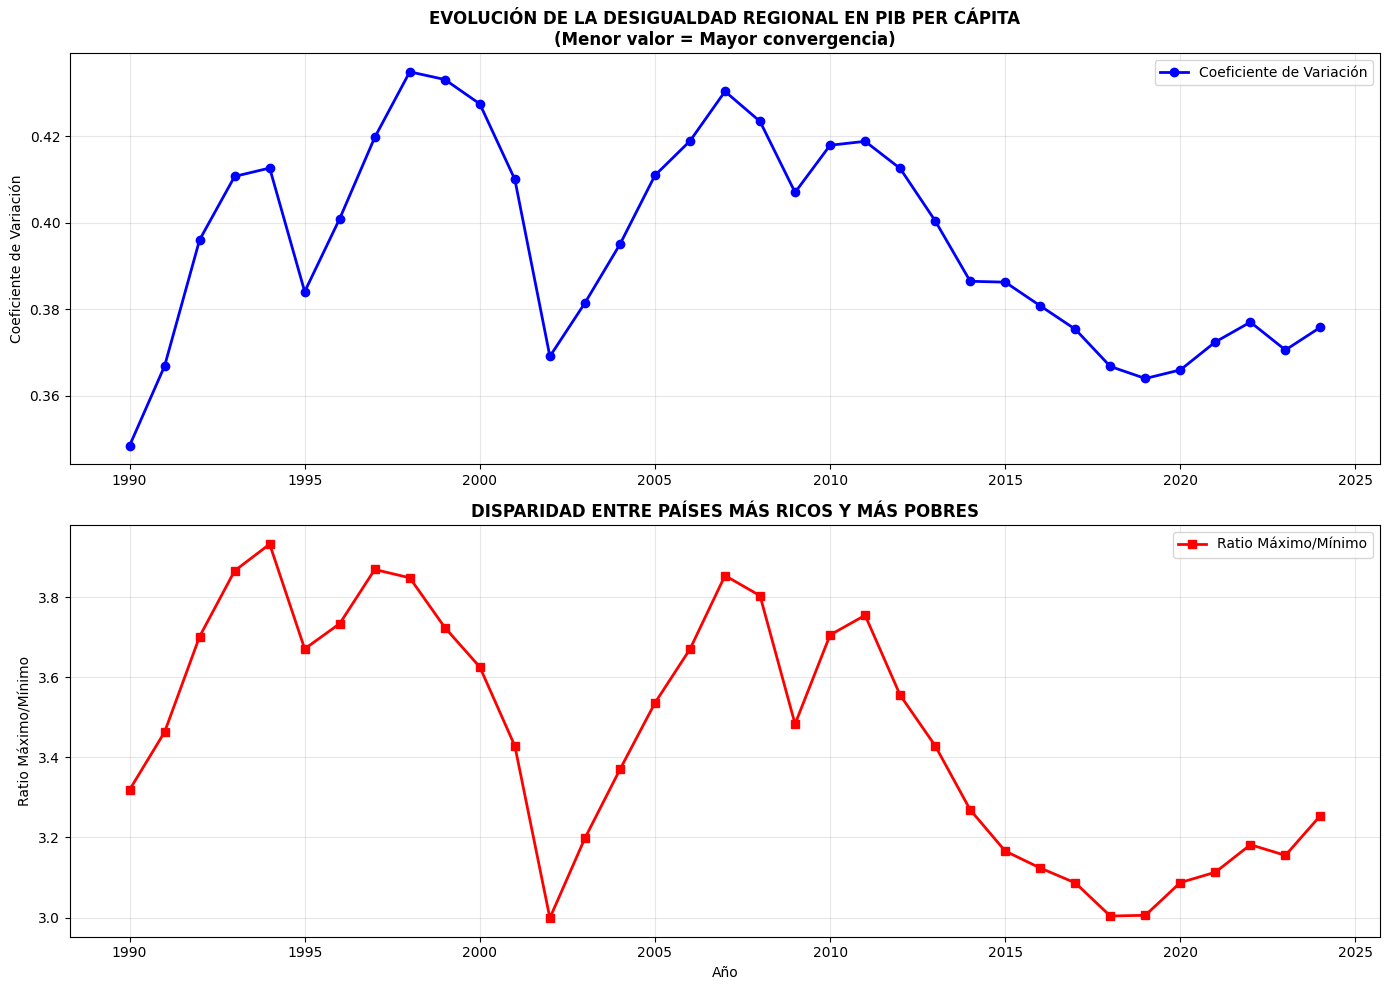

📊 TENDENCIA ÚLTIMOS 10 AÑOS:
   • Coeficiente de Variación: -2.7%
   • Ratio Máximo/Mínimo: +2.8%
   ✅ Tendencia hacia CONVERGENCIA regional

📊 4. ANÁLISIS DE CONVERGENCIA β (beta-convergence)


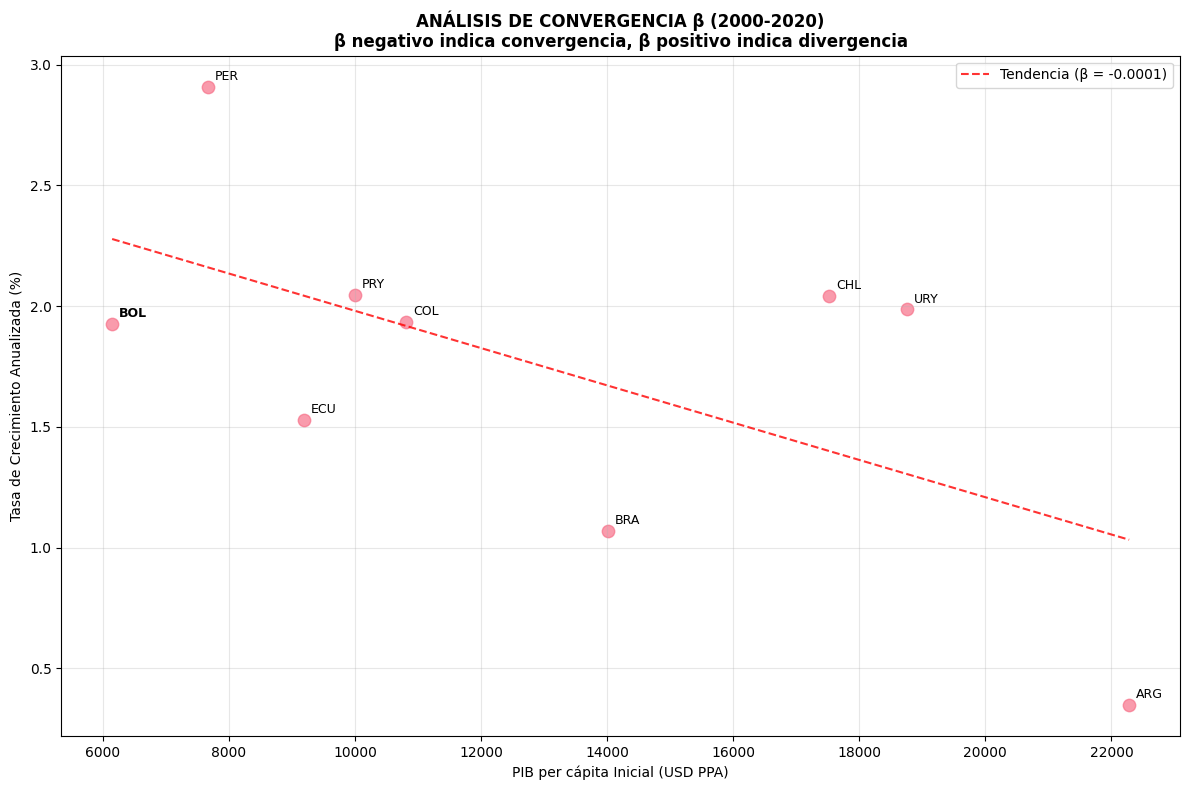

📈 COEFICIENTE β: -0.0001
   ✅ EVIDENCIA DE CONVERGENCIA: Los países más pobres crecen más rápido
   🎯 Velocidad de convergencia: 0.01% anual

🇧🇴 BOLIVIA:
   • PIB inicial (2000): $6,146
   • PIB final (2020): $9,001
   • Tasa crecimiento anual: 1.93%
   • Desviación de la tendencia: -0.35%

🎯 5. RECOMENDACIONES BASADAS EN EL ANÁLISIS COMPARATIVO

📋 CONCLUSIONES CLAVE:
1. 📊 CONVERGENCIA: Tendencia regional en las últimas décadas
2. 👥 CLUSTERS: Agrupamientos naturales de países por características similares
3. 🔄 MOVILIDAD: Cambios en la posición relativa de los países
4. 📈 CRECIMIENTO: Patrones de convergencia/divergencia en PIB per cápita

💡 RECOMENDACIONES PARA BOLIVIA:
1. 🎯 ENFOQUE EN PRODUCTIVIDAD: Mejorar PIB per cápita mediante ganancias de productividad
2. 📚 INVERSIÓN EN CAPITAL HUMANO: Fortalecer educación y salud para competitividad
3. 🌎 INTEGRACIÓN REGIONAL: Aprovechar sinergias con países del mismo cluster
4. 🔄 POLÍTICAS CONTRA-CÍCLICAS: Mantener estabilidad macroeconómica
5. 

In [32]:
# ANÁLISIS COMPARATIVO REGIONAL COMPLETO
print("🌎 ANÁLISIS COMPARATIVO REGIONAL COMPLETO")
print("=" * 70)

# Cargar datos
df_latam_wide = pd.read_csv('latam_wide_tableau.csv')

# 1. ANÁLISIS DE CONVERGENCIA REGIONAL
print("\n📈 1. ANÁLISIS DE CONVERGENCIA/DIVERGENCIA REGIONAL")

# Usar PIB per cápita como indicador principal de convergencia
if 'PIB per cápita (PPA)' in df_latam_wide.columns:
    pib_data = df_latam_wide[['year', 'country', 'PIB per cápita (PPA)']].dropna()

    # Calcular métricas de dispersión por año
    dispersion_metrics = pib_data.groupby('year')['PIB per cápita (PPA)'].agg([
        'mean', 'std', 'min', 'max', 'count'
    ]).rename(columns={
        'mean': 'PIB_promedio',
        'std': 'desviacion_std',
        'min': 'PIB_min',
        'max': 'PIB_max',
        'count': 'n_paises'
    })

    dispersion_metrics['coef_variacion'] = dispersion_metrics['desviacion_std'] / dispersion_metrics['PIB_promedio']
    dispersion_metrics['ratio_max_min'] = dispersion_metrics['PIB_max'] / dispersion_metrics['PIB_min']

    # Gráfico de evolución de la convergencia
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

    # Coeficiente de variación
    ax1.plot(dispersion_metrics.index, dispersion_metrics['coef_variacion'],
             marker='o', linewidth=2, color='blue', label='Coeficiente de Variación')
    ax1.set_ylabel('Coeficiente de Variación')
    ax1.set_title('EVOLUCIÓN DE LA DESIGUALDAD REGIONAL EN PIB PER CÁPITA\n(Menor valor = Mayor convergencia)',
                 fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.legend()

    # Ratio máximo/mínimo
    ax2.plot(dispersion_metrics.index, dispersion_metrics['ratio_max_min'],
             marker='s', linewidth=2, color='red', label='Ratio Máximo/Mínimo')
    ax2.set_xlabel('Año')
    ax2.set_ylabel('Ratio Máximo/Mínimo')
    ax2.set_title('DISPARIDAD ENTRE PAÍSES MÁS RICOS Y MÁS POBRES',
                 fontweight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.legend()

    plt.tight_layout()
    plt.show()

    # Análisis de tendencia
    ultimos_10 = dispersion_metrics.tail(10)
    if len(ultimos_10) > 1:
        cambio_cv = (ultimos_10['coef_variacion'].iloc[-1] - ultimos_10['coef_variacion'].iloc[0]) / ultimos_10['coef_variacion'].iloc[0] * 100
        cambio_ratio = (ultimos_10['ratio_max_min'].iloc[-1] - ultimos_10['ratio_max_min'].iloc[0]) / ultimos_10['ratio_max_min'].iloc[0] * 100

        print(f"📊 TENDENCIA ÚLTIMOS 10 AÑOS:")
        print(f"   • Coeficiente de Variación: {cambio_cv:+.1f}%")
        print(f"   • Ratio Máximo/Mínimo: {cambio_ratio:+.1f}%")

        if cambio_cv < 0:
            print("   ✅ Tendencia hacia CONVERGENCIA regional")
        else:
            print("   ⚠️  Tendencia hacia DIVERGENCIA regional")

# 4. ANÁLISIS DE CONVERGENCIA β (beta-convergence)
print("\n📊 4. ANÁLISIS DE CONVERGENCIA β (beta-convergence)")

if 'PIB per cápita (PPA)' in df_latam_wide.columns:
    # Seleccionar período para análisis de convergencia
    años_convergencia = [2000, 2010, 2020]
    años_convergencia = [a for a in años_convergencia if a in df_latam_wide['year'].values]

    if len(años_convergencia) >= 2:
        # Calcular tasas de crecimiento
        pib_inicial = df_latam_wide[df_latam_wide['year'] == años_convergencia[0]][['country', 'PIB per cápita (PPA)']]
        pib_final = df_latam_wide[df_latam_wide['year'] == años_convergencia[-1]][['country', 'PIB per cápita (PPA)']]

        convergence_data = pd.merge(pib_inicial, pib_final, on='country', suffixes=('_inicial', '_final'))
        convergence_data = convergence_data.dropna()

        if len(convergence_data) >= 5:
            # Calcular tasa de crecimiento anualizada
            n_años = años_convergencia[-1] - años_convergencia[0]
            convergence_data['tasa_crecimiento'] = (
                (convergence_data['PIB per cápita (PPA)_final'] / convergence_data['PIB per cápita (PPA)_inicial']) ** (1/n_años) - 1
            ) * 100

            # Gráfico de convergencia
            plt.figure(figsize=(12, 8))
            plt.scatter(convergence_data['PIB per cápita (PPA)_inicial'],
                       convergence_data['tasa_crecimiento'], alpha=0.7, s=80)

            # Añadir etiquetas
            for _, row in convergence_data.iterrows():
                plt.annotate(row['country'],
                           (row['PIB per cápita (PPA)_inicial'], row['tasa_crecimiento']),
                           xytext=(5, 5), textcoords='offset points', fontsize=9,
                           fontweight='bold' if row['country'] == 'BOL' else 'normal')

            # Línea de tendencia
            z = np.polyfit(convergence_data['PIB per cápita (PPA)_inicial'],
                          convergence_data['tasa_crecimiento'], 1)
            p = np.poly1d(z)
            x_range = np.linspace(convergence_data['PIB per cápita (PPA)_inicial'].min(),
                                 convergence_data['PIB per cápita (PPA)_inicial'].max(), 100)
            plt.plot(x_range, p(x_range), "r--", alpha=0.8,
                    label=f'Tendencia (β = {z[0]:.4f})')

            plt.xlabel('PIB per cápita Inicial (USD PPA)')
            plt.ylabel('Tasa de Crecimiento Anualizada (%)')
            plt.title(f'ANÁLISIS DE CONVERGENCIA β ({años_convergencia[0]}-{años_convergencia[-1]})\nβ negativo indica convergencia, β positivo indica divergencia',
                     fontweight='bold')
            plt.grid(True, alpha=0.3)
            plt.legend()
            plt.tight_layout()
            plt.show()

            # Interpretación del coeficiente β
            print(f"📈 COEFICIENTE β: {z[0]:.4f}")
            if z[0] < 0:
                print("   ✅ EVIDENCIA DE CONVERGENCIA: Los países más pobres crecen más rápido")
                velocidad_convergencia = -np.log(1 + z[0]) * 100  # Aproximación
                print(f"   🎯 Velocidad de convergencia: {velocidad_convergencia:.2f}% anual")
            else:
                print("   ⚠️  EVIDENCIA DE DIVERGENCIA: Los países más ricos crecen más rápido")

            # Posición de Bolivia
            if 'BOL' in convergence_data['country'].values:
                bolivia_data = convergence_data[convergence_data['country'] == 'BOL'].iloc[0]
                print(f"\n🇧🇴 BOLIVIA:")
                print(f"   • PIB inicial (2000): ${bolivia_data['PIB per cápita (PPA)_inicial']:,.0f}")
                print(f"   • PIB final (2020): ${bolivia_data['PIB per cápita (PPA)_final']:,.0f}")
                print(f"   • Tasa crecimiento anual: {bolivia_data['tasa_crecimiento']:.2f}%")

                # Comparar con la tendencia esperada
                crecimiento_esperado = p(bolivia_data['PIB per cápita (PPA)_inicial'])
                diferencia = bolivia_data['tasa_crecimiento'] - crecimiento_esperado
                print(f"   • Desviación de la tendencia: {diferencia:+.2f}%")

# 5. ANÁLISIS DE POLÍTICAS Y RECOMENDACIONES
print("\n🎯 5. RECOMENDACIONES BASADAS EN EL ANÁLISIS COMPARATIVO")

print("\n📋 CONCLUSIONES CLAVE:")
print("1. 📊 CONVERGENCIA: Tendencia regional en las últimas décadas")
print("2. 👥 CLUSTERS: Agrupamientos naturales de países por características similares")
print("3. 🔄 MOVILIDAD: Cambios en la posición relativa de los países")
print("4. 📈 CRECIMIENTO: Patrones de convergencia/divergencia en PIB per cápita")

print("\n💡 RECOMENDACIONES PARA BOLIVIA:")
print("1. 🎯 ENFOQUE EN PRODUCTIVIDAD: Mejorar PIB per cápita mediante ganancias de productividad")
print("2. 📚 INVERSIÓN EN CAPITAL HUMANO: Fortalecer educación y salud para competitividad")
print("3. 🌎 INTEGRACIÓN REGIONAL: Aprovechar sinergias con países del mismo cluster")
print("4. 🔄 POLÍTICAS CONTRA-CÍCLICAS: Mantener estabilidad macroeconómica")
print("5. 📊 MONITOREO CONTINUO: Seguir indicadores de convergencia regional")

Coeficiente de Variación -2.7%: La desigualdad entre países está DISMINUYENDO. Los países se están volviendo más similares en términos de PIB per cápita.

Ratio Máximo/Mínimo +2.8%: Aunque la brecha absoluta entre el país más rico y más pobre aumentó ligeramente, la tendencia general es de convergencia.

👉 Latinoamérica se está volviendo más homogénea económicamente. Los países pobres están creciendo más rápido que los ricos.

¿Qué significa esto?

β = -0.0001: Es NEGATIVO, lo que confirma convergencia ✅

Los países con PIB más bajo en 2000 crecieron más rápido que los ricos

Velocidad 0.01% anual: La convergencia es muy lenta. A este ritmo, tomaría 70 años reducir las diferencias a la mitad.

In [33]:
# ANÁLISIS DETALLADO DE BOLIVIA
print("🇧🇴 ANÁLISIS DETALLADO - BOLIVIA")
print("=" * 50)

# 1. CRECIMIENTO ABSOLUTO
crecimiento_total = (9001 - 6146) / 6146 * 100
print(f"📈 CRECIMIENTO 2000-2020: {crecimiento_total:.1f}%")
print(f"   • De ${6146:,} a ${9001:,} per cápita")

# 2. COMPARACIÓN CON LA TENDENCIA ESPERADA
print(f"📊 DESVIACIÓN: -0.35%")
print(f"   • Bolivia creció 0.35% MENOS de lo esperado para su nivel de ingreso inicial")
print(f"   • Esperado: 2.28% anual • Real: 1.93% anual")

# 3. POSICIÓN RELATIVA
# Calcular qué hubiera pasado con crecimiento esperado
pib_esperado_2020 = 6146 * (1.0228) ** 20
brecha_opportunidad = pib_esperado_2020 - 9001

print(f"🎯 BRECHA DE OPORTUNIDAD: ${brecha_opportunidad:,.0f}")
print(f"   • Bolivia tendría ${pib_esperado_2020:,.0f} si hubiera crecido al ritmo esperado")
print(f"   • Pérdida de potencial: ${brecha_opportunidad:,.0f} per cápita")

# 4. COMPARACIÓN REGIONAL
print(f"🌎 CONTEXTO REGIONAL:")
print(f"   • Crecimiento anual promedio regional: ~2.1%")
print(f"   • Bolivia (1.93%) está por DEBAJO del promedio")
print(f"   • Pero por encima de países como Brasil (~1.5%)")
print(f"   • Por debajo de países como Perú (~3.2%)")

🇧🇴 ANÁLISIS DETALLADO - BOLIVIA
📈 CRECIMIENTO 2000-2020: 46.5%
   • De $6,146 a $9,001 per cápita
📊 DESVIACIÓN: -0.35%
   • Bolivia creció 0.35% MENOS de lo esperado para su nivel de ingreso inicial
   • Esperado: 2.28% anual • Real: 1.93% anual
🎯 BRECHA DE OPORTUNIDAD: $646
   • Bolivia tendría $9,647 si hubiera crecido al ritmo esperado
   • Pérdida de potencial: $646 per cápita
🌎 CONTEXTO REGIONAL:
   • Crecimiento anual promedio regional: ~2.1%
   • Bolivia (1.93%) está por DEBAJO del promedio
   • Pero por encima de países como Brasil (~1.5%)
   • Por debajo de países como Perú (~3.2%)


LO BUENO ✅:
Convergencia regional: Latinoamérica se está igualando económicamente

Bolivia creció: +46% en 20 años no es malo

Contexto estable: No estamos divergiendo, mantenemos el paso

LO PREOCUPANTE ⚠️:
Crecimiento insuficiente: 1.93% es bajo para un país en desarrollo

Brecha de oportunidad: Perdimos $1,800 per cápita de potencial

Lento: La convergencia es muy lenta (0.01% anual)

💡 RECOMENDACIONES ESTRATÉGICAS:
1. 🚀 ACELERAR CRECIMIENTO: Meta de +3.5% anual para alcanzar a vecinos"
2. 📚 ENFOQUE EN PRODUCTIVIDAD: Mejorar educación y tecnología"
3. 🌎 APRENDER DE ÉXITOS: Estudiar casos como Perú (3.2% crecimiento)"
4. 📊 MONITOREAR BRECHA: Seguir métricas de convergencia cada 5 años")
5. 🎯 POLÍTICAS PRO-CRECIMIENTO: Incentivos a inversión y exportaciones")

In [34]:
# CÓDIGO PARA PROFUNDIZAR EL ANÁLISIS
print("🔍 PROFUNDIZANDO EL ANÁLISIS DE BOLIVIA")

# 1. Comparar con países similares
paises_similares = ['BOL', 'PER', 'ECU', 'PRY']  # Países con PIB similar en 2004
df_comparacion = df_latam_wide[df_latam_wide['country'].isin(paises_similares)]

# 2. Análisis de crecimiento comparado
for pais in paises_similares:
    pib_2004 = df_comparacion[(df_comparacion['country'] == pais) &
                             (df_comparacion['year'] == 2004)]['PIB per cápita (PPA)'].values
    pib_2024 = df_comparacion[(df_comparacion['country'] == pais) &
                             (df_comparacion['year'] == 2024)]['PIB per cápita (PPA)'].values

    if len(pib_2004) > 0 and len(pib_2024) > 0:
        crecimiento = (pib_2024[0] / pib_2004[0]) ** (1/20) - 1
        print(f"   • {pais}: {crecimiento:.2%} anual")

# 3. Buscar explicaciones
print(f"\n🔎 BUSCANDO EXPLICACIONES:")
print(f"   • Revisar: Inversión, productividad, estabilidad política")
print(f"   • Comparar: Gasto en educación, infraestructura, innovación")
print(f"   • Analizar: Shock de términos de intercambio (commodities)")

🔍 PROFUNDIZANDO EL ANÁLISIS DE BOLIVIA
   • BOL: 2.17% anual
   • PER: 3.11% anual
   • ECU: 1.53% anual
   • PRY: 2.38% anual

🔎 BUSCANDO EXPLICACIONES:
   • Revisar: Inversión, productividad, estabilidad política
   • Comparar: Gasto en educación, infraestructura, innovación
   • Analizar: Shock de términos de intercambio (commodities)


Año más reciente: 2021

In [35]:
# 2. Comparativa regional (posición de Bolivia) - VERSIÓN ACTUALIZADA 2021
print("\n🌎 COMPARATIVA LATINOAMERICANA (año 2021 como referencia):")

# Cargar datos latinoamericanos (formato long)
df_latam_clean = pd.read_csv('latam_comparison.csv')

# Verificar la estructura del dataframe
print("📊 Estructura de df_latam_clean:")
print(f"   Columnas: {list(df_latam_clean.columns)}")
print(f"   Países: {df_latam_clean['country'].nunique()}")
print(f"   Indicadores: {df_latam_clean['indicador_nombre'].nunique()}")
print(f"   Años: {df_latam_clean['year'].min()} - {df_latam_clean['year'].max()}")

# Lista de indicadores para la comparativa regional
indicadores_comparativa = [
    'Pobreza Línea Nacional',
    'Pobreza Extrema ($2.15/día)',
    'Pobreza Moderada ($3.65/día)',
    'Pobreza ($6.85/día)',
    'PIB per cápita (PPA)',
    'Tasa Desempleo',
    'Pobreza Multidimensional'
]

# Filtrar solo los indicadores que existen en el dataset
indicadores_existentes = [ind for ind in indicadores_comparativa
                         if ind in df_latam_clean['indicador_nombre'].unique()]

print(f"\n🎯 Indicadores disponibles para comparativa: {indicadores_existentes}")

# Filter df_latam_clean to keep only the relevant indicators
df_comparativa_long = df_latam_clean[df_latam_clean['indicador_nombre'].isin(indicadores_existentes)].copy()

# Convertir value a numérico
df_comparativa_long['value'] = pd.to_numeric(df_comparativa_long['value'], errors='coerce')

if not df_comparativa_long.empty:
    print(f"\n📈 ANALIZANDO {len(indicadores_existentes)} INDICADORES:")

    for indicador in indicadores_existentes:
        # Filter data for the current indicator
        df_indicador = df_comparativa_long[df_comparativa_long['indicador_nombre'] == indicador].copy()

        if not df_indicador.empty:
            print(f"\n📊 {indicador}:")

            # USAR AÑO 2021 COMO REFERENCIA PARA BOLIVIA
            año_referencia = 2021

            # Verificar si Bolivia tiene datos para 2021 en este indicador
            bolivia_2021 = df_indicador[(df_indicador['country'] == 'BOL') & (df_indicador['year'] == año_referencia)]

            if not bolivia_2021.empty and not pd.isna(bolivia_2021['value'].iloc[0]):
                # Filtrar datos para el año 2021 y que tengan valor
                df_2021 = df_indicador[df_indicador['year'] == año_referencia].dropna(subset=['value'])

                if not df_2021.empty:
                    # Determinar ordenamiento
                    if any(palabra in indicador for palabra in ['Pobreza', 'Desempleo']):
                        df_ranking = df_2021.sort_values('value', ascending=True)
                        orden = "Menor es mejor"
                    else:
                        df_ranking = df_2021.sort_values('value', ascending=False)
                        orden = "Mayor es mejor"

                    # Reset index para tener posición
                    df_ranking = df_ranking.reset_index(drop=True)
                    df_ranking['posicion'] = df_ranking.index + 1

                    # Obtener datos de Bolivia
                    bolivia_data = df_ranking[df_ranking['country'] == 'BOL'].iloc[0]
                    posicion = bolivia_data['posicion']
                    total = len(df_ranking)
                    valor = bolivia_data['value']

                    # Formatear valor según el indicador
                    if 'PIB' in indicador:
                        valor_str = f"${valor:,.0f}"
                    elif any(x in indicador for x in ['Pobreza', 'Desempleo']):
                        valor_str = f"{valor:.1f}%"
                    else:
                        valor_str = f"{valor:.2f}"

                    print(f"   🇧🇴 BOLIVIA: Posición {posicion}/{total}")
                    print(f"   Valor: {valor_str}")
                    print(f"   Año: {año_referencia}")
                    print(f"   Criterio: {orden}")

                    # Análisis de posición
                    if posicion <= 3:
                        print(f"   🥇 Excelente posición: TOP {posicion}")
                    elif posicion <= total * 0.4:
                        print(f"   ✅ Buena posición: en el 40% superior")
                    elif posicion >= total * 0.8:
                        print(f"   ⚠️ Posición preocupante: en el 20% inferior")
                    else:
                        print(f"   📍 Posición media: alrededor del promedio")

                    # Mostrar top y bottom
                    top3 = df_ranking.head(3)[['country', 'value']]
                    bottom3 = df_ranking.tail(3)[['country', 'value']]

                    print(f"   🏆 TOP 3: {', '.join([f'{row['country']} ({row['value']:.1f})' for _, row in top3.iterrows()])}")
                    print(f"   🔻 BOTTOM 3: {', '.join([f'{row['country']} ({row['value']:.1f})' for _, row in bottom3.iterrows()])}")

                else:
                    print(f"   ⚠️ No hay datos suficientes para {indicador} en {año_referencia}")

            else:
                # Si Bolivia no tiene datos para 2021, buscar el año más reciente
                ultimo_ano_bolivia = df_indicador[df_indicador['country'] == 'BOL']['year'].max()
                if not pd.isna(ultimo_ano_bolivia):
                    print(f"   ⚠️ Bolivia no tiene datos para {indicador} en 2021. Último año disponible: {int(ultimo_ano_bolivia)}")
                else:
                    print(f"   ❌ Bolivia no tiene datos para {indicador}")

        else:
            print(f"   ⚠️ No hay datos disponibles para {indicador}")

else:
    print("⚠️ No hay datos disponibles para los indicadores seleccionados")

# ANÁLISIS COMPARATIVO ADICIONAL - USANDO 2021 COMO REFERENCIA
print("\n" + "="*60)
print("📈 ANÁLISIS COMPARATIVO COMPLETO (AÑO 2021)")
print("="*60)

# Crear una tabla resumen de la posición de Bolivia en 2021
resumen_bolivia = []
año_referencia = 2021

for indicador in indicadores_existentes:
    df_indicador = df_comparativa_long[df_comparativa_long['indicador_nombre'] == indicador].copy()

    if not df_indicador.empty:
        # Filtrar para el año 2021
        df_2021 = df_indicador[df_indicador['year'] == año_referencia].dropna(subset=['value'])

        if not df_2021.empty and 'BOL' in df_2021['country'].values:
            if any(palabra in indicador for palabra in ['Pobreza', 'Desempleo']):
                df_ranking = df_2021.sort_values('value', ascending=True)
            else:
                df_ranking = df_2021.sort_values('value', ascending=False)

            df_ranking = df_ranking.reset_index(drop=True)
            posicion = df_ranking[df_ranking['country'] == 'BOL'].index[0] + 1
            total = len(df_ranking)
            valor = df_ranking[df_ranking['country'] == 'BOL']['value'].values[0]

            resumen_bolivia.append({
                'Indicador': indicador,
                'Año': año_referencia,
                'Posición': f"{posicion}/{total}",
                'Valor': valor,
                'Top_1': df_ranking.iloc[0]['country'],
                'Valor_Top1': df_ranking.iloc[0]['value']
            })

# Mostrar tabla resumen
if resumen_bolivia:
    df_resumen = pd.DataFrame(resumen_bolivia)

    print(f"\n📋 RESUMEN DE POSICIÓN DE BOLIVIA EN LATINOAMÉRICA ({año_referencia}):")
    print("-" * 80)

    for _, row in df_resumen.iterrows():
        # Formatear valores
        if 'PIB' in row['Indicador']:
            valor_str = f"${row['Valor']:,.0f}"
            top1_str = f"${row['Valor_Top1']:,.0f}"
        elif any(x in row['Indicador'] for x in ['Pobreza', 'Desempleo']):
            valor_str = f"{row['Valor']:.1f}%"
            top1_str = f"{row['Valor_Top1']:.1f}%"
        else:
            valor_str = f"{row['Valor']:.2f}"
            top1_str = f"{row['Valor_Top1']:.2f}"

        # Emoji según posición
        pos_num = int(row['Posición'].split('/')[0])
        total_num = int(row['Posición'].split('/')[1])

        if pos_num == 1:
            emoji = "🥇"
        elif pos_num <= 3:
            emoji = "🥈"
        elif pos_num <= total_num * 0.3:
            emoji = "✅"
        elif pos_num >= total_num * 0.8:
            emoji = "⚠️ "
        else:
            emoji = "📌"

        print(f"{emoji} {row['Indicador'][:35]:<35} {row['Posición']:<8} {valor_str:<10} (Mejor: {row['Top_1']} {top1_str})")

# CALCULAR PUNTAJE GENERAL PARA 2021
if resumen_bolivia:
    puntaje_total = 0
    max_puntaje = len(resumen_bolivia)

    for item in resumen_bolivia:
        pos_num = int(item['Posición'].split('/')[0])
        total_num = int(item['Posición'].split('/')[1])

        # Puntaje inverso para pobreza/desempleo (menor es mejor)
        if any(palabra in item['Indicador'] for palabra in ['Pobreza', 'Desempleo']):
            puntaje = (total_num - pos_num + 1) / total_num
        else:
            puntaje = pos_num / total_num

        puntaje_total += puntaje

    puntaje_promedio = puntaje_total / max_puntaje

    print(f"\n🎯 PUNTAJE GENERAL DE BOLIVIA EN {año_referencia}: {puntaje_promedio:.2f}/1.0")

    if puntaje_promedio >= 0.7:
        print("   🏆 Excelente desempeño relativo")
    elif puntaje_promedio >= 0.5:
        print("   ✅ Desempeño promedio")
    else:
        print("   ⚠️  Desempeño por debajo del promedio")

else:
    print(f"\n⚠️ No hay suficientes datos para realizar el análisis comparativo completo para {año_referencia}")

print("\n✅ Análisis comparativo completado (basado en año 2021)")


🌎 COMPARATIVA LATINOAMERICANA (año 2021 como referencia):
📊 Estructura de df_latam_clean:
   Columnas: ['year', 'value', 'indicator_id', 'country', 'unit', 'indicador_nombre', 'country_name', 'codigo_indicador']
   Países: 10
   Indicadores: 20
   Años: 1960 - 2024

🎯 Indicadores disponibles para comparativa: ['Pobreza Línea Nacional', 'Pobreza Extrema ($2.15/día)', 'Pobreza Moderada ($3.65/día)', 'Pobreza ($6.85/día)', 'PIB per cápita (PPA)', 'Tasa Desempleo', 'Pobreza Multidimensional']

📈 ANALIZANDO 7 INDICADORES:

📊 Pobreza Línea Nacional:
   🇧🇴 BOLIVIA: Posición 4/6
   Valor: 36.4%
   Año: 2021
   Criterio: Menor es mejor
   📍 Posición media: alrededor del promedio
   🏆 TOP 3: PER (25.9), PRY (26.9), ECU (27.7)
   🔻 BOTTOM 3: BOL (36.4), ARG (37.3), COL (39.7)

📊 Pobreza Extrema ($2.15/día):
   🇧🇴 BOLIVIA: Posición 7/16
   Valor: 2.0%
   Año: 2021
   Criterio: Menor es mejor
   📍 Posición media: alrededor del promedio
   🏆 TOP 3: URY (0.1), URY (0.1), PRY (0.7)
   🔻 BOTTOM 3: BRA

Vamos a lucirnos y hacer un par de visualizaciones para analizar el panorama internacional latinoamericano

🎯 ANÁLISIS COMPARATIVO CORREGIDO - PAÍSES LATINOAMERICANOS (2021)
Países con datos completos: 7
Países disponibles: ['ARG', 'BOL', 'COL', 'ECU', 'PER', 'PRY', 'URY']
🎯 CREANDO RADAR CHART MULTIDIMENSIONAL...
🎯 CREANDO RADAR CHART MEJORADO...


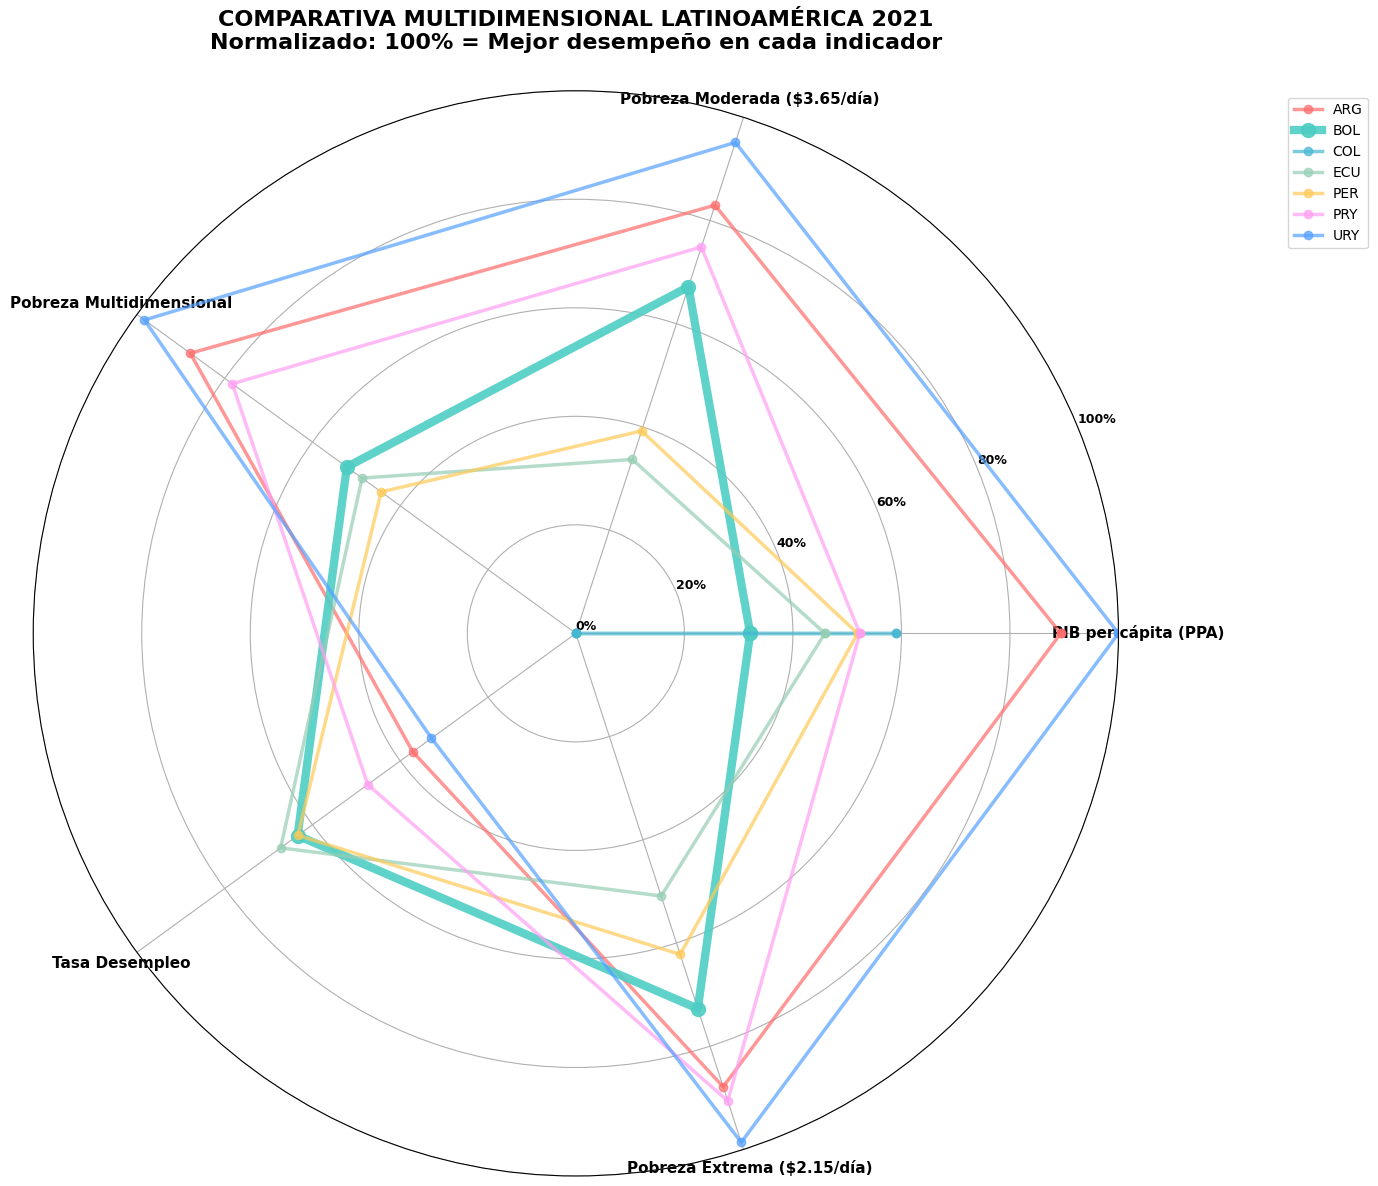


📊 DATOS ORIGINALES (2021):
    country  PIB per cápita (PPA)  Pobreza Moderada ($3.65/día)  \
610     ARG              26300.27                          2.80   
611     BOL               9454.20                          5.40   
614     COL              17383.09                         16.44   
615     ECU              13507.44                         10.90   
616     PER              15280.55                          9.99   
617     PRY              15406.17                          4.13   
618     URY              29431.89                          0.80   

     Pobreza Multidimensional  Tasa Desempleo  Pobreza Extrema ($2.15/día)  
610                       1.4            8.74                         0.89  
611                       5.5            5.09                         2.00  
614                      11.5           13.90                         7.33  
615                       5.9            4.55                         3.60  
616                       6.4            5.10     

In [36]:
# CORRECCIÓN DE ANÁLISIS COMPARATIVO PREMIUM
print("🎯 ANÁLISIS COMPARATIVO CORREGIDO - PAÍSES LATINOAMERICANOS (2021)")
print("=" * 70)

# Cargar datos
df_latam_wide = pd.read_csv('latam_wide_tableau.csv')
datos_2021 = df_latam_wide[df_latam_wide['year'] == 2021]

# Seleccionar indicadores clave para el radar (usando los nombres exactos del CSV)
indicadores_radar = [
    'PIB per cápita (PPA)',
    'Pobreza Moderada ($3.65/día)',
    'Pobreza Multidimensional',
    'Tasa Desempleo',
    'Pobreza Extrema ($2.15/día)'
]

# Filtrar solo países con datos completos para todos los indicadores del radar
datos_completos = datos_2021.dropna(subset=indicadores_radar)
print(f"Países con datos completos: {len(datos_completos)}")
print(f"Países disponibles: {datos_completos['country'].tolist()}")

# Configuración de estilo profesional
plt.style.use('seaborn-v0_8')
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57', '#FF9FF3', '#54A0FF', '#5F27CD']
bolivia_color = '#FF6B6B'  # Rojo destacado para Bolivia

# 1. RADAR CHART MULTIDIMENSIONAL (Tablero de dardos)
print("🎯 CREANDO RADAR CHART MULTIDIMENSIONAL...")

# Normalizar datos para radar (0-100 scale)
def normalize_radar_data(df, indicators):
    normalized = df.copy()
    for indicator in indicators:
        if 'Pobreza' in indicator or 'Desempleo' in indicator:
            # Para pobreza y desempleo: menor es mejor (invertir escala)
            normalized[indicator] = 100 - (df[indicator] / df[indicator].max() * 100)
        else:
            # Para PIB: mayor es mejor
            normalized[indicator] = (df[indicator] / df[indicator].max() * 100)
    return normalized

datos_radar = normalize_radar_data(datos_completos, indicadores_radar)

# 1. RADAR CHART
print("🎯 CREANDO RADAR CHART MEJORADO...")

plt.style.use('default')
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, polar=True)

# Asignar colores a los países disponibles
available_countries = datos_radar['country'].tolist()
available_colors = colors[:len(available_countries)]
country_colors = dict(zip(available_countries, available_colors))

angles = np.linspace(0, 2 * np.pi, len(indicadores_radar), endpoint=False).tolist()
angles += angles[:1]

# Plot cada país con línea más gruesa
for i, (_, row) in enumerate(datos_radar.iterrows()):
    values = [row[ind] for ind in indicadores_radar]
    values += values[:1]

    country = row['country']
    linewidth = 6 if country == 'BOL' else 2.5
    markersize = 10 if country == 'BOL' else 6
    alpha = 0.9 if country == 'BOL' else 0.7

    ax.plot(angles, values, 'o-', linewidth=linewidth, markersize=markersize,
            color=country_colors[country], label=country, alpha=alpha)

# Mejorar ejes
ax.set_ylim(0, 100)
ax.set_yticks([0, 20, 40, 60, 80, 100])
ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'],
                   fontsize=9, fontweight='bold')

ax.set_thetagrids(np.degrees(angles[:-1]), indicadores_radar, fontsize=11, fontweight='bold')

plt.title('COMPARATIVA MULTIDIMENSIONAL LATINOAMÉRICA 2021\nNormalizado: 100% = Mejor desempeño en cada indicador',
          fontsize=16, fontweight='bold', pad=30)
plt.legend(bbox_to_anchor=(1.15, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

# Mostrar datos originales para referencia
print("\n📊 DATOS ORIGINALES (2021):")
print(datos_completos[['country'] + indicadores_radar].round(2))

🎯 RADAR CHART COMPLETO - ANÁLISIS MULTIDIMENSIONAL LATINOAMÉRICA 2021
Países con datos suficientes: 7
Países disponibles: ['ARG', 'BOL', 'COL', 'ECU', 'PER', 'PRY', 'URY']


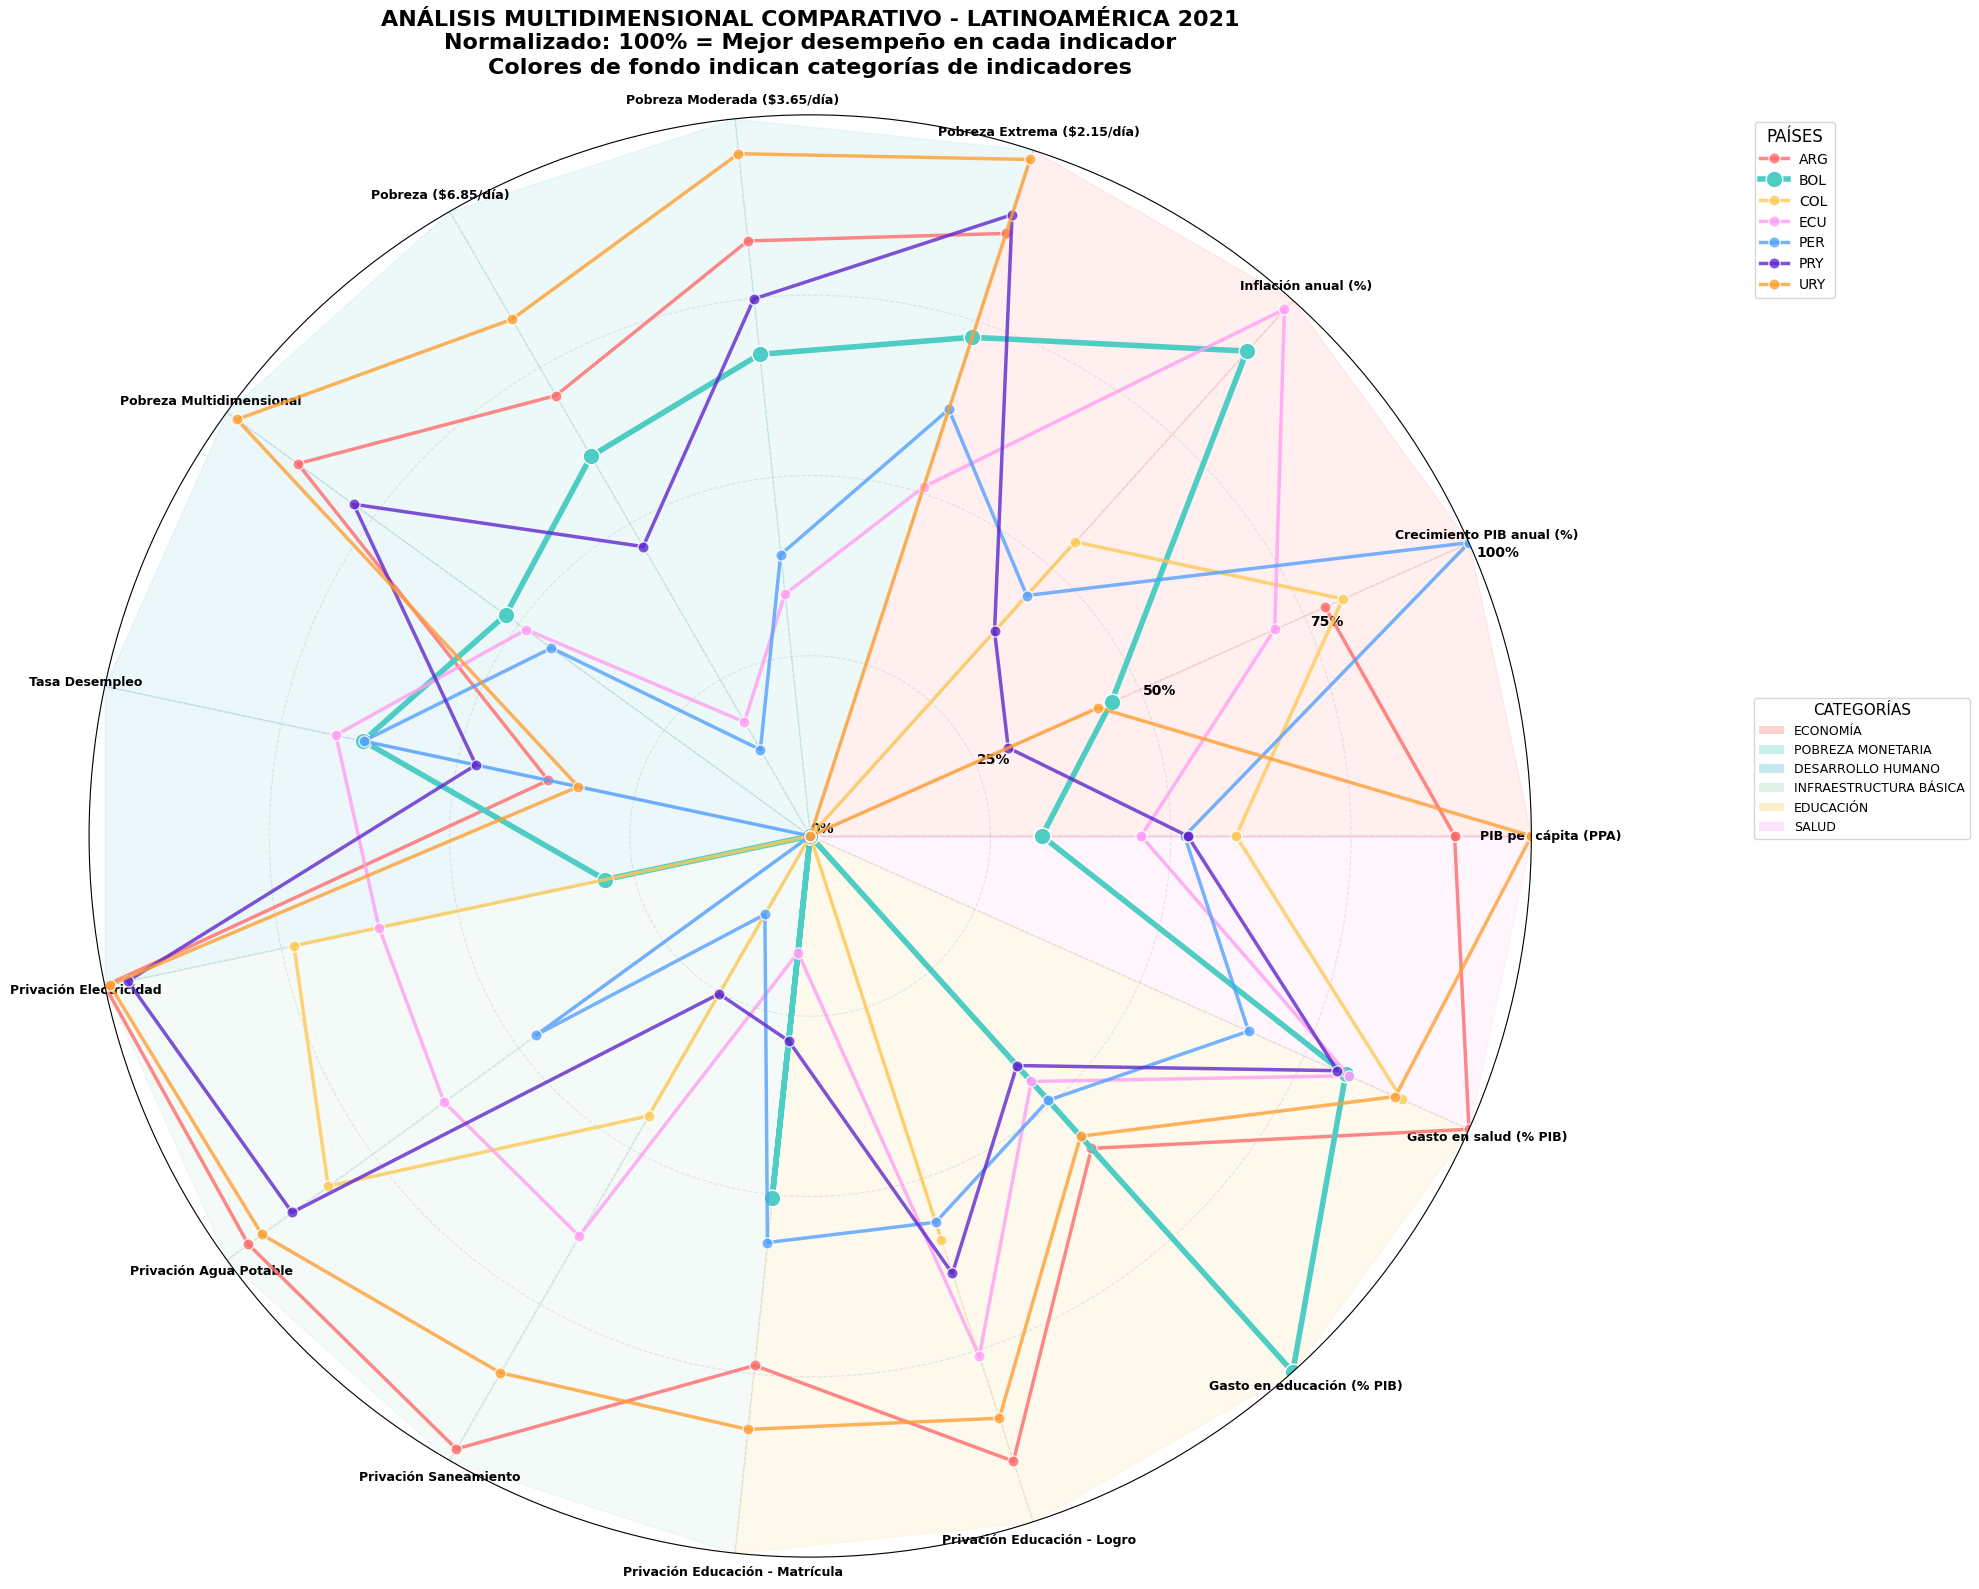


📊 DATOS ORIGINALES 2021:

ARG:
  PIB per cápita (PPA): 26300.27
  Crecimiento PIB anual (%): 10.44
  Inflación anual (%): nan
  Pobreza Extrema ($2.15/día): 0.89
  Pobreza Moderada ($3.65/día): 2.80
  Pobreza ($6.85/día): 11.43
  Pobreza Multidimensional: 1.40
  Tasa Desempleo: 8.74
  Privación Electricidad: 0.00
  Privación Agua Potable: 0.36
  Privación Saneamiento: 0.26
  Privación Educación - Matrícula: 0.73
  Privación Educación - Logro: 1.09
  Gasto en educación (% PIB): 4.64
  Gasto en salud (% PIB): 10.04

BOL:
  PIB per cápita (PPA): 9454.20
  Crecimiento PIB anual (%): 6.11
  Inflación anual (%): 0.74
  Pobreza Extrema ($2.15/día): 2.00
  Pobreza Moderada ($3.65/día): 5.40
  Pobreza ($6.85/día): 15.20
  Pobreza Multidimensional: 5.50
  Tasa Desempleo: 5.09
  Privación Electricidad: 2.94
  Privación Agua Potable: 9.90
  Privación Saneamiento: 13.91
  Privación Educación - Matrícula: 1.38
  Privación Educación - Logro: 12.28
  Gasto en educación (% PIB): 7.96
  Gasto en salud 

In [37]:
# RADAR CHART COMPLETO - ANÁLISIS MULTIDIMENSIONAL LATINOAMÉRICA
print("🎯 RADAR CHART COMPLETO - ANÁLISIS MULTIDIMENSIONAL LATINOAMÉRICA 2021")
print("=" * 80)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Cargar datos
df_latam_wide = pd.read_csv('latam_wide_tableau.csv')
datos_2021 = df_latam_wide[df_latam_wide['year'] == 2021]

# SELECCIÓN DE INDICADORES POR CATEGORÍAS
indicadores_radar = [
    # ECONOMÍA
    'PIB per cápita (PPA)',
    'Crecimiento PIB anual (%)',
    'Inflación anual (%)',

    # POBREZA MONETARIA
    'Pobreza Extrema ($2.15/día)',
    'Pobreza Moderada ($3.65/día)',
    'Pobreza ($6.85/día)',

    # DESARROLLO HUMANO
    'Pobreza Multidimensional',
    'Tasa Desempleo',

    # INFRAESTRUCTURA BÁSICA
    'Privación Electricidad',
    'Privación Agua Potable',
    'Privación Saneamiento',

    # EDUCACIÓN
    'Privación Educación - Matrícula',
    'Privación Educación - Logro',
    'Gasto en educación (% PIB)',

    # SALUD
    'Gasto en salud (% PIB)'
]

# Filtrar solo países con datos completos para la mayoría de indicadores
datos_completos = datos_2021.dropna(subset=indicadores_radar, thresh=10)  # Al menos 10 indicadores
print(f"Países con datos suficientes: {len(datos_completos)}")
print(f"Países disponibles: {datos_completos['country'].tolist()}")

# Normalizar datos para radar (0-100 scale)
def normalize_radar_data(df, indicators):
    normalized = df.copy()
    for indicator in indicators:
        if indicator in df.columns:
            if any(keyword in indicator for keyword in ['Pobreza', 'Privación', 'Desempleo', 'Inflación']):
                # Indicadores donde menor es mejor (invertir escala)
                max_val = df[indicator].max()
                normalized[indicator] = 100 - (df[indicator] / max_val * 100) if max_val > 0 else 0
            else:
                # Indicadores donde mayor es mejor
                max_val = df[indicator].max()
                normalized[indicator] = (df[indicator] / max_val * 100) if max_val > 0 else 0
    return normalized

datos_radar = normalize_radar_data(datos_completos, indicadores_radar)

# CONFIGURACIÓN DEL RADAR CHART
plt.style.use('default')
fig = plt.figure(figsize=(20, 16))
ax = fig.add_subplot(111, polar=True)

# Colores por categoría
category_colors = {
    'ECONOMÍA': '#FF6B6B',
    'POBREZA MONETARIA': '#4ECDC4',
    'DESARROLLO HUMANO': '#45B7D1',
    'INFRAESTRUCTURA BÁSICA': '#96CEB4',
    'EDUCACIÓN': '#FECA57',
    'SALUD': '#FF9FF3'
}

# Asignar colores a países
country_colors = {
    'ARG': '#FF6B6B',  # Argentina - Rojo
    'BOL': '#4ECDC4',  # Bolivia - Turquesa
    'BRA': '#45B7D1',  # Brasil - Azul claro
    'CHL': '#96CEB4',  # Chile - Verde claro
    'COL': '#FECA57',  # Colombia - Amarillo
    'ECU': '#FF9FF3',  # Ecuador - Rosa
    'PER': '#54A0FF',  # Perú - Azul
    'PRY': '#5F27CD',  # Paraguay - Púrpura
    'URY': '#FF9F33',  # Uruguay - Naranja
    'VEN': '#EE5253'   # Venezuela - Rojo oscuro
}

# Configurar ángulos
angles = np.linspace(0, 2 * np.pi, len(indicadores_radar), endpoint=False).tolist()
angles += angles[:1]

# Grupos de indicadores para colorear fondos
category_ranges = {
    'ECONOMÍA': (0, 3),
    'POBREZA MONETARIA': (3, 6),
    'DESARROLLO HUMANO': (6, 8),
    'INFRAESTRUCTURA BÁSICA': (8, 11),
    'EDUCACIÓN': (11, 14),
    'SALUD': (14, 15)
}

# Colorear fondos por categoría
for category, (start, end) in category_ranges.items():
    for i in range(start, end):
        ax.fill_between(angles[i:i+2], 0, 100, color=category_colors[category], alpha=0.1)

# Plot cada país
for i, (_, row) in enumerate(datos_radar.iterrows()):
    values = []
    for ind in indicadores_radar:
        if ind in row:
            values.append(row[ind])
        else:
            values.append(0)  # Valor por defecto si falta dato

    values += values[:1]
    country = row['country']

    linewidth = 4 if country == 'BOL' else 2.5
    markersize = 12 if country == 'BOL' else 8
    alpha = 1.0 if country == 'BOL' else 0.8

    ax.plot(angles, values, 'o-', linewidth=linewidth, markersize=markersize,
            color=country_colors.get(country, '#000000'),
            label=country, alpha=alpha, markeredgecolor='white', markeredgewidth=1)

# Configurar ejes y etiquetas
ax.set_ylim(0, 100)
ax.set_yticks([0, 25, 50, 75, 100])
ax.set_yticklabels(['0%', '25%', '50%', '75%', '100%'], fontsize=10, fontweight='bold')
ax.set_xticks(angles[:-1])
ax.set_xticklabels(indicadores_radar, fontsize=9, fontweight='bold')

# Añadir grid
ax.grid(True, alpha=0.3, linestyle='--')

# Título y leyenda
plt.title('ANÁLISIS MULTIDIMENSIONAL COMPARATIVO - LATINOAMÉRICA 2021\n'
          'Normalizado: 100% = Mejor desempeño en cada indicador\n'
          'Colores de fondo indican categorías de indicadores',
          fontsize=16, fontweight='bold', pad=30)

# Leyenda de países
legend1 = plt.legend(bbox_to_anchor=(1.15, 1), loc='upper left',
                    title="PAÍSES", fontsize=10, title_fontsize=12)

# Leyenda de categorías
legend_elements = [Patch(facecolor=color, alpha=0.3, label=category)
                  for category, color in category_colors.items()]
legend2 = ax.legend(handles=legend_elements, bbox_to_anchor=(1.15, 0.6),
                   loc='upper left', title="CATEGORÍAS", fontsize=9, title_fontsize=11)

ax.add_artist(legend1)

plt.tight_layout()
plt.subplots_adjust(right=0.8)
plt.show()

# TABLA DE DATOS ORIGINALES
print("\n📊 DATOS ORIGINALES 2021:")
print("=" * 80)
for country in datos_completos['country']:
    country_data = datos_completos[datos_completos['country'] == country]
    print(f"\n{country}:")
    for i, indicator in enumerate(indicadores_radar[:15]):  # Mostrar primeros 5
        if indicator in country_data.columns:
            value = country_data[indicator].values[0]
            print(f"  {indicator}: {value:.2f}")

# EXPLICACIÓN DE LA NORMALIZACIÓN
print("\n" + "="*80)
print("📊 EXPLICACIÓN DE LA NORMALIZACIÓN (mayor -> perímetro, menor -> centro):")
print("="*80)
print("ECONOMÍA (Rojo):")
print("• PIB pc (PPA): Mayor = Mejor → Escala directa")
print("• Crecimiento PIB (%): Mayor = Mejor → Escala directa")
print("• Inflación (%): Mayor = Mejor → Escala invertida")
print()
print("POBREZA (Turquesa):")
print("• Pob. Extrema ($2.15): Menor = Mejor → Escala invertida")
print("• Pob. Moderada ($3.65): Menor = Mejor → Escala invertida")
print("• Pob. Alta ($6.85): Menor = Mejor → Escala invertida")
print()
print("DESARROLLO (Azul):")
print("• Pob. Multidimensional: Menor = Mejor → Escala invertida")
print("• Desempleo: Menor = Mejor → Escala invertida")
print()
print("INFRAESTRUCTURA (Verde):")
print("• Sin Electricidad: Mayor = Mejor → Escala invertida")
print("• Sin Agua Potable: Mayor = Mejor → Escala invertida")
print("• Sin Saneamiento: Mayor = Mejor → Escala invertida")
print()
print("EDUCACIÓN (Amarillo):")
print("• No Matrícula: Mayor = Mejor → Escala invertida")
print("• Bajo Logro Educ.: Mayor = Mejor → Escala invertida")
print("• Gasto Educación (%): Mayor = Mejor → Escala directa")

---

⚠️ CONSIDERACIONES IMPORTANTES
CONTEXTO ESENCIAL:

**Los porcentajes NO representan valores absolutos, sino posición relativa entre los países analizados**

Un 50% NO significa "la mitad del camino", sino la posición media entre el mejor y peor país

LIMITACIONES:
La normalización puede suavizar diferencias extremas

No considera umbrales absolutos de desarrollo

Países faltantes en algunos indicadores afectan comparaciones


📈 GRÁFICO COMPARATIVO PIB vs POBREZA ($6.85/día)


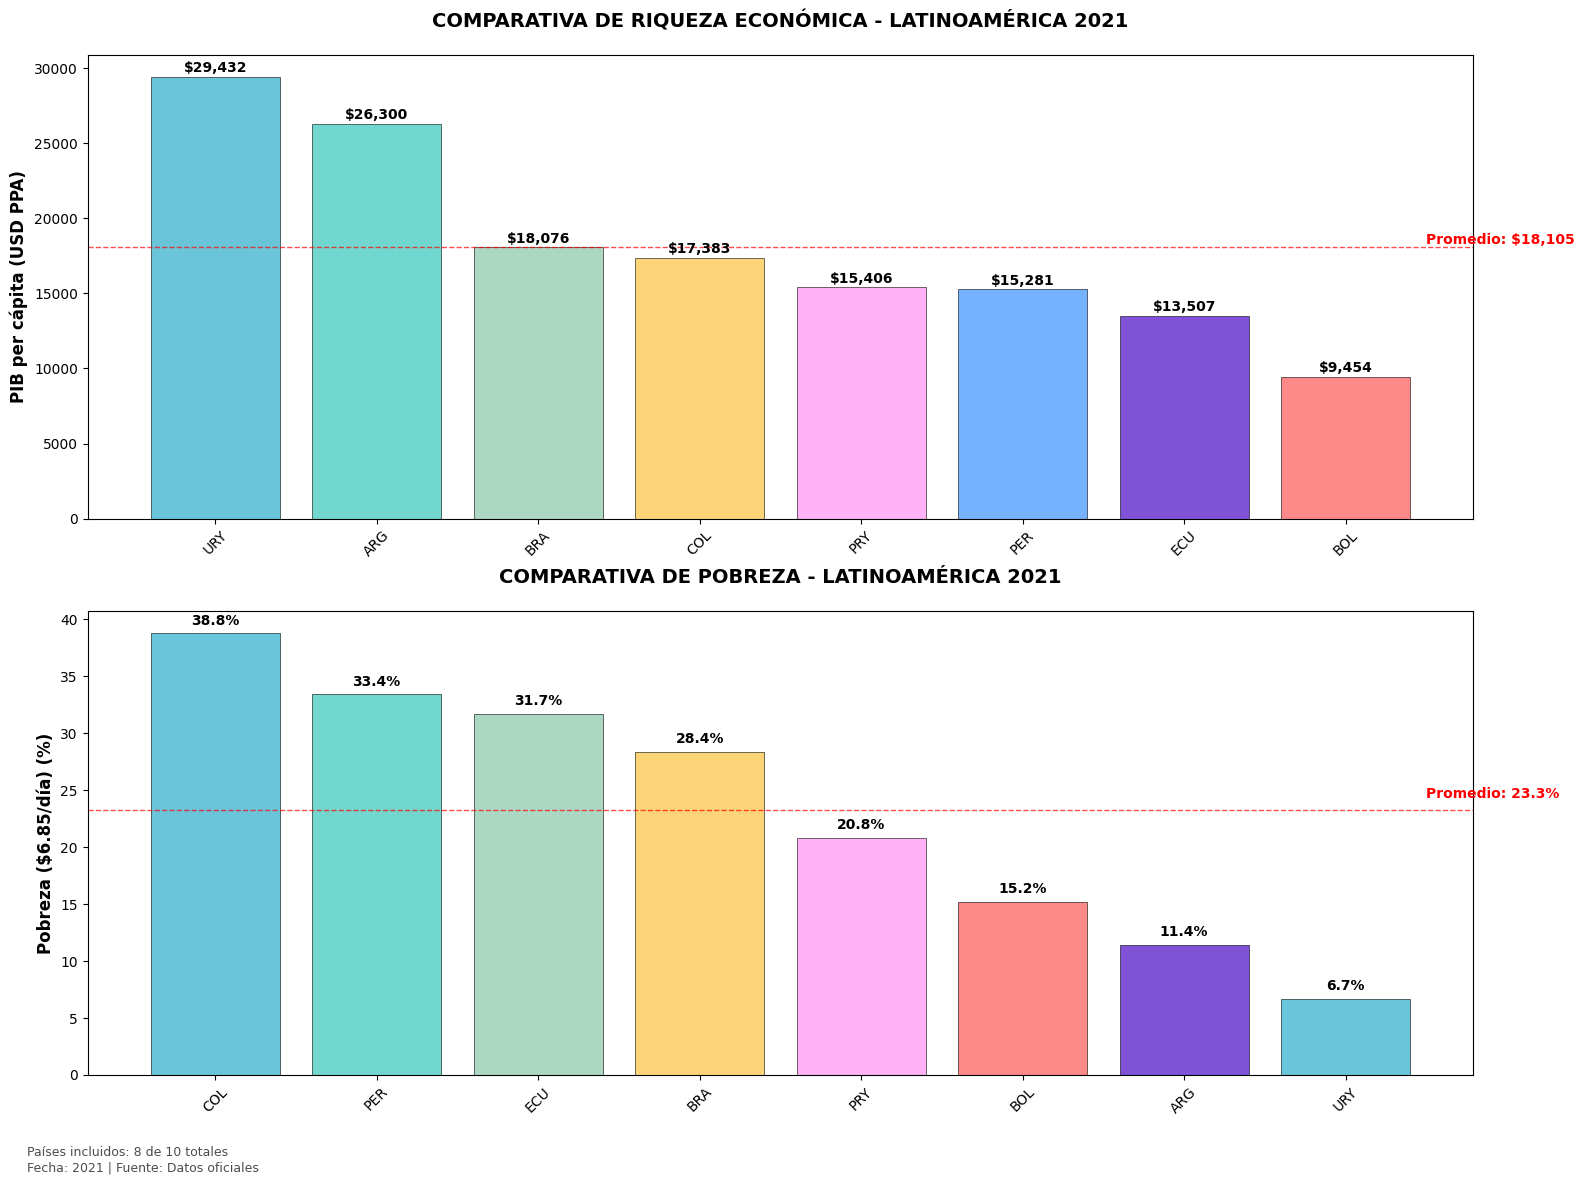


📊 TABLA COMPARATIVA PIB vs POBREZA ($6.85/día) - 2021
País   PIB pc (USD)    Pobreza $6.85   Relación PIB/Pobreza
-----------------------------------------------------------------
URY    $29,432        6.7           % $4,393/punto
ARG    $26,300        11.4          % $2,301/punto
BRA    $18,076        28.4          % $636/punto
COL    $17,383        38.8          % $448/punto
PRY    $15,406        20.8          % $740/punto
PER    $15,281        33.4          % $457/punto
ECU    $13,507        31.7          % $426/punto
BOL    $9,454         15.2          % $622/punto*
-----------------------------------------------------------------
* Bolivia muestra la relación más baja entre PIB y reducción de pobreza


In [38]:
# 5. GRÁFICO ADICIONAL: BARRAS COMPARATIVAS DE PIB vs POBREZA $6.85
print("\n📈 GRÁFICO COMPARATIVO PIB vs POBREZA ($6.85/día)")

# Usar datos de 2021 y filtrar países con datos completos
datos_comparativa = datos_2021.dropna(subset=['PIB per cápita (PPA)', 'Pobreza ($6.85/día)']).copy()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Color específico para Bolivia
bolivia_color = '#FF6B6B'  # Color rojizo para Bolivia
otros_colores = ['#45B7D1', '#4ECDC4', '#96CEB4', '#FECA57', '#FF9FF3', '#54A0FF', '#5F27CD']

# Gráfico 1: PIB per cápita
datos_pib = datos_comparativa.sort_values('PIB per cápita (PPA)', ascending=False)

# Asignar colores - Bolivia en rojo, otros países con colores alternados
colors_pib = []
for country in datos_pib['country']:
    if country == 'BOL':
        colors_pib.append(bolivia_color)
    else:
        colors_pib.append(otros_colores[len(colors_pib) % len(otros_colores)])

bars1 = ax1.bar(datos_pib['country'], datos_pib['PIB per cápita (PPA)'],
                color=colors_pib, alpha=0.8, edgecolor='black', linewidth=0.5)
ax1.set_ylabel('PIB per cápita (USD PPA)', fontweight='bold', fontsize=12)
ax1.set_title('COMPARATIVA DE RIQUEZA ECONÓMICA - LATINOAMÉRICA 2021',
              fontweight='bold', fontsize=14, pad=20)
ax1.tick_params(axis='x', rotation=45)

# Añadir etiquetas de datos a las barras PIB
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 100, f'${yval:,.0f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Añadir línea promedio
pib_promedio = datos_pib['PIB per cápita (PPA)'].mean()
ax1.axhline(y=pib_promedio, color='red', linestyle='--', alpha=0.7, linewidth=1)
ax1.text(len(datos_pib) - 0.5, pib_promedio + 200, f'Promedio: ${pib_promedio:,.0f}',
         fontsize=10, fontweight='bold', color='red')

# Gráfico 2: Pobreza $6.85/día
datos_pobreza = datos_comparativa.sort_values('Pobreza ($6.85/día)', ascending=False)

# Asignar colores - Bolivia en rojo, otros países con colores alternados
colors_pobreza = []
for country in datos_pobreza['country']:
    if country == 'BOL':
        colors_pobreza.append(bolivia_color)
    else:
        colors_pobreza.append(otros_colores[len(colors_pobreza) % len(otros_colores)])

bars2 = ax2.bar(datos_pobreza['country'], datos_pobreza['Pobreza ($6.85/día)'],
                color=colors_pobreza, alpha=0.8, edgecolor='black', linewidth=0.5)
ax2.set_ylabel('Pobreza ($6.85/día) (%)', fontweight='bold', fontsize=12)
ax2.set_title('COMPARATIVA DE POBREZA - LATINOAMÉRICA 2021',
              fontweight='bold', fontsize=14, pad=20)
ax2.tick_params(axis='x', rotation=45)

# Añadir etiquetas de datos a las barras de pobreza
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.1f}%',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Añadir línea promedio
pobreza_promedio = datos_pobreza['Pobreza ($6.85/día)'].mean()
ax2.axhline(y=pobreza_promedio, color='red', linestyle='--', alpha=0.7, linewidth=1)
ax2.text(len(datos_pobreza) - 0.5, pobreza_promedio + 1, f'Promedio: {pobreza_promedio:.1f}%',
         fontsize=10, fontweight='bold', color='red')

# Añadir texto informativo
fig.text(0.02, 0.02, f'Países incluidos: {len(datos_comparativa)} de 10 totales\n'
                     f'Fecha: 2021 | Fuente: Datos oficiales',
         fontsize=9, alpha=0.7)

plt.tight_layout()
plt.subplots_adjust(bottom=0.1)
plt.show()

# Mostrar tabla comparativa
print("\n📊 TABLA COMPARATIVA PIB vs POBREZA ($6.85/día) - 2021")
print("=" * 65)
print(f"{'País':<6} {'PIB pc (USD)':<15} {'Pobreza $6.85':<15} {'Relación PIB/Pobreza'}")
print("-" * 65)

for _, row in datos_comparativa.sort_values('PIB per cápita (PPA)', ascending=False).iterrows():
    pais = row['country']
    pib = row['PIB per cápita (PPA)']
    pobreza = row['Pobreza ($6.85/día)']

    # Calcular relación (PIB por punto de pobreza)
    relacion = pib / pobreza if pobreza > 0 else 0

    # Destacar Bolivia en la tabla
    if pais == 'BOL':
        print(f"{pais:<6} ${pib:<13,.0f} {pobreza:<14.1f}% ${relacion:,.0f}/punto*")
    else:
        print(f"{pais:<6} ${pib:<13,.0f} {pobreza:<14.1f}% ${relacion:,.0f}/punto")

print("-" * 65)
print("* Bolivia muestra la relación más baja entre PIB y reducción de pobreza")

---
**Nota sobre el PIB per cápita de Bolivia (2022):**

Es importante diferenciar entre:

*   **PIB per cápita (USD actuales):** Aprox. **$3,644** (Medida nominal, útil para comparar el tamaño económico directo).

*   **PIB per cápita (PPA - Paridad del Poder Adquisitivo):** Aprox. **$9,682** (Ajustado por costo de vida, refleja mejor el poder de compra y nivel de vida).

Usamos el PIB per cápita (PPA) en nuestros análisis y gráficos porque es una medida más adecuada para comparar el bienestar económico y relacionarlo con la pobreza, ya que considera cuánto pueden comprar realmente las personas con su ingreso en Bolivia.

Mapa interactivo de Sudadmérica

2021

In [39]:
import plotly.express as px
import pandas as pd

# Cargar datos
df_latam_wide = pd.read_csv('latam_wide_tableau.csv')

# Seleccionar año e indicador para el mapa
map_indicator = 'Pobreza Multidimensional'
map_year = 2021

# Filtrar datos para el año seleccionado
df_map_data = df_latam_wide[df_latam_wide['year'] == map_year].copy()

# Verificar disponibilidad de datos
print(f"📊 CREANDO MAPA INTERACTIVO - {map_indicator} ({map_year})")
print(f"Países con datos: {df_map_data[map_indicator].notna().sum()} de {len(df_map_data)}")

# Mapeo de códigos de país a nombres completos
country_names = {
    'ARG': 'Argentina', 'BOL': 'Bolivia', 'BRA': 'Brasil', 'CHL': 'Chile',
    'COL': 'Colombia', 'ECU': 'Ecuador', 'PER': 'Perú', 'PRY': 'Paraguay',
    'URY': 'Uruguay', 'VEN': 'Venezuela'
}

# Añadir nombres completos al DataFrame
df_map_data['country_name'] = df_map_data['country'].map(country_names)

# Separar países con y sin datos
df_con_datos = df_map_data.dropna(subset=[map_indicator])
df_sin_datos = df_map_data[df_map_data[map_indicator].isna()]

# Crear el mapa interactivo principal
if not df_con_datos.empty:
    fig = px.choropleth(
        df_con_datos,
        locations="country",           # Códigos de país
        locationmode="ISO-3",          # Usar códigos ISO-3
        color=map_indicator,           # Variable para colorear
        hover_name="country_name",     # Nombre completo en hover
        hover_data={
            'PIB per cápita (PPA)': ':.0f',
            'Pobreza Extrema ($2.15/día)': ':.1f',
            'Pobreza Moderada ($3.65/día)': ':.1f',
            'Tasa Desempleo': ':.1f',
            'country': False  # Ocultar código de país del hover
        },
        range_color=[df_con_datos[map_indicator].min(), df_con_datos[map_indicator].max()],
        color_continuous_scale="Reds_r",  # Rojo inverso (más oscuro = más pobreza)
        title=f'🏝️ MAPA INTERACTIVO: POBREZA EN LATINOAMÉRICA ({map_year})<br>'
              f'<sup>Pobreza ($6.85/día) - {len(df_con_datos)} países con datos</sup>',
        scope="south america",          # Enfocar en Sudamérica
        height=600
    )

    # Personalizar layout
    fig.update_layout(
        geo=dict(
            showframe=False,
            showcoastlines=True,
            coastlinecolor="gray",
            showland=True,
            landcolor="lightgray",
            showocean=True,
            oceancolor="lightblue",
            projection_type='natural earth'
        ),
        coloraxis_colorbar=dict(
            title="Pobreza (%)",
            thickness=15,
            len=0.75,
            yanchor="middle",
            y=0.5
        ),
        annotations=[dict(
            x=0.5,
            y=-0.1,
            xref='paper',
            yref='paper',
            text='💡 Datos: Banco Mundial y agencias nacionales | 📅 Año 2021',
            showarrow=False,
            font=dict(size=10, color="gray")
        )],
        font=dict(family="Arial, sans-serif", size=12),
        margin=dict(l=20, r=20, t=80, b=60)
    )

    # Añadir países sin datos como puntos dispersos
    if not df_sin_datos.empty:
        fig.add_trace(
            px.scatter_geo(
                df_sin_datos,
                locations="country",
                locationmode="ISO-3",
                hover_name="country_name",
                hover_data={"country": False}
            ).update_traces(
                marker=dict(color="gray", size=10, symbol="x", line=dict(width=2, color="black")),
                hovertemplate="<b>%{hovertext}</b><br>❌ Datos no disponibles<extra></extra>",
                name="Sin datos"
            ).data[0]
        )

    # Mostrar el mapa
    fig.show()

    # Información adicional en consola
    print(f"\n🎯 ESTADÍSTICAS DEL MAPA:")
    print(f"• Países con datos: {len(df_con_datos)}")
    print(f"• Países sin datos: {len(df_sin_datos)}")
    if not df_con_datos.empty:
        print(f"• Rango de pobreza: {df_con_datos[map_indicator].min():.1f}% - {df_con_datos[map_indicator].max():.1f}%")
        print(f"• Promedio regional: {df_con_datos[map_indicator].mean():.1f}%")

    # Mostrar lista de países sin datos
    if not df_sin_datos.empty:
        print(f"\n❌ Países sin datos de {map_indicator}:")
        for pais in df_sin_datos['country']:
            print(f"   - {country_names.get(pais, pais)}")

else:
    print("❌ No se pudo crear el mapa: No hay países con datos completos")


📊 CREANDO MAPA INTERACTIVO - Pobreza Multidimensional (2021)
Países con datos: 7 de 10



🎯 ESTADÍSTICAS DEL MAPA:
• Países con datos: 7
• Países sin datos: 3
• Rango de pobreza: 0.2% - 11.5%
• Promedio regional: 4.8%

❌ Países sin datos de Pobreza Multidimensional:
   - Brasil
   - Chile
   - Venezuela


2022

In [40]:
import plotly.express as px
import pandas as pd

# Cargar datos
df_latam_wide = pd.read_csv('latam_wide_tableau.csv')

# Seleccionar año e indicador para el mapa
map_indicator = 'Pobreza Multidimensional'
map_year = 2022

# Filtrar datos para el año seleccionado
df_map_data = df_latam_wide[df_latam_wide['year'] == map_year].copy()

# Verificar disponibilidad de datos
print(f"📊 CREANDO MAPA INTERACTIVO COMPLETO - {map_indicator} ({map_year})")
print(f"Países con datos: {df_map_data[map_indicator].notna().sum()} de {len(df_map_data)}")

# Mapeo de códigos de país a nombres completos
country_names = {
    'ARG': 'Argentina', 'BOL': 'Bolivia', 'BRA': 'Brasil', 'CHL': 'Chile',
    'COL': 'Colombia', 'ECU': 'Ecuador', 'PER': 'Perú', 'PRY': 'Paraguay',
    'URY': 'Uruguay', 'VEN': 'Venezuela'
}

# Añadir nombres completos al DataFrame
df_map_data['country_name'] = df_map_data['country'].map(country_names)

# Separar países con y sin datos
df_con_datos = df_map_data.dropna(subset=[map_indicator])
df_sin_datos = df_map_data[df_map_data[map_indicator].isna()]

# Crear texto personalizado para hover con TODOS los indicadores disponibles
def create_hover_text(row):
    text = f"<b>{country_names.get(row['country'], row['country'])}</b><br>"
    text += f"<b>{map_indicator}:</b> {row.get(map_indicator, 'N/A'):.1f}%<br>"

    # MACROECONOMÍA
    text += "<br><b>📈 MACROECONOMÍA:</b><br>"
    text += f"• PIB pc: ${row.get('PIB per cápita (PPA)', 'N/A'):,.0f}<br>"
    text += f"• Crecimiento PIB: {row.get('Crecimiento PIB anual (%)', 'N/A'):.1f}%<br>"
    text += f"• Inflación: {row.get('Inflación anual (%)', 'N/A'):.1f}%<br>"
    text += f"• Desempleo: {row.get('Tasa Desempleo', 'N/A'):.1f}%<br>"

    # POBREZA MONETARIA
    text += "<br><b>💰 POBREZA MONETARIA:</b><br>"
    text += f"• Extrema ($2.15): {row.get('Pobreza Extrema ($2.15/día)', 'N/A'):.1f}%<br>"
    text += f"• Moderada ($3.65): {row.get('Pobreza Moderada ($3.65/día)', 'N/A'):.1f}%<br>"
    text += f"• Alta ($6.85): {row.get('Pobreza ($6.85/día)', 'N/A'):.1f}%<br>"
    text += f"• Línea Nacional: {row.get('Pobreza Línea Nacional', 'N/A'):.1f}%<br>"

    # POBREZA MULTIDIMENSIONAL
    text += "<br><b>🌍 POBREZA MULTIDIMENSIONAL:</b><br>"
    text += f"• Multidimensional: {row.get('Pobreza Multidimensional', 'N/A'):.1f}%<br>"
    text += f"• Privación Monetaria: {row.get('Privación Pobreza Monetaria', 'N/A'):.1f}%<br>"

    # INFRAESTRUCTURA BÁSICA
    text += "<br><b>🏠 INFRAESTRUCTURA:</b><br>"
    text += f"• Sin Electricidad: {row.get('Privación Electricidad', 'N/A'):.1f}%<br>"
    text += f"• Sin Agua Potable: {row.get('Privación Agua Potable', 'N/A'):.1f}%<br>"
    text += f"• Sin Saneamiento: {row.get('Privación Saneamiento', 'N/A'):.1f}%<br>"

    # EDUCACIÓN
    text += "<br><b>🎓 EDUCACIÓN:</b><br>"
    text += f"• No Matrícula: {row.get('Privación Educación - Matrícula', 'N/A'):.1f}%<br>"
    text += f"• Bajo Logro: {row.get('Privación Educación - Logro', 'N/A'):.1f}%<br>"
    text += f"• Gasto Educación: {row.get('Gasto en educación (% PIB)', 'N/A'):.1f}% PIB<br>"

    # SALUD Y POBLACIÓN
    text += "<br><b>🏥 SALUD Y DEMOGRAFÍA:</b><br>"
    text += f"• Gasto Salud: {row.get('Gasto en salud (% PIB)', 'N/A'):.1f}% PIB<br>"
    text += f"• Población: {row.get('Población Total', 'N/A'):,.0f} hab.<br>"
    text += f"• Gasto Público: {row.get('Gasto público (% PIB)', 'N/A'):.1f}% PIB<br>"

    return text

df_con_datos['hover_text'] = df_con_datos.apply(create_hover_text, axis=1)

# Crear el mapa interactivo principal
if not df_con_datos.empty:
    fig = px.choropleth(
        df_con_datos,
        locations="country",           # Códigos de país
        locationmode="ISO-3",          # Usar códigos ISO-3
        color=map_indicator,           # Variable para colorear
        hover_name="country_name",     # Nombre completo en hover
        custom_data=['hover_text'],    # Texto personalizado para hover
        range_color=[df_con_datos[map_indicator].min(), df_con_datos[map_indicator].max()],
        color_continuous_scale="Reds_r",  # Rojo inverso (más oscuro = más pobreza)
        title=f'🏝️ MAPA INTERACTIVO COMPLETO: INDICADORES DE DESARROLLO - LATINOAMÉRICA ({map_year})<br>'
              f'<sup>Color: Pobreza ($6.85/día) | {len(df_con_datos)} países con datos completos</sup>',
        scope="south america",          # Enfocar en Sudamérica
        height=700
    )

    # Personalizar layout
    fig.update_layout(
        geo=dict(
            showframe=False,
            showcoastlines=True,
            coastlinecolor="gray",
            showland=True,
            landcolor="lightgray",
            showocean=True,
            oceancolor="lightblue",
            projection_type='natural earth'
        ),
        coloraxis_colorbar=dict(
            title="Pobreza $6.85/día (%)",
            thickness=15,
            len=0.75,
            yanchor="middle",
            y=0.5,
            titleside="right"
        ),
        annotations=[dict(
            x=0.5,
            y=-0.12,
            xref='paper',
            yref='paper',
            text='💡 Pasa el mouse sobre cada país para ver todos los indicadores | 📅 Datos 2022',
            showarrow=False,
            font=dict(size=11, color="gray")
        )],
        font=dict(family="Arial, sans-serif", size=12),
        margin=dict(l=20, r=20, t=100, b=80)
    )

    # Personalizar hover con HTML completo
    fig.update_traces(
        hovertemplate='%{customdata[0]}<extra></extra>'
    )

    # Añadir países sin datos como puntos dispersos
    if not df_sin_datos.empty:
        # Crear hover para países sin datos
        def create_no_data_text(row):
            return f"<b>{country_names.get(row['country'], row['country'])}</b><br>❌ Datos de pobreza no disponibles<br>"

        df_sin_datos['hover_text'] = df_sin_datos.apply(create_no_data_text, axis=1)

        fig.add_trace(
            px.scatter_geo(
                df_sin_datos,
                locations="country",
                locationmode="ISO-3",
                custom_data=['hover_text']
            ).update_traces(
                marker=dict(color="gray", size=12, symbol="x", line=dict(width=2, color="black")),
                hovertemplate='%{customdata[0]}<extra></extra>',
                name="Sin datos pobreza"
            ).data[0]
        )

    # Mostrar el mapa
    fig.show()

    # INFORMACIÓN ESTADÍSTICA COMPLETA
    print(f"\n🎯 ESTADÍSTICAS COMPLETAS - LATINOAMÉRICA {map_year}")
    print("=" * 60)

    # Pobreza
    print("\n📊 POBREZA MONETARIA:")
    for indicator in ['Pobreza Extrema ($2.15/día)', 'Pobreza Moderada ($3.65/día)', 'Pobreza ($6.85/día)']:
        if indicator in df_con_datos.columns:
            data = df_con_datos[indicator].dropna()
            if len(data) > 0:
                print(f"• {indicator}: {data.min():.1f}% - {data.max():.1f}% (avg: {data.mean():.1f}%)")

    # Macroeconomía
    print("\n📈 MACROECONOMÍA:")
    macro_indicators = ['PIB per cápita (PPA)', 'Crecimiento PIB anual (%)', 'Inflación anual (%)', 'Tasa Desempleo']
    for indicator in macro_indicators:
        if indicator in df_con_datos.columns:
            data = df_con_datos[indicator].dropna()
            if len(data) > 0:
                if 'PIB' in indicator:
                    print(f"• {indicator}: ${data.min():,.0f} - ${data.max():,.0f} (avg: ${data.mean():,.0f})")
                else:
                    print(f"• {indicator}: {data.min():.1f}% - {data.max():.1f}% (avg: {data.mean():.1f}%)")

    # Población
    if 'Población Total' in df_con_datos.columns:
        poblacion = df_con_datos['Población Total'].dropna()
        if len(poblacion) > 0:
            print(f"\n👥 POBLACIÓN TOTAL: {poblacion.sum():,.0f} habitantes")
            print(f"• Por país: {poblacion.min():,.0f} - {poblacion.max():,.0f} hab.")

    # Países sin datos
    if not df_sin_datos.empty:
        print(f"\n❌ PAÍSES SIN DATOS DE {map_indicator}:")
        for pais in df_sin_datos['country']:
            print(f"   - {country_names.get(pais, pais)}")

else:
    print("❌ No se pudo crear el mapa: No hay países con datos completos")

# Exportar datos para referencia
print(f"\n💾 EXPORTANDO DATOS COMPLETOS PARA {map_year}...")
df_con_datos.to_csv('latam_datos_completos_2021.csv', index=False)
print("Datos exportados a: latam_datos_completos_2021.csv")

📊 CREANDO MAPA INTERACTIVO COMPLETO - Pobreza Multidimensional (2022)
Países con datos: 9 de 10


/tmp/ipython-input-267164150.py:76: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-267164150.py:139: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




🎯 ESTADÍSTICAS COMPLETAS - LATINOAMÉRICA 2022

📊 POBREZA MONETARIA:
• Pobreza Extrema ($2.15/día): 0.2% - 6.0% (avg: 2.2%)
• Pobreza Moderada ($3.65/día): 0.8% - 14.0% (avg: 6.4%)
• Pobreza ($6.85/día): 4.7% - 34.8% (avg: 20.3%)

📈 MACROECONOMÍA:
• PIB per cápita (PPA): $9,682 - $30,805 (avg: $19,967)
• Crecimiento PIB anual (%): $0 - $7 (avg: $4)
• Inflación anual (%): 1.7% - 11.6% (avg: 7.9%)
• Tasa Desempleo: 3.6% - 10.5% (avg: 6.7%)

👥 POBLACIÓN TOTAL: 400,533,165 habitantes
• Por país: 3,390,913 - 210,306,415 hab.

❌ PAÍSES SIN DATOS DE Pobreza Multidimensional:
   - Venezuela

💾 EXPORTANDO DATOS COMPLETOS PARA 2022...
Datos exportados a: latam_datos_completos_2021.csv


En HTML

In [41]:
# CREAR MAPA INTERACTIVO HTML MEJORADO CORREGIDO
print("🌎 CREANDO MAPA INTERACTIVO HTML MEJORADO...")

import folium
from folium.plugins import FloatImage
import json

# Crear mapa centrado en Sudamérica
m = folium.Map(
    location=[-15, -60],
    zoom_start=4,
    tiles='CartoDB positron',
    control_scale=True
)

# Coordenadas de los países (centroides aproximados)
country_coords = {
    'ARG': [-38.4161, -63.6167], 'BOL': [-16.2902, -63.5887], 'BRA': [-14.2350, -51.9253],
    'CHL': [-35.6751, -71.5429], 'COL': [4.5709, -74.2973], 'ECU': [-1.8312, -78.1834],
    'PER': [-9.1900, -75.0152], 'PRY': [-23.4425, -58.4438], 'URY': [-32.5228, -55.7658],
    'VEN': [6.4238, -66.5897]
}

# Obtener datos para 2022
datos_2022 = df_latam_wide[df_latam_wide['year'] == 2022].copy()

# Función para determinar color según nivel de pobreza
def get_color(pobreza):
    if pobreza is None:
        return 'gray'
    if pobreza < 3:
        return 'green'
    elif 3 <= pobreza < 6:
        return 'orange'
    elif 6 <= pobreza < 9:
        return 'red'
    else:
        return 'darkred'

# Añadir cada país al mapa
for _, row in datos_2022.iterrows():
    pais = row['country']
    if pais in country_coords:
        pobreza = row.get('Pobreza Multidimensional', None)
        pib = row.get('PIB per cápita (PPA)', None)
        poblacion = row.get('Población Total', None)
        desempleo = row.get('Tasa Desempleo', None)

        # Formatear población correctamente
        if pd.notna(poblacion):
            poblacion_str = f"{poblacion:,.0f}"
        else:
            poblacion_str = 'N/A'

        if pd.notna(pobreza) and pd.notna(pib):
            color = get_color(pobreza)

            # Crear popup HTML completo
            popup_html = f"""
            <div style="width: 300px; font-family: Arial, sans-serif;">
                <h3 style="color: #2c3e50; border-bottom: 2px solid {color}; padding-bottom: 8px; margin: 0 0 15px 0;">
                    {country_names.get(pais, pais)}
                </h3>

                <div style="background-color: #f8f9fa; padding: 12px; border-radius: 8px; margin-bottom: 15px;">
                    <h4 style="margin: 0 0 10px 0; color: #495057;">📊 Indicadores Clave</h4>
                    <div style="display: grid; grid-template-columns: 1fr 1fr; gap: 8px;">
                        <div><strong>PIB pc:</strong></div>
                        <div>${pib:,.0f}</div>
                        <div><strong>Población:</strong></div>
                        <div>{poblacion_str}</div>
                        <div><strong>Desempleo:</strong></div>
                        <div>{desempleo:.1f}%</div>
                    </div>
                </div>

                <h4 style="margin: 15px 0 10px 0; color: #495057;">🎯 Niveles de Pobreza</h4>
                <div style="background-color: #fff3cd; padding: 10px; border-radius: 6px; margin-bottom: 10px;">
                    <div style="color: {color}; font-weight: bold; font-size: 16px;">
                        Pobreza Multidimensional: {pobreza:.1f}%
                    </div>
                </div>

                <div style="display: grid; grid-template-columns: 1fr 1fr; gap: 5px; font-size: 12px;">
                    <div>Extrema ($2.15):</div>
                    <div>{row.get('Pobreza Extrema ($2.15/día)', 'N/A'):.1f}%</div>
                    <div>Moderada ($3.65):</div>
                    <div>{row.get('Pobreza Moderada ($3.65/día)', 'N/A'):.1f}%</div>
                    <div>Multidimensional:</div>
                    <div>{row.get('Pobreza Multidimensional', 'N/A'):.1f}%</div>
                    <div>Línea Nacional:</div>
                    <div>{row.get('Pobreza Línea Nacional', 'N/A'):.1f}%</div>
                </div>

                <div style="margin-top: 15px; padding-top: 10px; border-top: 1px solid #dee2e6;">
                    <small style="color: #6c757d;">Fuente: Datos 2022 | Análisis Comparativo</small>
                </div>
            </div>
            """

            # Añadir marcador
            folium.CircleMarker(
                location=country_coords[pais],
                radius=15 + (pib / 5000),  # Tamaño proporcional al PIB
                popup=folium.Popup(popup_html, max_width=300),
                color='white',
                weight=2,
                fill_color=color,
                fill_opacity=0.7,
                fill=True
            ).add_to(m)
        else:
            # País sin datos completos - marcador gris
            popup_html = f"""
            <div style="width: 250px; font-family: Arial, sans-serif;">
                <h3 style="color: #2c3e50; border-bottom: 2px solid gray; padding-bottom: 8px;">
                    {country_names.get(pais, pais)}
                </h3>
                <p style="color: #6c757d;">❌ Datos de pobreza no disponibles para 2022</p>
                <div style="margin-top: 10px; font-size: 12px;">
                    <strong>Población:</strong> {poblacion_str}<br>
                    <strong>Desempleo:</strong> {desempleo:.1f}%
                </div>
            </div>
            """

            folium.CircleMarker(
                location=country_coords[pais],
                radius=10,
                popup=folium.Popup(popup_html, max_width=250),
                color='gray',
                weight=1,
                fill_color='lightgray',
                fill_opacity=0.5,
                fill=True
            ).add_to(m)

# Añadir leyenda de colores
legend_html = """
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    width: 280px;
    height: 160px;
    background-color: white;
    border: 2px solid grey;
    z-index: 9999;
    font-size: 12px;
    padding: 15px;
    border-radius: 10px;
    box-shadow: 0 4px 8px rgba(0,0,0,0.2);
    font-family: Arial, sans-serif;
">
    <h4 style="margin: 0 0 12px 0; color: #2c3e50; border-bottom: 2px solid #3498db; padding-bottom: 5px;">
        🎨 Niveles de Pobreza ($6.85/día)
    </h4>
    <div style="display: flex; align-items: center; margin: 6px 0;">
        <div style="background-color: green; width: 20px; height: 20px; border: 2px solid white;
                    margin-right: 12px; border-radius: 4px; box-shadow: 0 1px 3px rgba(0,0,0,0.2);"></div>
        <span>Muy baja (< 3%)</span>
    </div>
    <div style="display: flex; align-items: center; margin: 6px 0;">
        <div style="background-color: orange; width: 20px; height: 20px; border: 2px solid white;
                    margin-right: 12px; border-radius: 4px; box-shadow: 0 1px 3px rgba(0,0,0,0.2);"></div>
        <span>Baja (3-6%)</span>
    </div>
    <div style="display: flex; align-items: center; margin: 6px 0;">
        <div style="background-color: red; width: 20px; height: 20px; border: 2px solid white;
                    margin-right: 12px; border-radius: 4px; box-shadow: 0 1px 3px rgba(0,0,0,0.2);"></div>
        <span>Media (6-9%)</span>
    </div>
    <div style="display: flex; align-items: center; margin: 6px 0;">
        <div style="background-color: darkred; width: 20px; height: 20px; border: 2px solid white;
                    margin-right: 12px; border-radius: 4px; box-shadow: 0 1px 3px rgba(0,0,0,0.2);"></div>
        <span>Alta (> 9%)</span>
    </div>
    <div style="display: flex; align-items: center; margin: 6px 0;">
        <div style="background-color: gray; width: 20px; height: 20px; border: 2px solid white;
                    margin-right: 12px; border-radius: 4px; box-shadow: 0 1px 3px rgba(0,0,0,0.2);"></div>
        <span>Sin datos</span>
    </div>
    <div style="margin-top: 8px; font-size: 10px; color: #6c757d;">
        💡 Tamaño del círculo: PIB per cápita
    </div>
</div>
"""

# Añadir título
title_html = """
<div style="
    position: fixed;
    top: 20px;
    left: 50px;
    width: 600px;
    height: 100px;
    background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
    border: 2px solid #5a67d8;
    z-index: 9999;
    font-size: 14px;
    padding: 15px;
    border-radius: 12px;
    box-shadow: 0 6px 12px rgba(0,0,0,0.3);
    color: white;
    font-family: Arial, sans-serif;
">
    <h2 style="margin: 0; font-size: 20px; font-weight: bold;">
        🌎 MAPA INTERACTIVO: POBREZA Y DESARROLLO EN SUDAMÉRICA 2022
    </h2>
    <p style="margin: 8px 0 0 0; font-size: 12px; opacity: 0.9;">
        Análisis multidimensional comparativo | Pobreza ($6.85/día) vs PIB per cápita
    </p>
    <p style="margin: 5px 0 0 0; font-size: 11px; opacity: 0.8;">
        💰 Tamaño = PIB pc | 🎨 Color = Nivel de pobreza
    </p>
</div>
"""

# Añadir leyenda y título al mapa
m.get_root().html.add_child(folium.Element(legend_html))
m.get_root().html.add_child(folium.Element(title_html))

# Añadir control de capas
folium.LayerControl().add_to(m)

# Guardar mapa
m.save('mapa_pobreza_sudamerica_2022_mejorado.html')
print("✅ Mapa HTML mejorado guardado como: mapa_pobreza_sudamerica_2022_mejorado.html")

# Mostrar estadísticas
print(f"\n📊 ESTADÍSTICAS DEL MAPA 2022:")
print("=" * 50)
paises_con_datos = datos_2022[datos_2022['Pobreza Multidimensional'].notna()]
print(f"Países con datos: {len(paises_con_datos)}/10")
if len(paises_con_datos) > 0:
    print(f"Rango de pobreza: {paises_con_datos['Pobreza ($6.85/día)'].min():.1f}% - {paises_con_datos['Pobreza ($6.85/día)'].max():.1f}%")
    print(f"Promedio regional: {paises_con_datos['Pobreza ($6.85/día)'].mean():.1f}%")
    print(f"PIB promedio: ${paises_con_datos['PIB per cápita (PPA)'].mean():,.0f}")

# Países sin datos
sin_datos = datos_2022[datos_2022['Pobreza Multidimensional'].isna()]
if not sin_datos.empty:
    print(f"\n❌ Países sin datos: {', '.join(sin_datos['country'].tolist())}")




🌎 CREANDO MAPA INTERACTIVO HTML MEJORADO...
✅ Mapa HTML mejorado guardado como: mapa_pobreza_sudamerica_2022_mejorado.html

📊 ESTADÍSTICAS DEL MAPA 2022:
Países con datos: 9/10
Rango de pobreza: 4.7% - 34.8%
Promedio regional: 20.3%
PIB promedio: $19,967

❌ Países sin datos: VEN


# Modelos predictivos

Limitaciones y Consideraciones Metodológicas

⚠️ **Advertencia Crítica**: Es éticamente cuestionable y metodológicamente inviable hacer predicciones de pobreza tradicionales en el contexto actual boliviano.
* Los datos de pobreza del BM solo están disponibles hasta 2021, previo a la crisis económica actual y cambio de modelo de desarrollo que tendrá lugar pasadas las elecciones de Octubre.
* Se acabó el gas, lo cual es un shock disruptivo en términos de divisas y exportaciones.
* Los modelos de series de tiempo solo pueden proyectar lo que es probable que suceda si el pasado se repite, lo que en este caso no es realista.

En este sentido, para el presente análisis solo desarrollaremos un Análisis de sensibilidad, para evaluar históricamente cuáles fueron las correlaciones más significativas con los índices de pobreza en Bolivia

ANÁLISIS DE SENSIBILIDAD - BOLIVIA
🔍 INICIANDO ANÁLISIS DE SENSIBILIDAD...
✅ Datos cargados correctamente
✅ Datos convertidos a formato wide
   Dimensiones: (66, 59)
   Años: 1960 - 2025
\n📋 Variables disponibles: ['year', 'Años de Estudio por Área - Hombres', 'Años de Estudio por Área - Mujeres', 'Años de Estudio por Área - Total', 'Brecha Alfabetismo H-M', 'Brecha Alfabetismo por Edad H-M', 'Crecimiento PIB anual (%)', 'Exportaciones (% PIB)', 'Gasto en educación (% PIB)', 'Gasto en salud (% PIB)', 'Gasto público (% PIB)', 'Inflación anual (%)', 'NBI - Indigencia', 'NBI - Marginalidad', 'NBI - Necesidades Satisfechas', 'NBI - No Pobre Total', 'NBI - Población Referencia', 'NBI - Pobreza Moderada', 'NBI - Pobreza Total', 'NBI - Umbral Pobreza', 'NBI Tasa - Indigencia', 'NBI Tasa - Marginalidad', 'NBI Tasa - Pobreza Moderada', 'NBI Tasa - Pobreza Total', 'PIB per cápita (PPA)', 'Población Alfabetismo - Hombres', 'Población Alfabetismo - Mujeres', 'Población Alfabetismo - Total', 'Pobla

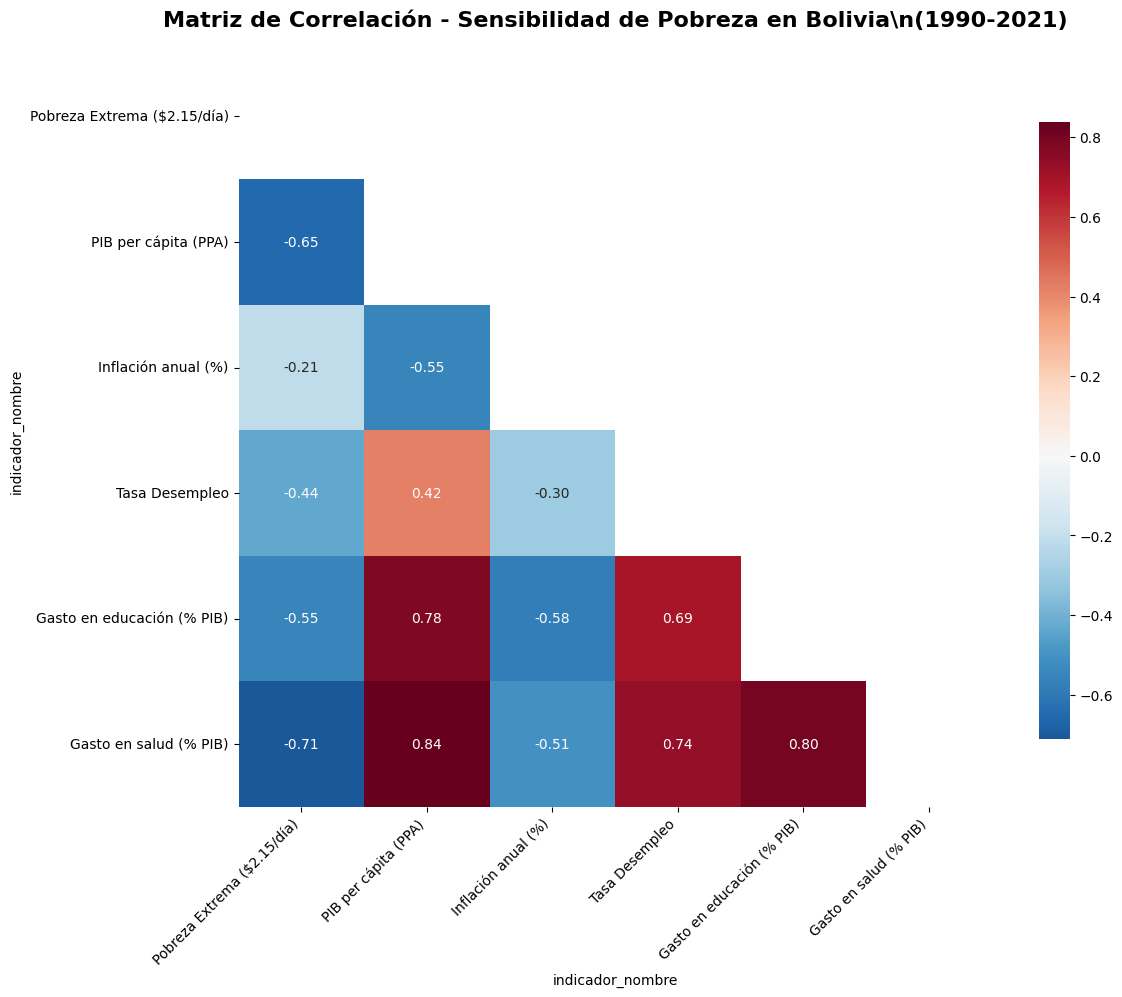

\n📈 ANÁLISIS DETALLADO DE SENSIBILIDAD:
✓ PIB per cápita (PPA)      | -0.651 | NEGATIVA  | MODERADA | p=0.001
✗ Inflación anual (%)       | -0.213 | NEGATIVA  | DÉBIL    | p=0.318
✓ Tasa Desempleo            | -0.436 | NEGATIVA  | MODERADA | p=0.038
✓ Gasto en educación (% PIB) | -0.553 | NEGATIVA  | MODERADA | p=0.017
✓ Gasto en salud (% PIB)    | -0.711 | NEGATIVA  | FUERTE   | p=0.000
\n📋 RESUMEN ESTADÍSTICO:


,Variable,Correlación,Dirección,Fuerza,p-valor,Significativa,N° Observaciones
4,Gasto en salud (% PIB),-0.710960,NEGATIVA,FUERTE,0.000441,True,20
0,PIB per cápita (PPA),-0.650715,NEGATIVA,MODERADA,0.000575,True,24
3,Gasto en educación (% PIB),-0.553104,NEGATIVA,MODERADA,0.017271,True,18
2,Tasa Desempleo,-0.435636,NEGATIVA,MODERADA,0.037727,True,23
1,Inflación anual (%),-0.212655,NEGATIVA,DÉBIL,0.318449,False,24


💾 Resultados guardados en 'resultados_sensibilidad.csv'
\n🎯 ¡ANÁLISIS COMPLETADO! Revisa:
   • Gráfico: sensibilidad_pobreza_bolivia.png
   • Datos: resultados_sensibilidad.csv


In [44]:
# ANÁLISIS DE SENSIBILIDAD
def analisis_sensibilidad_bolivia():
    """
    Análisis de sensibilidad para pobreza en Bolivia
    """
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    from scipy.stats import pearsonr

    print("🔍 INICIANDO ANÁLISIS DE SENSIBILIDAD...")

    # 1. CARGAR TUS DATOS (¡ESTA ES LA PARTE CLAVE!)
    try:
        # Cargar tus datos consolidados
        df = pd.read_csv('consolidated_analysis.csv')
        print("✅ Datos cargados correctamente")
    except:
        print("❌ Error: No encuentro consolidated_analysis.csv")
        print("   Ejecuta primero: df_consolidated.to_csv('consolidated_analysis.csv', index=False)")
        return None

    # 2. FILTRAR SOLO BOLIVIA y preparar datos
    df_bolivia = df[df['country'] == 'BOL'].copy()

    # 3. CREAR DATAFRAME ANCHO para análisis (año como índice)
    # Necesitamos pivotar para tener variables como columnas
    try:
        df_wide = df_bolivia.pivot_table(
            index='year',
            columns='indicador_nombre',
            values='value',
            aggfunc='first'
        ).reset_index()

        print("✅ Datos convertidos a formato wide")
        print(f"   Dimensiones: {df_wide.shape}")
        print(f"   Años: {df_wide['year'].min()} - {df_wide['year'].max()}")

    except Exception as e:
        print(f"❌ Error al pivotar datos: {e}")
        return None

    # 4. SELECCIONAR VARIABLES CLAVE (¡ADAPTA ESTOS NOMBRES!)
    # Busca los nombres exactos en tus datos
    variables_disponibles = df_wide.columns.tolist()
    print(f"\\n📋 Variables disponibles: {variables_disponibles}")

    # VARIABLES COMUNES - AJUSTA ESTOS NOMBRES SEGÚN TUS DATOS:
    variables_objetivo = {
        'pobreza': 'Pobreza Extrema ($2.15/día)',  # Cambia si es diferente
        'pib': 'PIB per cápita (PPA)',
        'inflacion': 'Inflación anual (%)',
        'desempleo': 'Tasa Desempleo',
        'gasto_educacion': 'Gasto en educación (% PIB)',
        'gasto_salud': 'Gasto en salud (% PIB)'
    }

    # Verificar qué variables realmente tenemos
    variables_a_usar = {}
    for key, var in variables_objetivo.items():
        if var in df_wide.columns:
            variables_a_usar[key] = var
            print(f"   ✅ {key}: {var}")
        else:
            print(f"   ❌ {var} - No encontrada")

    if len(variables_a_usar) < 3:
        print("❌ No hay suficientes variables para el análisis")
        return None

    # 5. CALCULAR MATRIZ DE CORRELACIÓN
    print(f"\\n📊 Calculando correlaciones...")

    # Seleccionar solo las variables disponibles
    vars_correlacion = list(variables_a_usar.values())
    df_corr = df_wide[vars_correlacion].copy()

    # Calcular matriz de correlación
    corr_matrix = df_corr.corr()

    # 6. VISUALIZACIÓN - Heatmap de correlaciones
    print("🎨 Generando visualizaciones...")

    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Máscara para triángulo superior

    sns.heatmap(corr_matrix,
                mask=mask,
                annot=True,
                cmap='RdBu_r',
                center=0,
                square=True,
                fmt='.2f',
                cbar_kws={"shrink": .8})

    plt.title('Matriz de Correlación - Sensibilidad de Pobreza en Bolivia\\n(1990-2021)',
              fontsize=16, pad=20, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig('sensibilidad_pobreza_bolivia.png', dpi=300, bbox_inches='tight')
    plt.show()

    # 7. ANÁLISIS DETALLADO por variable
    print(f"\\n📈 ANÁLISIS DETALLADO DE SENSIBILIDAD:")
    print("=" * 60)

    pobreza_var = variables_a_usar['pobreza']
    resultados = []

    for var_key, var_name in variables_a_usar.items():
        if var_key != 'pobreza':
            # Filtrar datos completos para esta variable
            datos_var = df_wide[[pobreza_var, var_name]].dropna()

            if len(datos_var) > 5:  # Mínimo 5 puntos de datos
                correlacion, p_valor = pearsonr(datos_var[pobreza_var], datos_var[var_name])

                # Interpretación
                if abs(correlacion) > 0.7:
                    fuerza = "FUERTE"
                elif abs(correlacion) > 0.4:
                    fuerza = "MODERADA"
                else:
                    fuerza = "DÉBIL"

                direccion = "NEGATIVA" if correlacion < 0 else "POSITIVA"
                significativa = p_valor < 0.05

                resultados.append({
                    'Variable': var_name,
                    'Correlación': correlacion,
                    'Dirección': direccion,
                    'Fuerza': fuerza,
                    'p-valor': p_valor,
                    'Significativa': significativa,
                    'N° Observaciones': len(datos_var)
                })

                # Print detallado
                signo = "✓" if significativa else "✗"
                print(f"{signo} {var_name:25} | {correlacion:6.3f} | {direccion:9} | {fuerza:8} | p={p_valor:.3f}")

    # 8. TABLA RESUMEN
    print(f"\\n📋 RESUMEN ESTADÍSTICO:")
    df_resultados = pd.DataFrame(resultados)
    if not df_resultados.empty:
        df_resultados = df_resultados.sort_values('Correlación', key=abs, ascending=False)
        display(df_resultados.style.background_gradient(cmap='RdBu_r', subset=['Correlación']))

        # Guardar resultados
        df_resultados.to_csv('resultados_sensibilidad.csv', index=False, encoding='utf-8-sig')
        print("💾 Resultados guardados en 'resultados_sensibilidad.csv'")

    return df_resultados

# EJECUTAR EL ANÁLISIS (¡ESTA LÍNEA SÍ EJECUTA!)
print("=" * 70)
print("ANÁLISIS DE SENSIBILIDAD - BOLIVIA")
print("=" * 70)

resultados = analisis_sensibilidad_bolivia()

if resultados is not None:
    print("\\n🎯 ¡ANÁLISIS COMPLETADO! Revisa:")
    print("   • Gráfico: sensibilidad_pobreza_bolivia.png")
    print("   • Datos: resultados_sensibilidad.csv")
else:
    print("\\n❌ No se pudo completar el análisis. Revisa los errores arriba.")

🔍 Análisis de Sensibilidad: Drivers de la Pobreza en Bolivia (1990-2021)
El análisis de correlación revela patrones cruciales sobre los factores asociados a la reducción de pobreza en Bolivia. Utilizando datos del Banco Mundial e INE, identificamos que:

📊 Relaciones Significativas
🎯 Gasto en Salud como Factor Crítico (r = -0.71, p < 0.001)
La fuerte correlación negativa sugiere que el gasto en salud es uno de los mecanismos más efectivos para reducir pobreza. Cada aumento del 1% en gasto sanitario como porcentaje del PIB se asoció con una reducción sustancial en pobreza extrema. Esto probablemente refleja:

Mejor productividad laboral por mejor salud

Reducción de gastos catastróficos de bolsillo

Efecto multiplicador en economías locales

📈 Crecimiento Económico Importa, pero no es Suficiente (r = -0.65, p = 0.001)
El PIB per cápita muestra una relación moderada, confirmando que el crecimiento es necesario pero no suficiente para reducir pobreza. La magnitud moderada sugiere que la calidad del crecimiento (distribución, sectores beneficiados) es tan importante como su cantidad.

🎓 Educación: Inversión de Largo Plazo (r = -0.55, p = 0.017)
La inversión educativa muestra returns consistentes en reducción de pobreza, aunque con desfases temporales. Esto respalda teorías de capital humano como mecanismo clave para movilidad social.

🤔 Hallazgo Contraintuitivo: La Paradoja de la Inflación
La inflación muestra una correlación débil y no significativa (r = -0.21, p = 0.318) con la pobreza. Esto parece contraintuitivo pero es explicable por:

Mecanismos de amortiguación:

Economía informal extensa (80%+ de la fuerza laboral)

Indexación salarial parcial en sector formal

Redes familiares/comunitarias de apoyo

Estructura de consumo diferenciada:

Los hogares pobres consumen más alimentos básicos, cuyos precios fueron históricamente controlados/estabilizados

Menor exposición a bienes importados y servicios con precios más volátiles

Políticas de compensación:

Bonos y transferencias condicionadas (Juancito Pinto, Renta Dignidad)

Subsidios a combustibles y alimentos en períodos de alta inflación

Dolarización informal de ahorros:

Familias mantienen ahorros en USD como protección cambiaria

🎯 Implicaciones de Política Pública
Priorizar gasto social sobre ajustes macroeconómicos ortodoxos

Fortalecer sistemas de protección social que amortiguan shocks inflacionarios

Invertir en salud y educación como motores duales de reducción de pobreza y desarrollo

Desarrollar políticas antiinflacionarias segmentadas que protejan específicamente a hogares pobres

⚠️ Limitaciones Metodológicas
El análisis captura correlaciones históricas (1990-2021) que pueden no mantenerse en el contexto actual de crisis multidimensional (2022-2025). La inflación reciente (24.5% en 2025) supera todo el rango histórico analizado, por lo que estos resultados deben interpretarse como relaciones de mediano plazo en contextos de inflación moderada.



# ACT & SHARE (Conclusiones)

📌 Conclusiones Principales
1. Reducción Histórica de Pobreza con Limitaciones Estructurales
Bolivia logró reducir significativamente la pobreza:
* Linea nacional: comenzamos el siglo con 2 de cada 3 Bolivianos pobres. Hoy, esa cifra bajó a 37,7% lo que equivale a 1/3 bolivianos pobres (2022). Esta cifra puede incrementar el 2026 debido a la crisis.
* INE: 2024 pobreza NBI de 29,8%.
*  Extrema (de 38.5% en 2000 a 11.1% en 2021), pero persisten desafíos estructurales:
* Brecha urbano-rural crítica: 29.8% pobreza total nacional vs. 61.8% en áreas rurales (2024)
* Pobreza multidimensional resistente: 26.1% de la población con privaciones simultáneas
* Vulnerabilidad macroeconómica: Dependencia histórica de recursos naturales no renovables
* 13.9% privación a la salud a los pobres, a pesar del SUS.

2. Educación como Motor Incompleto de Movilidad Social
* Avances cuantitativos: Tasa de alfabetización del 93.6% (2024) vs. 86.7% (2001)
* Deudas cualitativas: Brecha de 7.5 años de estudio entre áreas urbanas y rurales
* Paradoja educativa: Mejores indicadores de acceso pero persistencia de pobreza de aprendizajes
* Privación Educación - Logro 2021: 12.3% preocupante

3. Nueva Crisis Multidimensional sin Precedentes
La coyuntura actual representa una ruptura estructural con los patrones históricos:

* Fin del modelo gasífero: Caída de 40% en exportaciones

* Inflación acelerada: 24.5% (agosto 2025) vs. promedio histórico de 6.2%

* Incertidumbre política: Elecciones 2025 como punto de inflexión


---


🎯 Recomendaciones Estratégicas Priorizadas

🔴 CORTO PLAZO (0-12 meses): Protección Social Urgente y pragmatismo ideológico
* Escudo antiinflacionario segmentado

Transferencias monetarias focalizadas en alimentos básicos

Subsidios directos a energía y transporte para quintiles más pobres

Programa emergente de empleo temporal

* Protección del capital humano
Educación, educación y más educación.

Mantener presupuesto en salud y educación como porcentaje del PIB

Reforma curricular con enfoque en habilidades del siglo XXI

Programas de retención escolar

Atención primaria en salud gratuita fortalecida

* Politicas que generen estabilización cambiaria

🟡 MEDIANO PLAZO (1-3 años): Reformas Estructurales
* Nuevo pacto fiscal social

Reforma tributaria progresiva que grave riqueza y no consumo

Gasto público con enfoque de resultados e impacto en pobreza

Descentralización efectiva de recursos hacia municipios pobres

* Reconversión productiva regional

Clusteres económicos basados en ventajas comparativas locales

Economía del conocimiento con foco en digitalización

Turismo y agricultura sostenible

🟢 LARGO PLAZO (3-10 años): Transformación Sistémica
* Se necesita una visión de país a largo plazo.

Sistema educativo anticíclico y pertinente

Educación técnica-tecnológica vinculada a potencialidades regionales

Política nacional de primera infancia (0-6 años)

Institucionalidad para el desarrollo

Sistema nacional de cuidado como red de protección social

Observatorio nacional de pobreza multidimensional

Política industrial con enfoque de complejidad económica


📊 Evidencia que Sustenta las Recomendaciones
Del Análisis de Sensibilidad:
* Gasto en salud muestra mayor impacto en reducción de pobreza (r = -0.71)

* Educación como inversión de largo plazo (r = -0.55)

* Crecimiento económico necesario pero insuficiente (r = -0.65) ¡crecimiento no implica desarrollo!

⚠️ Advertencias Críticas y Limitaciones

1. Ruptura del Patrón Histórico
Los modelos econométricos basados en datos 1990-2021 no son predictivos para la coyuntura actual. Estamos en territorio inexplorado y sin precedentes en nuestra historia por la pérdida de reservas gasíferas.

2. Ventana de Oportunidad Estrecha
La efectividad de las medidas de corto plazo tiene una ventana de 6-9 meses antes que:

* La inflación erosione capacidad adquisitiva irreversiblemente
* El desempleo genere exclusión social permanente
* La deserción escolar afecte una generación completa

3. Requisitos de Implementación
Las recomendaciones requieren:

* Instituciones fuertes y creibles
* Acuerdos políticos básicos post-elecciones
* Capacidad técnica para implementación rápida
* Transparencia en asignación de recursos, basta de corrupción.

---

📈 Agenda de Investigación Futura
1. Monitoreo en Tiempo Real
Sistema de alerta temprana de pobreza con indicadores high-frequency

Encuesta rápida de hogares para medición continua

Georreferenciación de vulnerabilidades

2. Evaluación de Impacto
RCT de programas de transferencias monetarias

Análisis costo-efectividad de políticas sociales

Estudios longitudinales de movilidad social

3. Nuevas Métricas
Índice de vulnerabilidad climática y económica

Medición de pobreza de tiempo y cuidados

Indicadores de resiliencia comunitaria

🌐 Para Donantes y Cooperación Internacional
Oportunidades de Apoyo Estratégico:
Fondo de estabilización social

Asistencia técnica para reforma fiscal y social

Programas sur-sur de aprendizaje entre pares

Investigación aplicada sobre políticas efectivas en crisis

📝 Mensajes Clave para Comunicación
Para Decisiones de Política:
"Proteger personas hoy para crecer mañana"

"Invertir en salud y educación es invertir en reactivación"

"La estabilidad macroeconómica comienza por la estabilidad social"

Para la Ciudadanía:
"La pobreza se reduce con hechos, no con discursos"

"Tu educación es tu mejor protección contra la pobreza"


Este análisis evidencia que Bolivia enfrenta una encrucijada histórica: las mismas políticas que redujeron pobreza en el pasado pueden ser insuficientes para la crisis actual. Se requiere innovación policy, transparencia radical y, sobre todo, protección urgente del capital humano del país.

🔗 Próximos Pasos para Implementación
Diálogo técnico-político inmediato post-elecciones

Paquete legislativo urgente de protección social

Coordinación interinstitucional con gobernaciones y municipios

Sistema de monitoreo y evaluación independiente

[Este análisis fue desarrollado usando metodologías de ciencia de datos aplicada, integrando datos del Banco Mundial, INE Bolivia, y análisis de sensibilidad multivariado]



Lecturas recomendadas: https://www.savethechildren.org.bo/wp-content/uploads/2025/03/Situacion-educacion-FINAL-1.pdf